In [ ]:
# IMPORTS

import numpy as np
import matplotlib.pyplot as plt
import sys
import time
import numpy as np
import scipy.io
import matplotlib.pyplot as plt


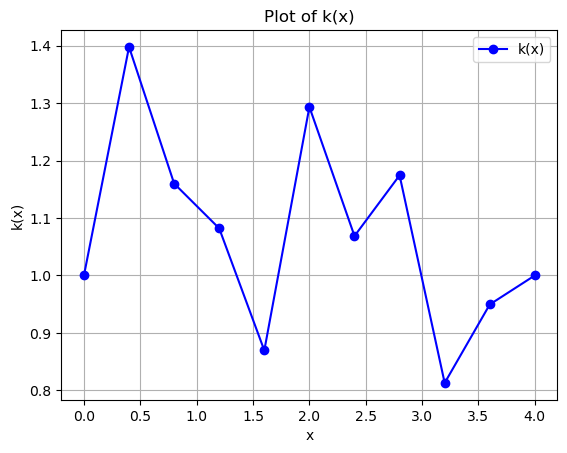

In [2]:
# Define x values (11 points from 0 to 4)
x = np.linspace(0, 4, 11)  

# Boundary values
k_0 = 1.0
k_10 = 1.0

# Generate 9 random values between 0.25 and 1.75 (excluding boundaries)
Mr = 9
mu = 1
sigma = 0.25
random_numbers = np.random.normal(loc=mu, scale=sigma, size=Mr)
# Combine boundary values with the generated ones
k_values = np.concatenate(([k_0], random_numbers, [k_10]))

# Plot the function k(x)
plt.plot(x, k_values, marker='o', linestyle='-', color='b', label="k(x)")

# Labels and title
plt.xlabel("x")
plt.ylabel("k(x)")
plt.title("Plot of k(x)")

# Show grid and legend
plt.grid()
plt.legend()
plt.show()


Task 1 project 3

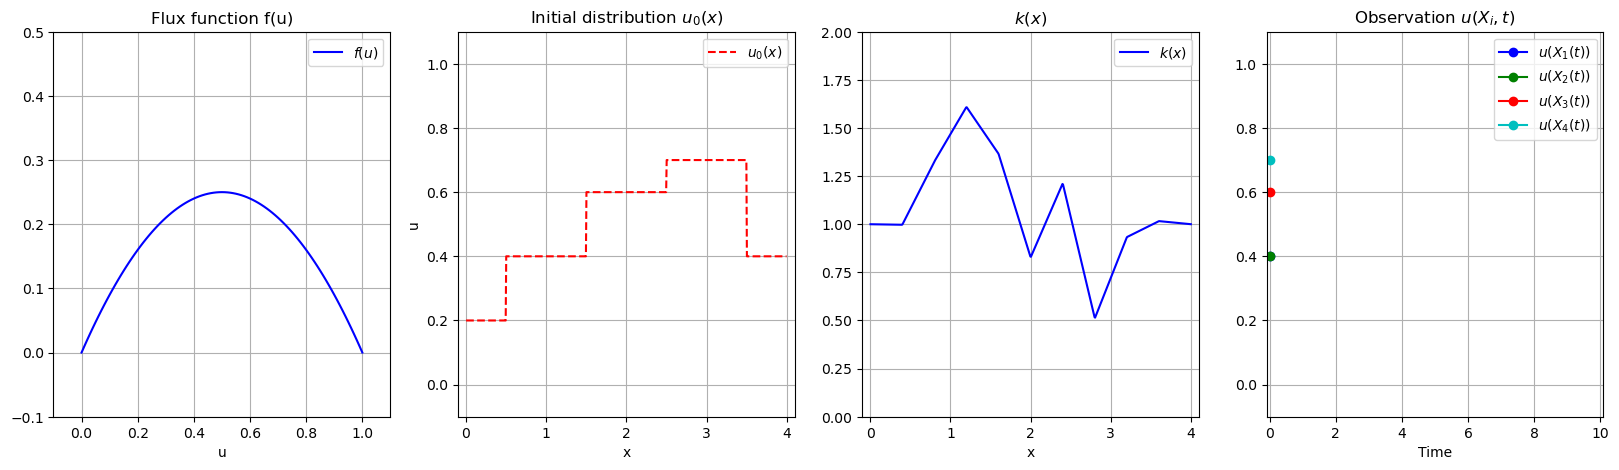

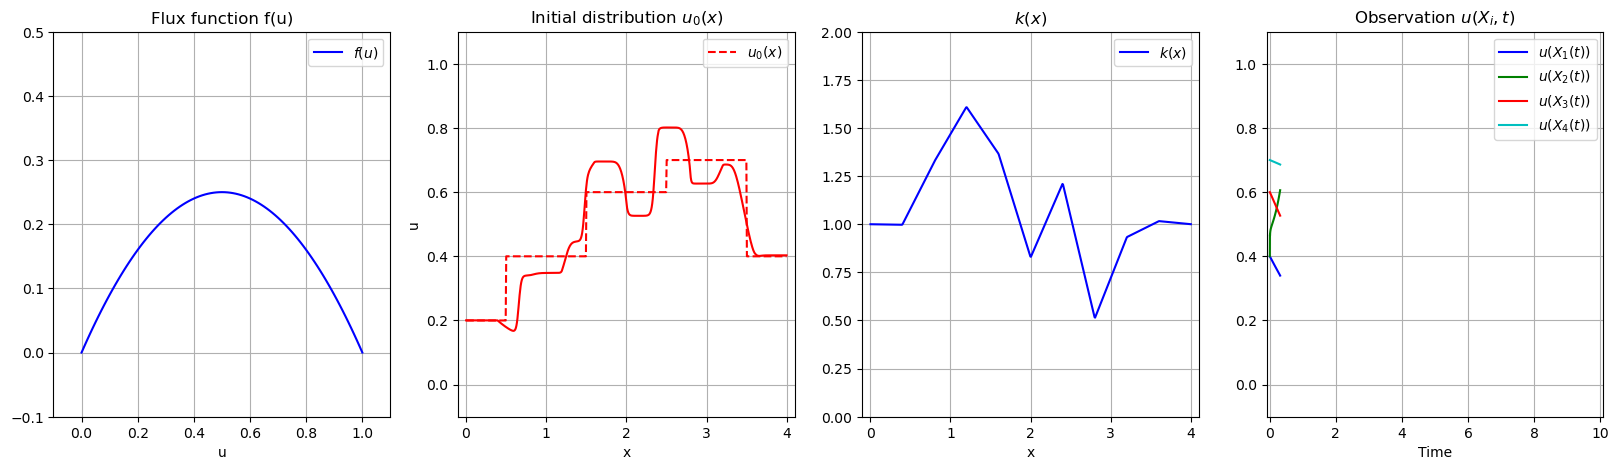

Timestep: 100, time = 0.3125


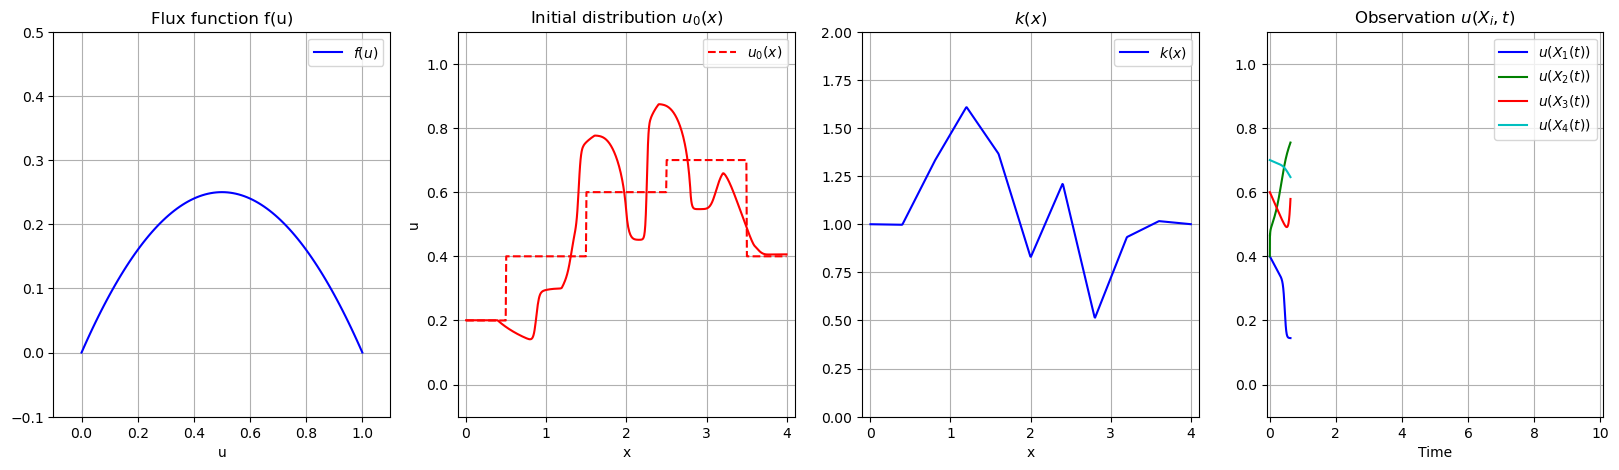

Timestep: 200, time = 0.625


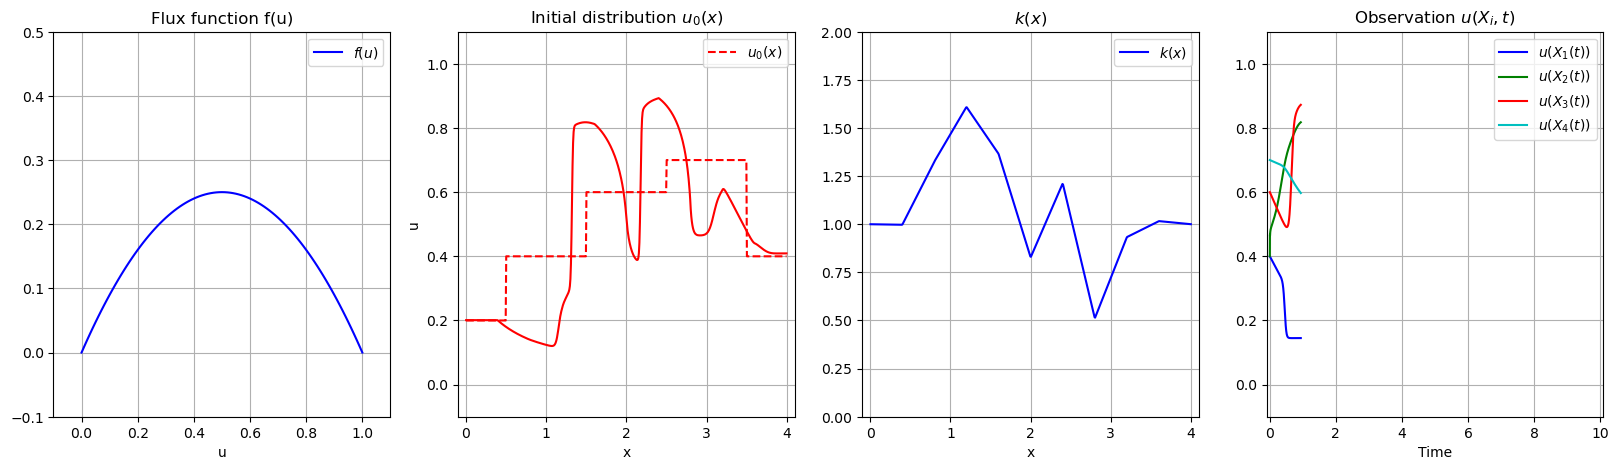

Timestep: 300, time = 0.9375


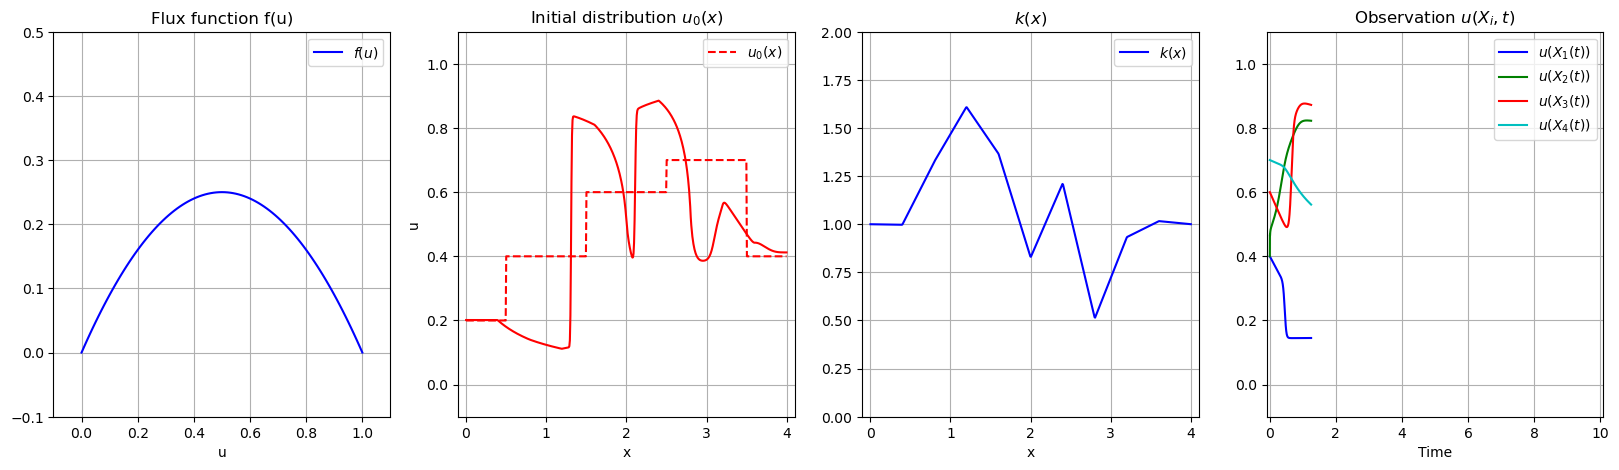

Timestep: 400, time = 1.25


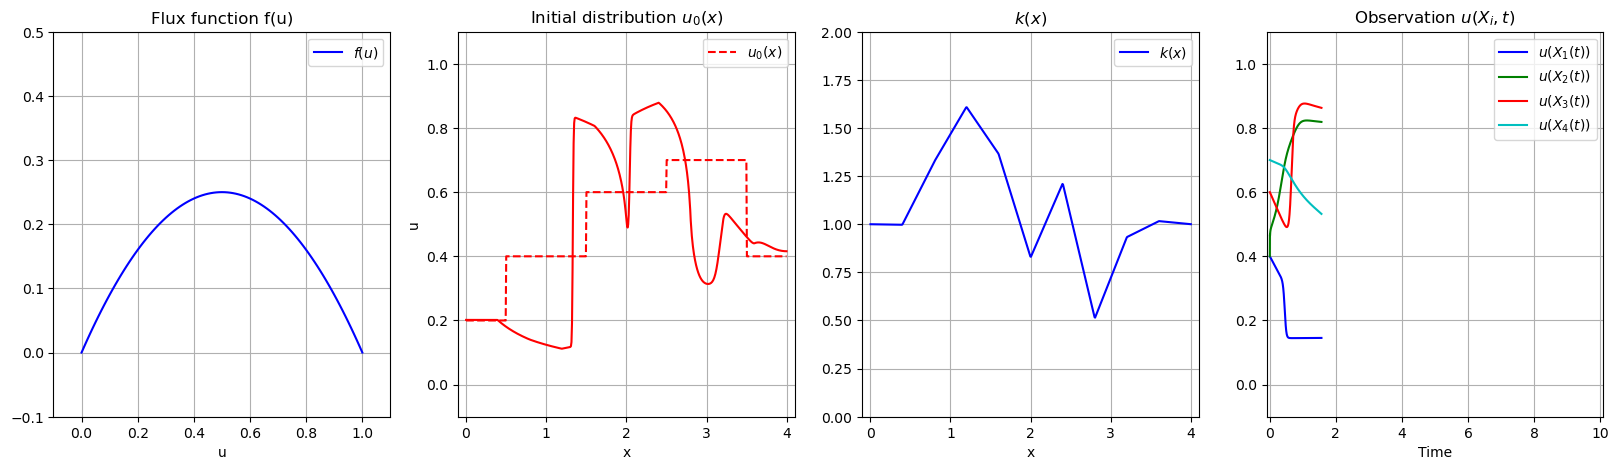

Timestep: 500, time = 1.5625


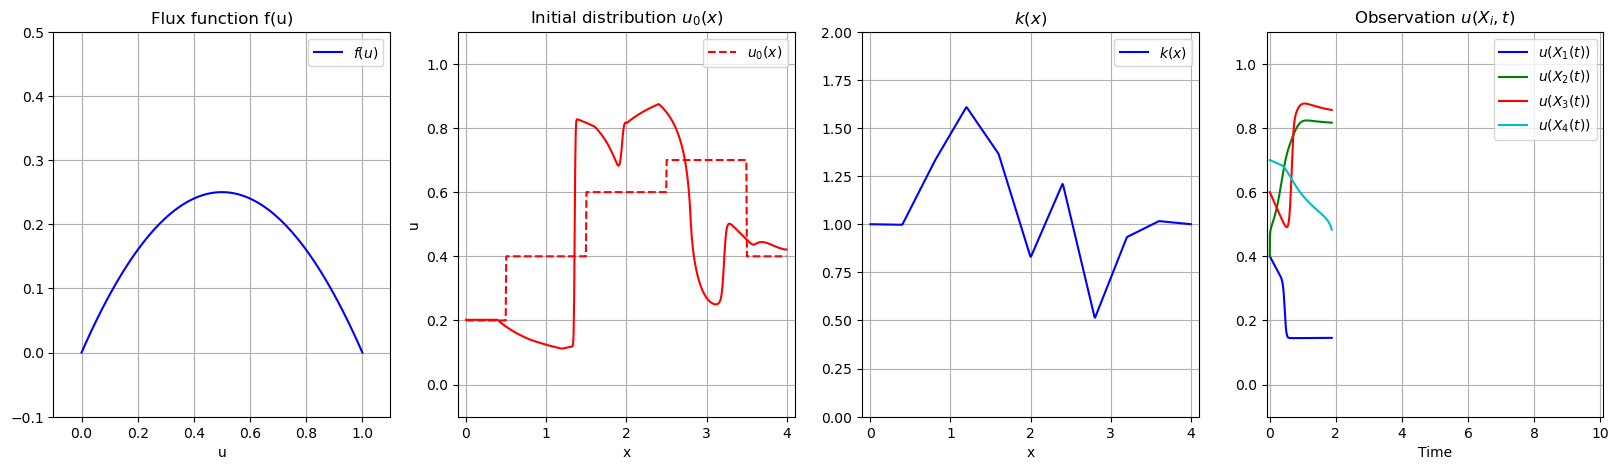

Timestep: 600, time = 1.875


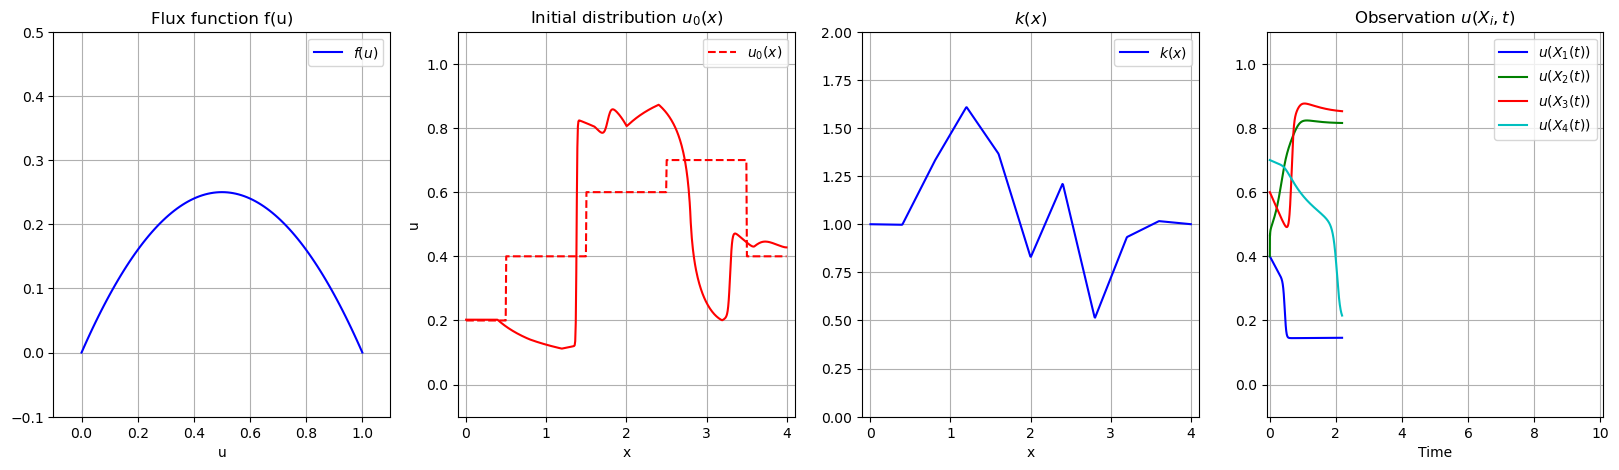

Timestep: 700, time = 2.1875


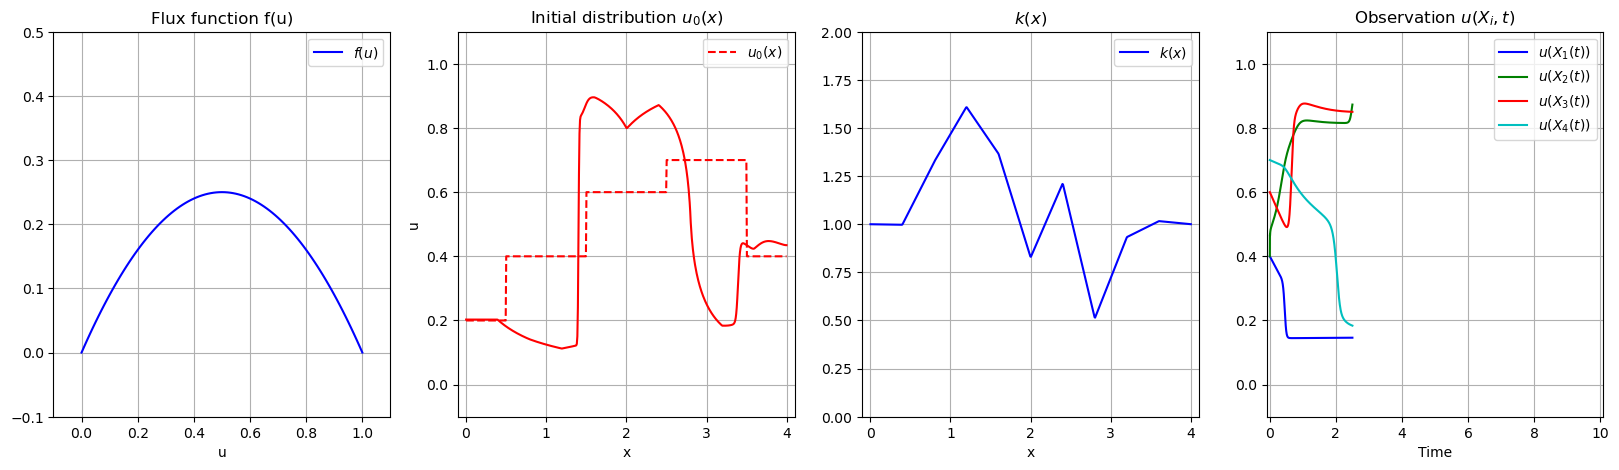

Timestep: 800, time = 2.5


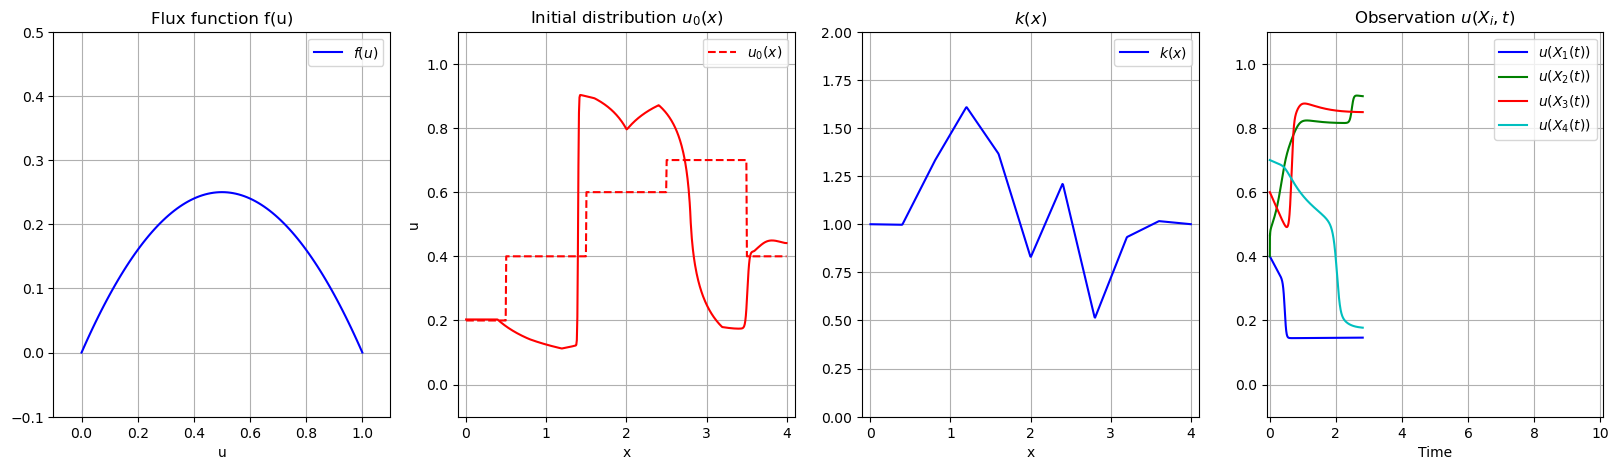

Timestep: 900, time = 2.8125


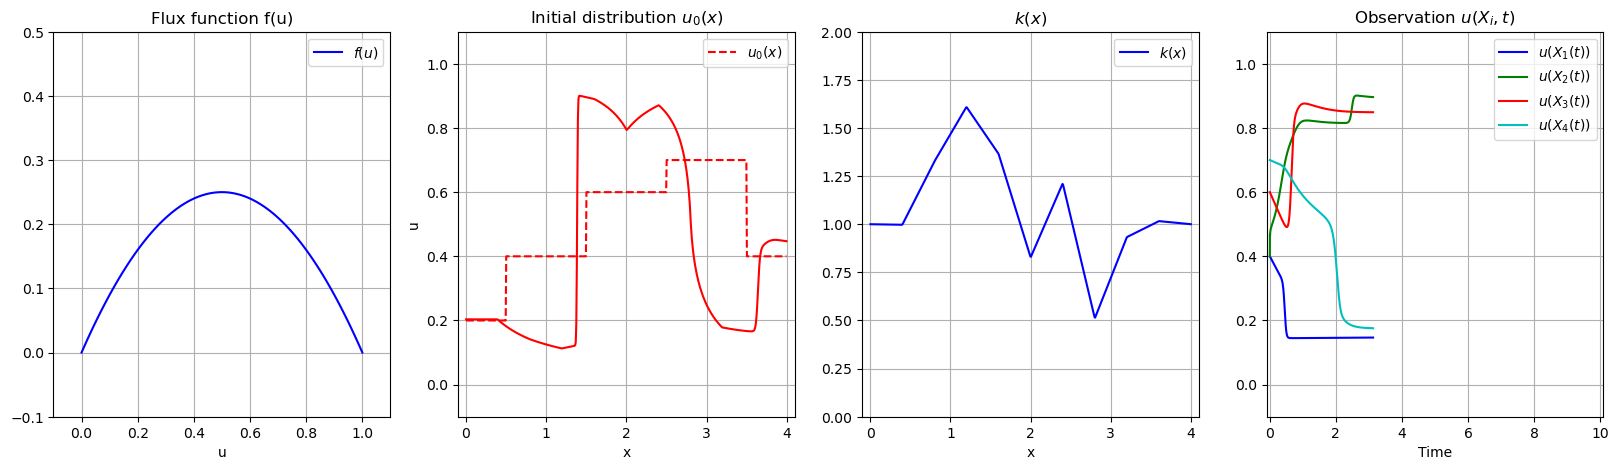

Timestep: 1000, time = 3.125


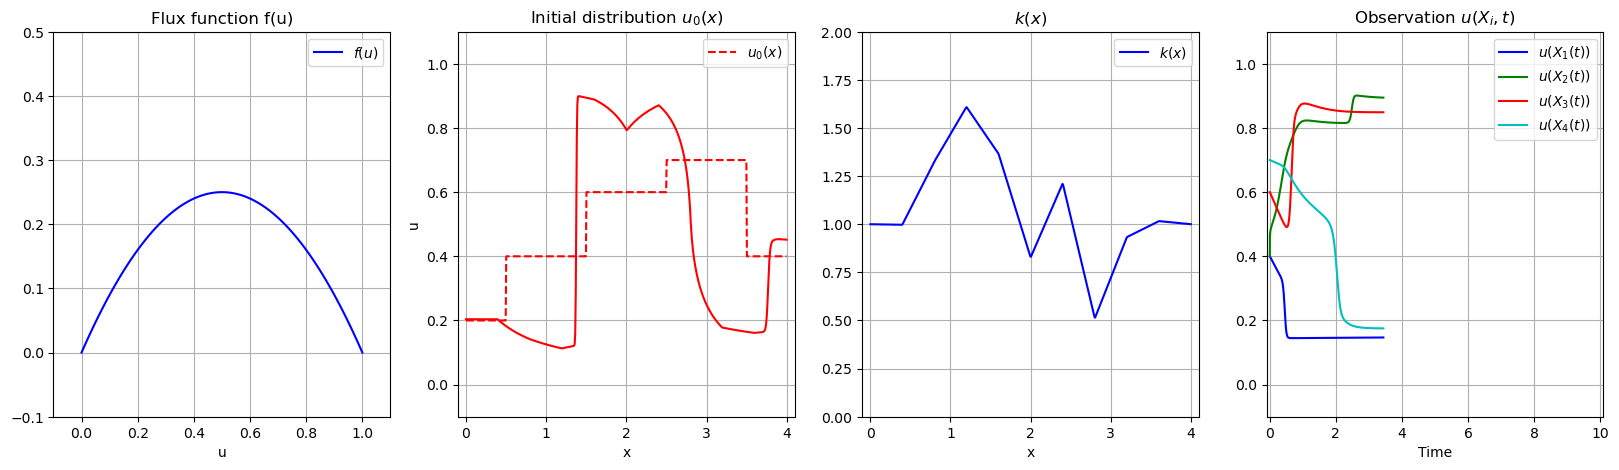

Timestep: 1100, time = 3.4375


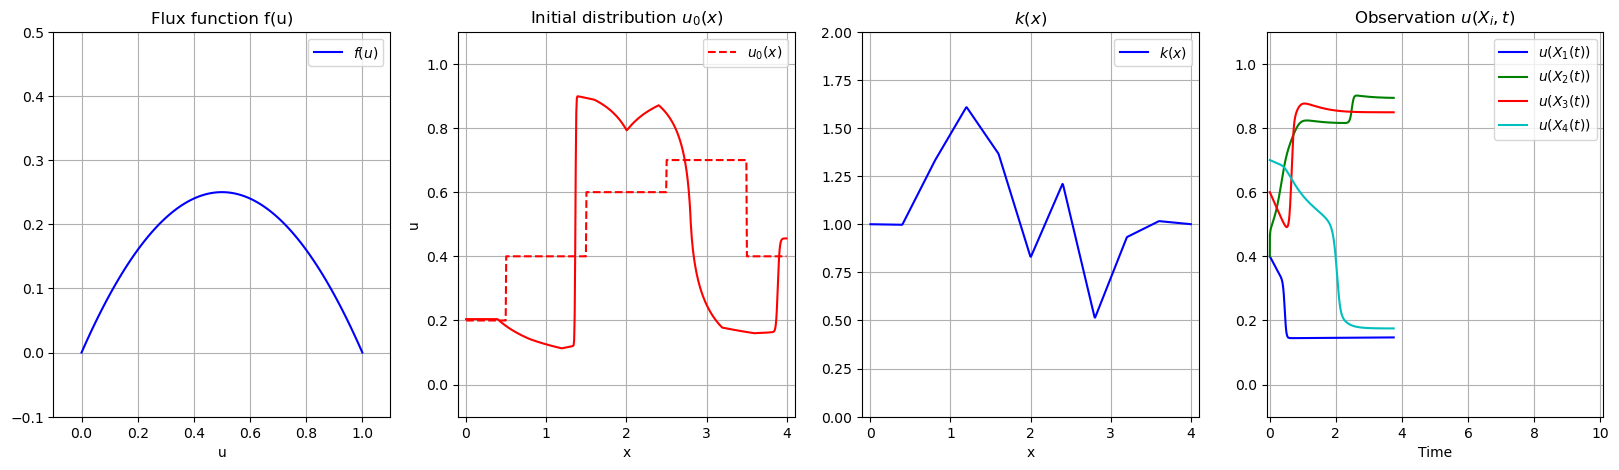

Timestep: 1200, time = 3.75


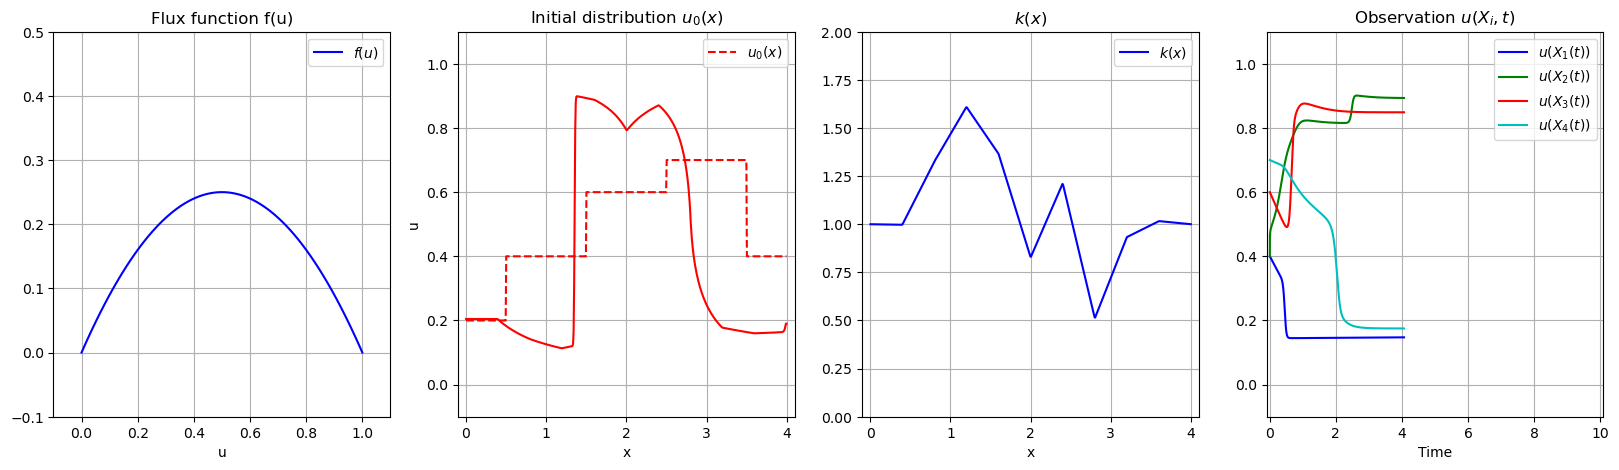

Timestep: 1300, time = 4.0625


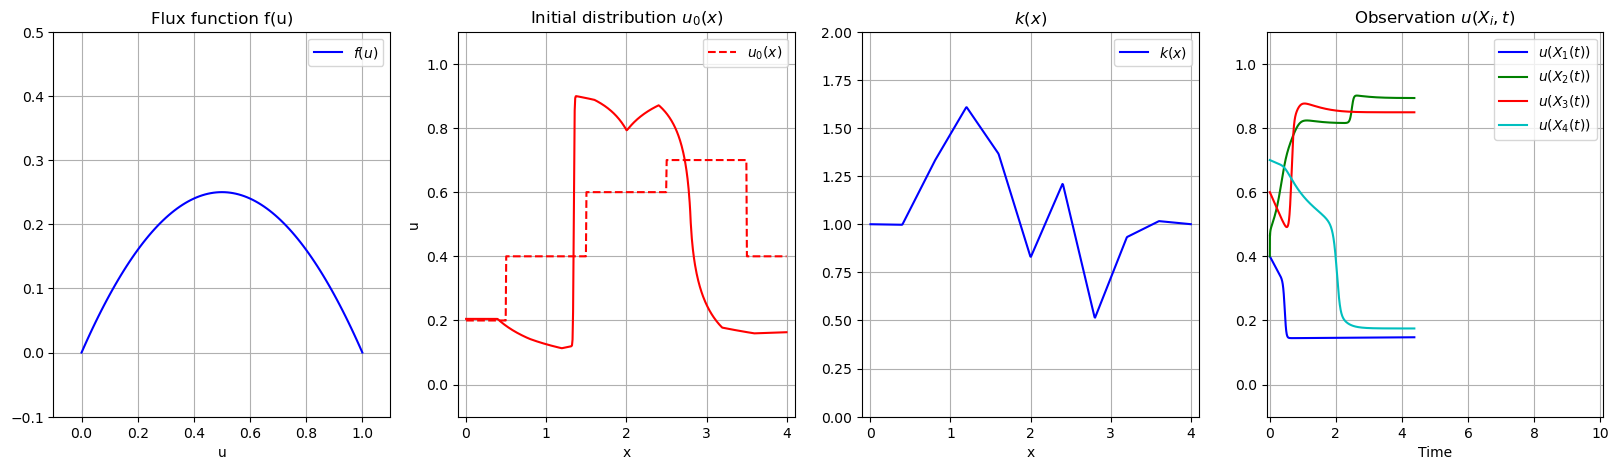

Timestep: 1400, time = 4.375


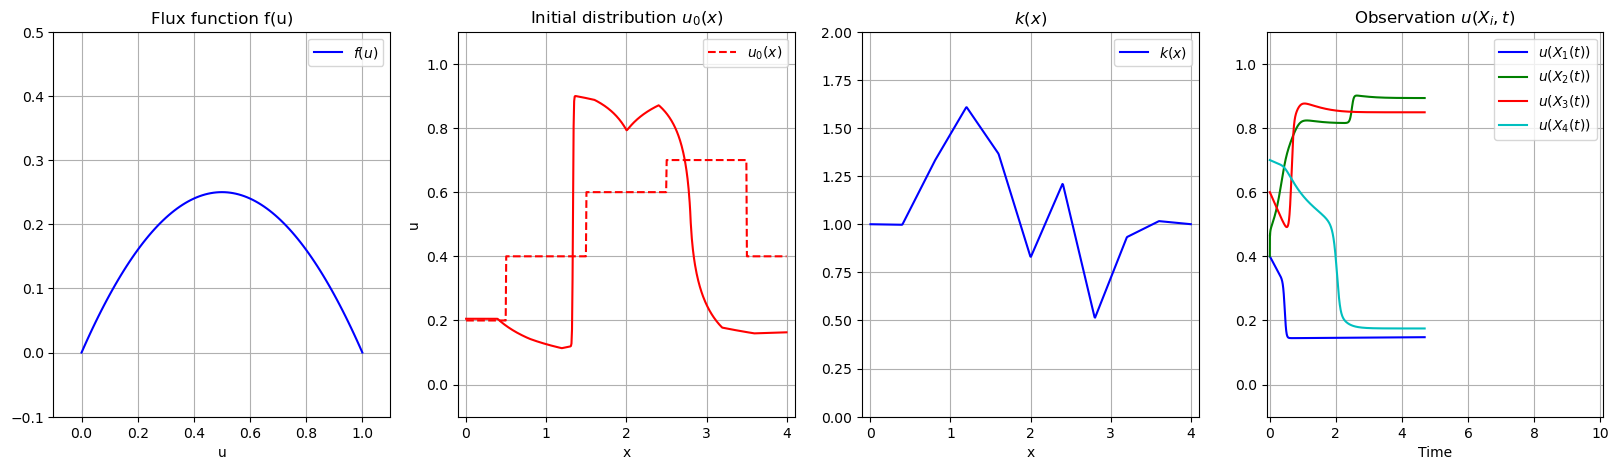

Timestep: 1500, time = 4.6875


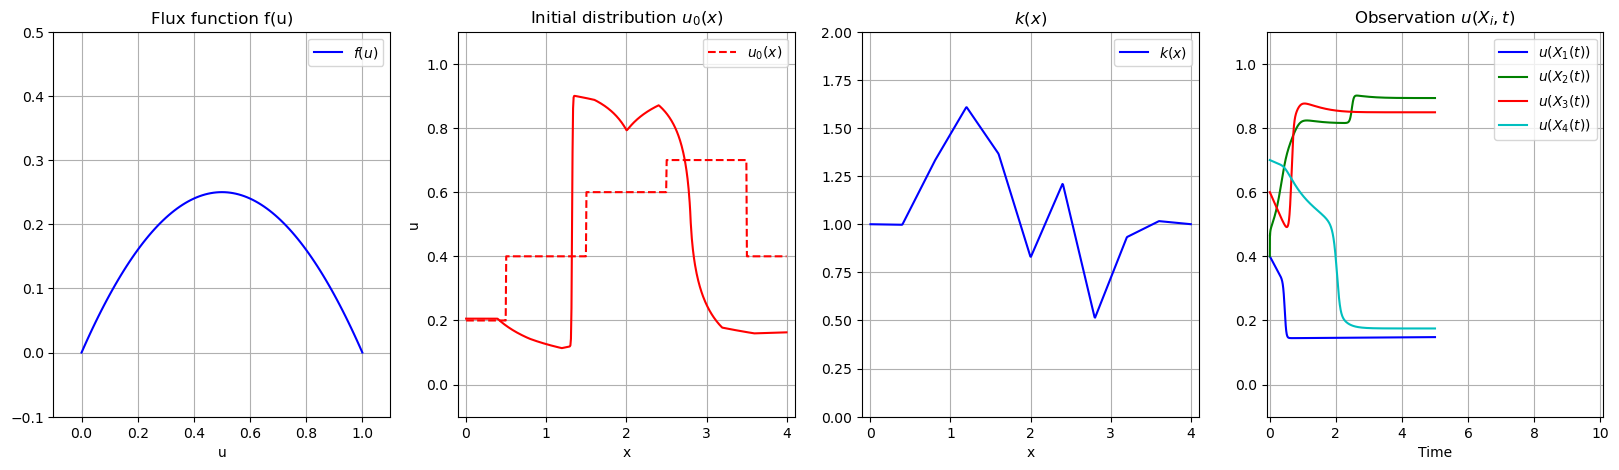

Timestep: 1600, time = 5.0


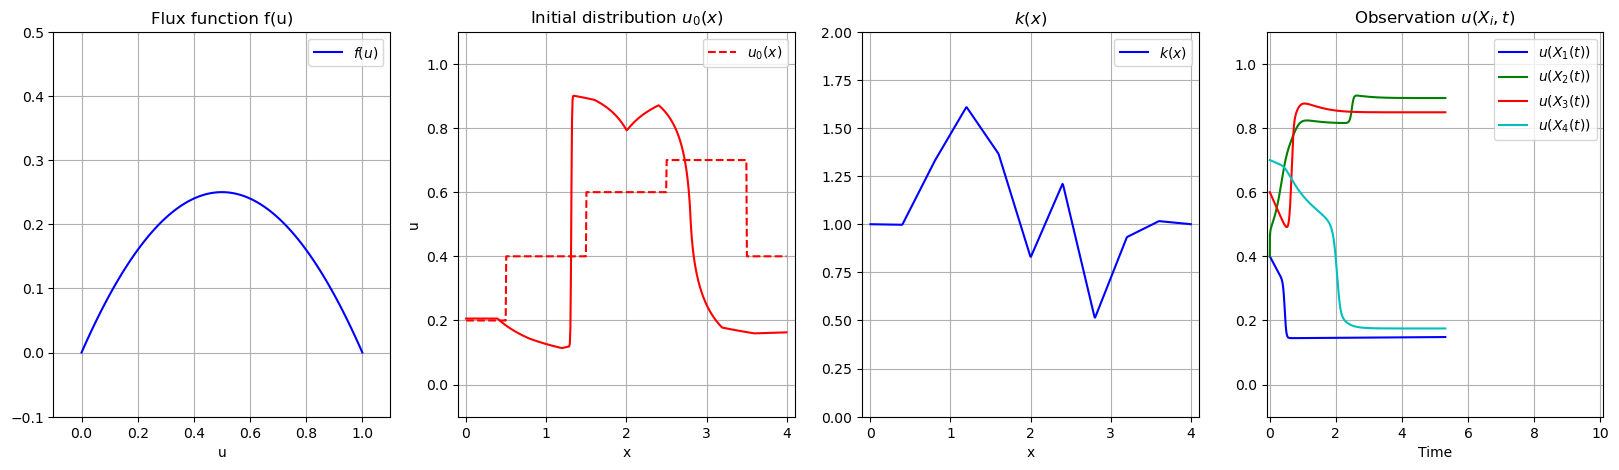

Timestep: 1700, time = 5.3125


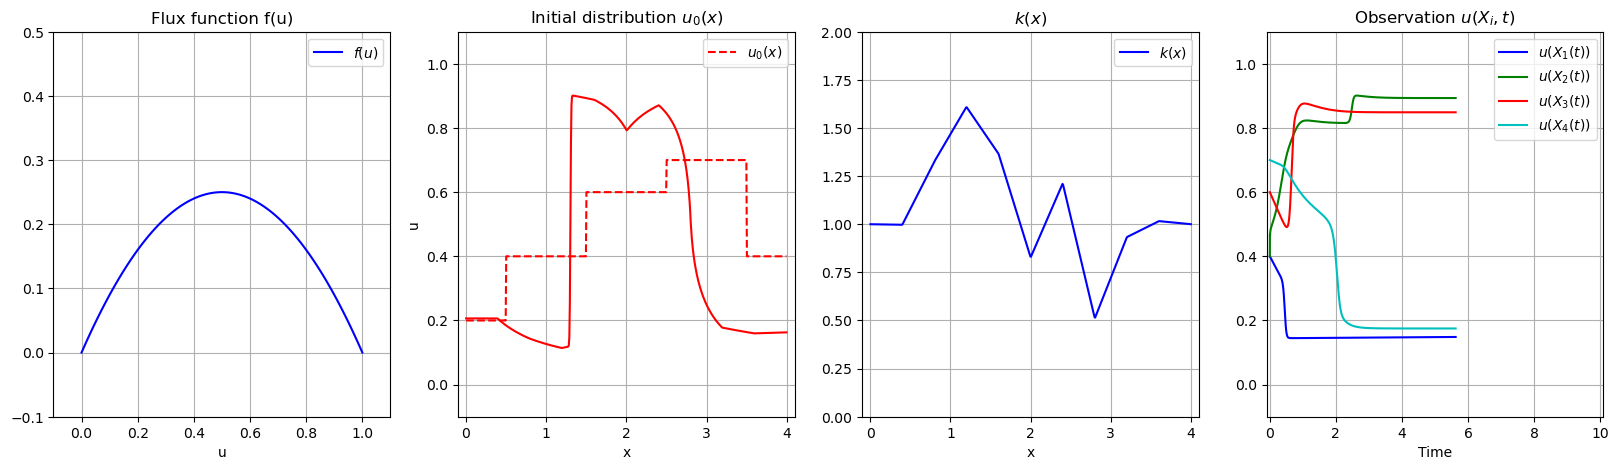

Timestep: 1800, time = 5.625


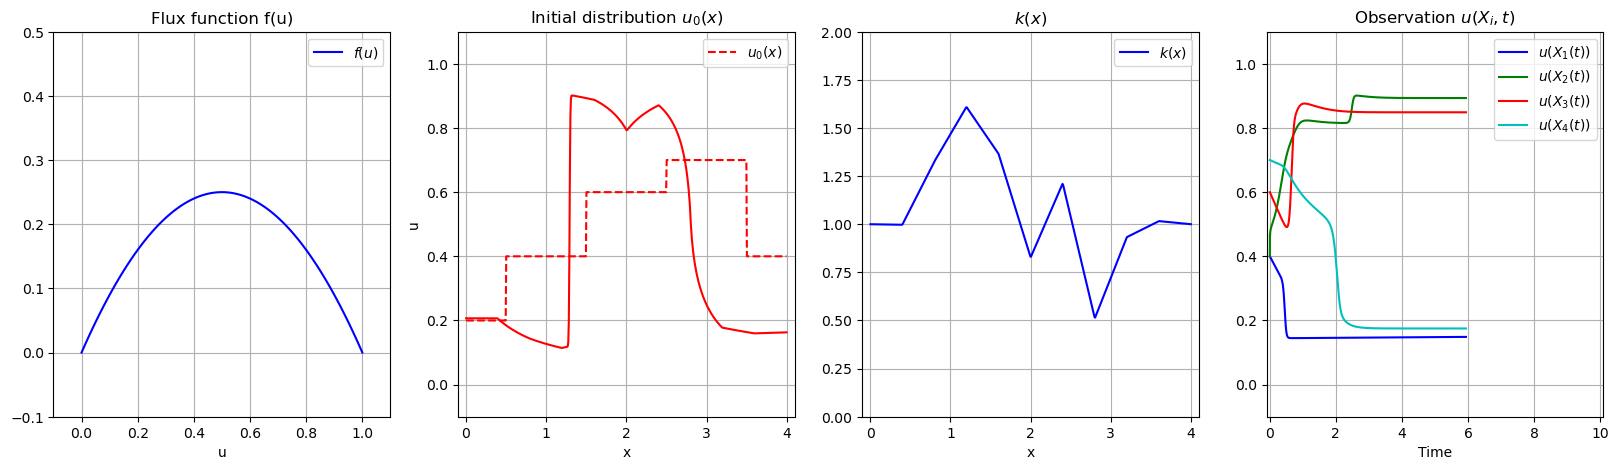

Timestep: 1900, time = 5.9375


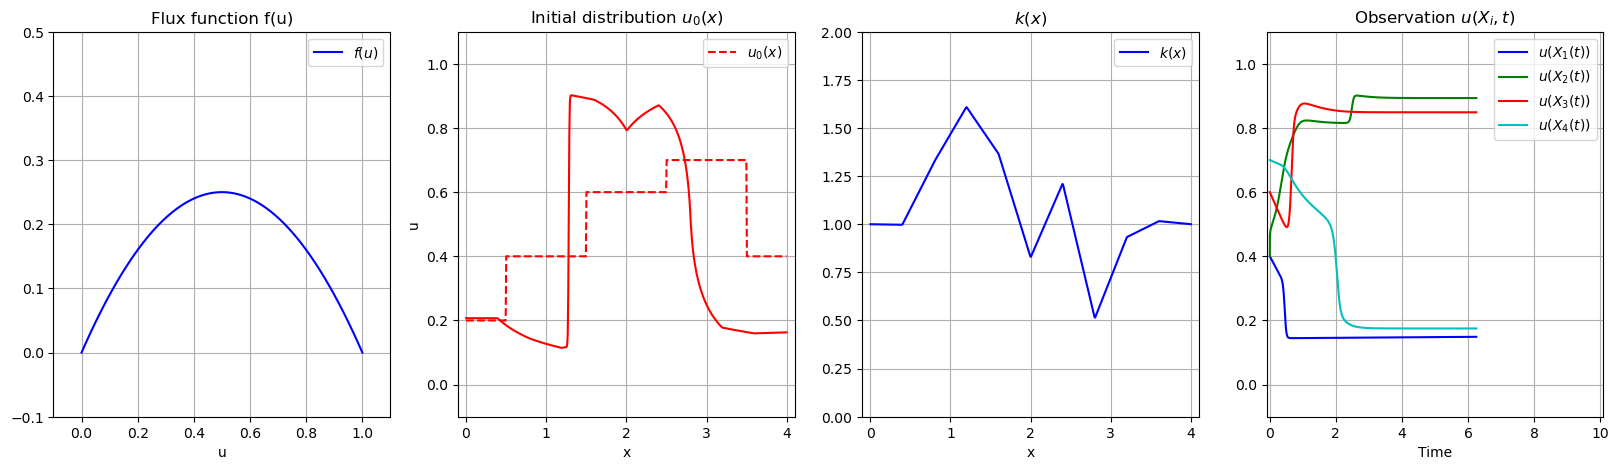

Timestep: 2000, time = 6.25


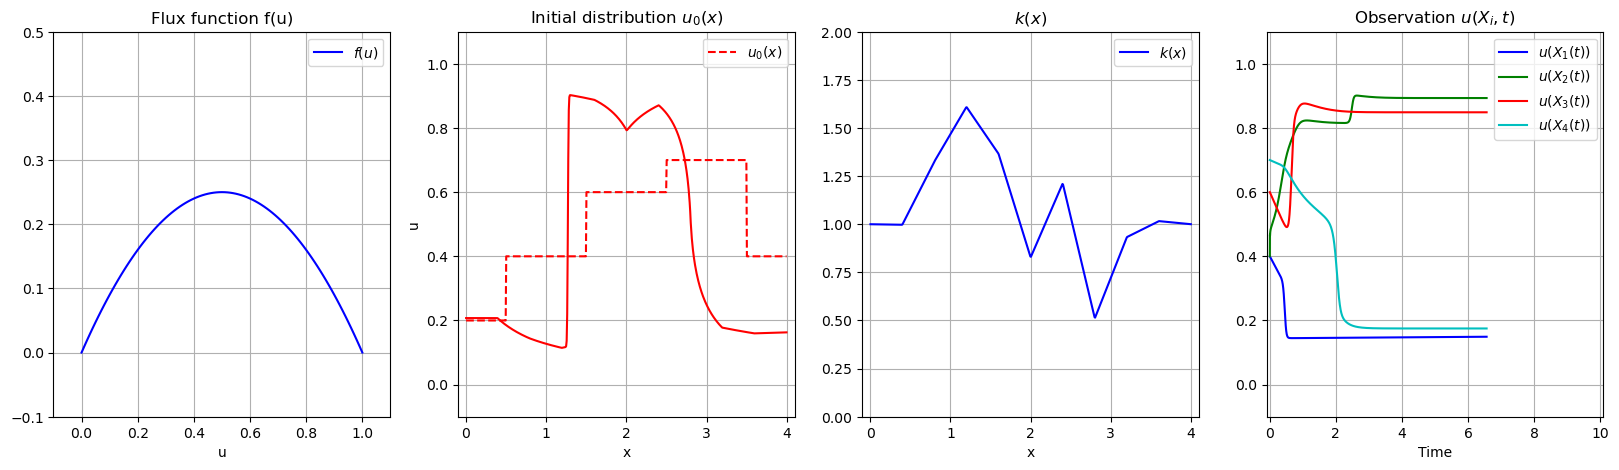

Timestep: 2100, time = 6.5625


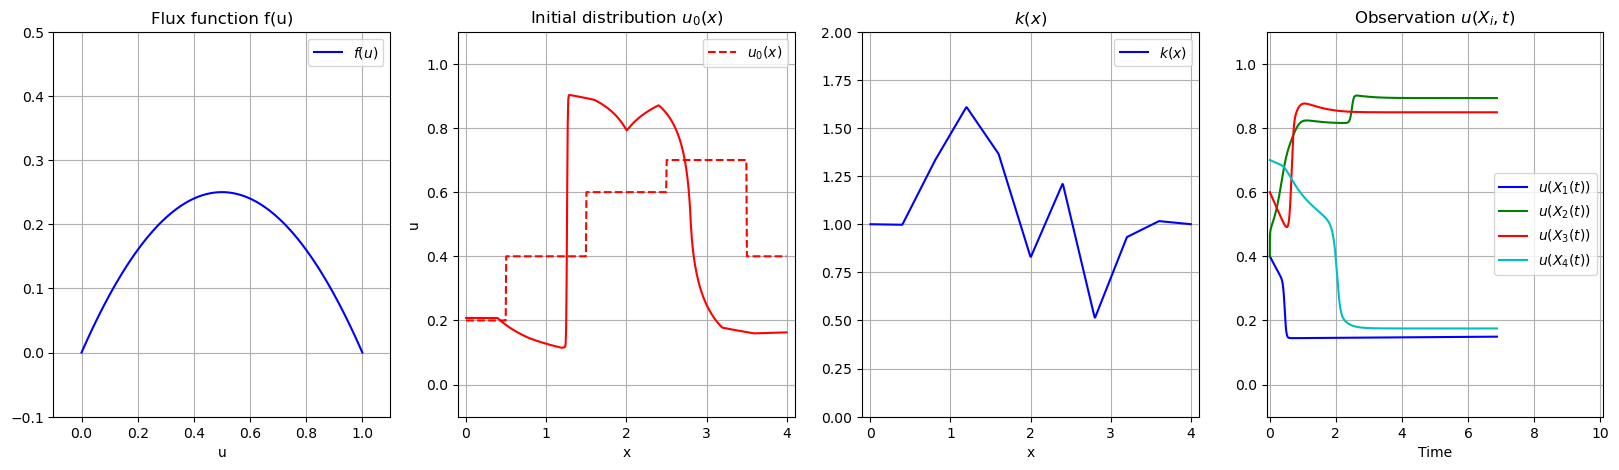

Timestep: 2200, time = 6.875


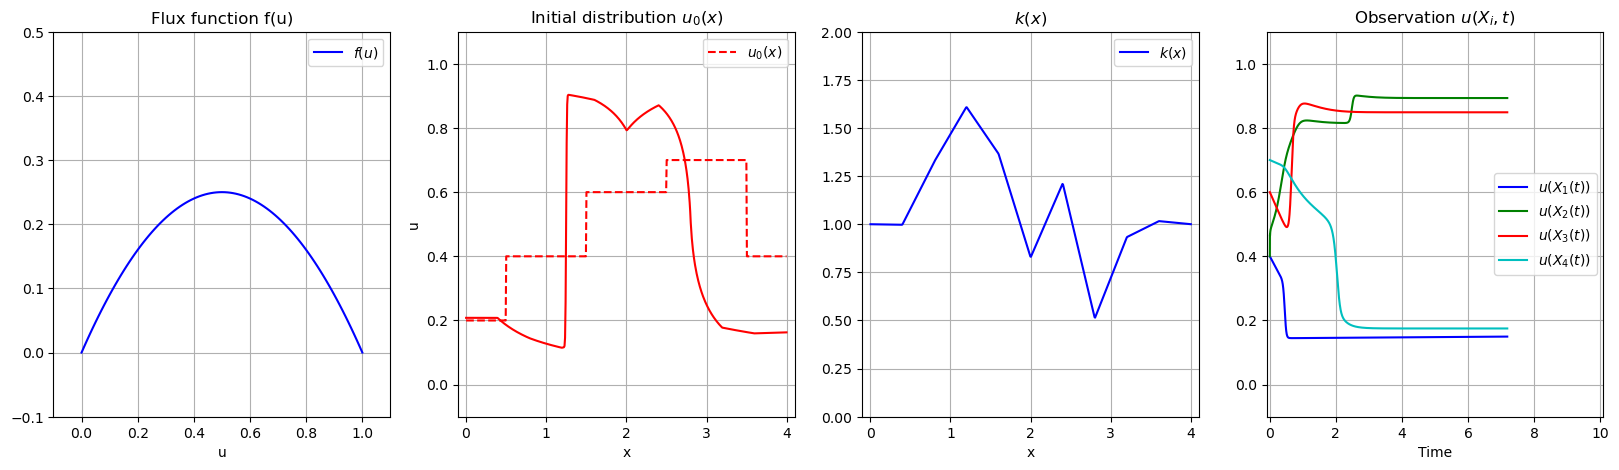

Timestep: 2300, time = 7.1875


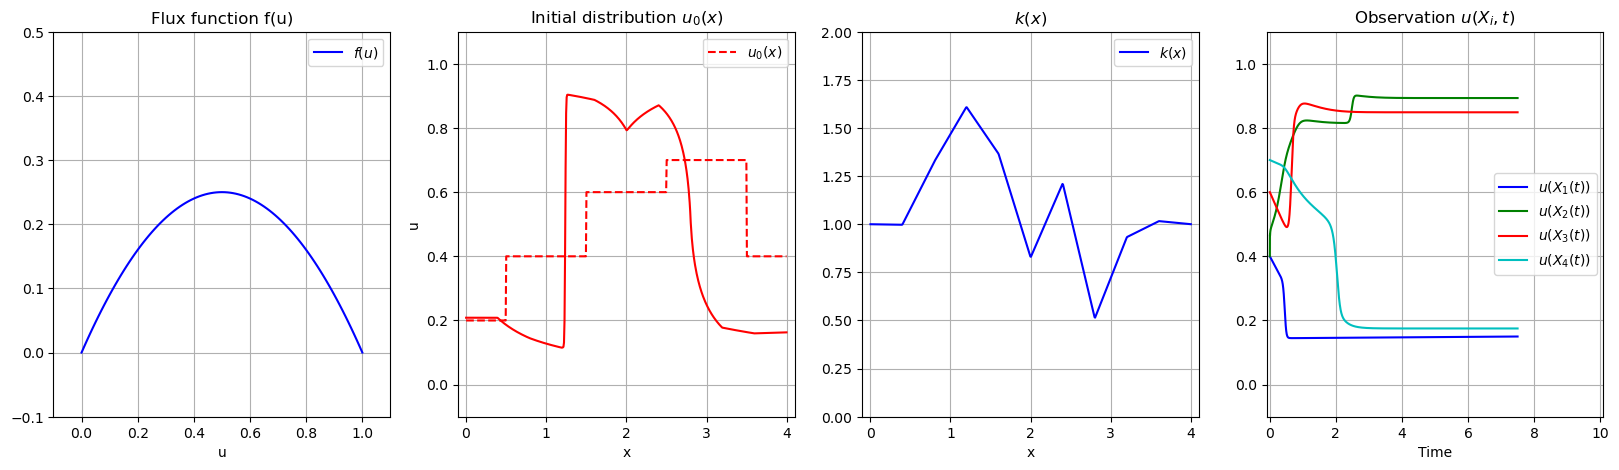

Timestep: 2400, time = 7.5


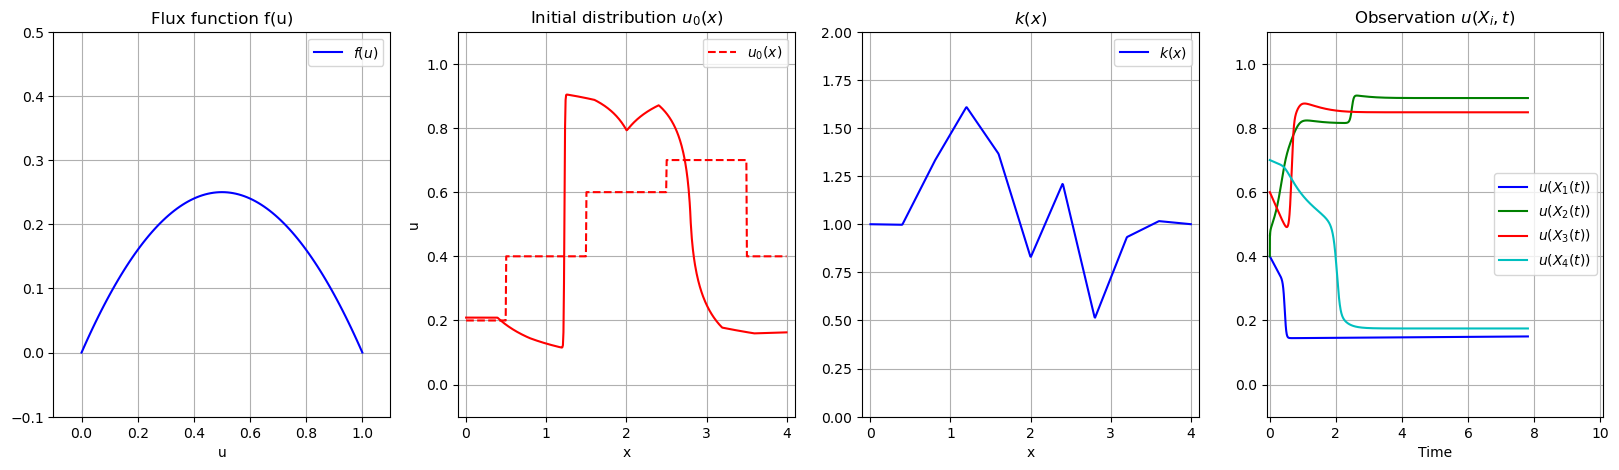

Timestep: 2500, time = 7.8125


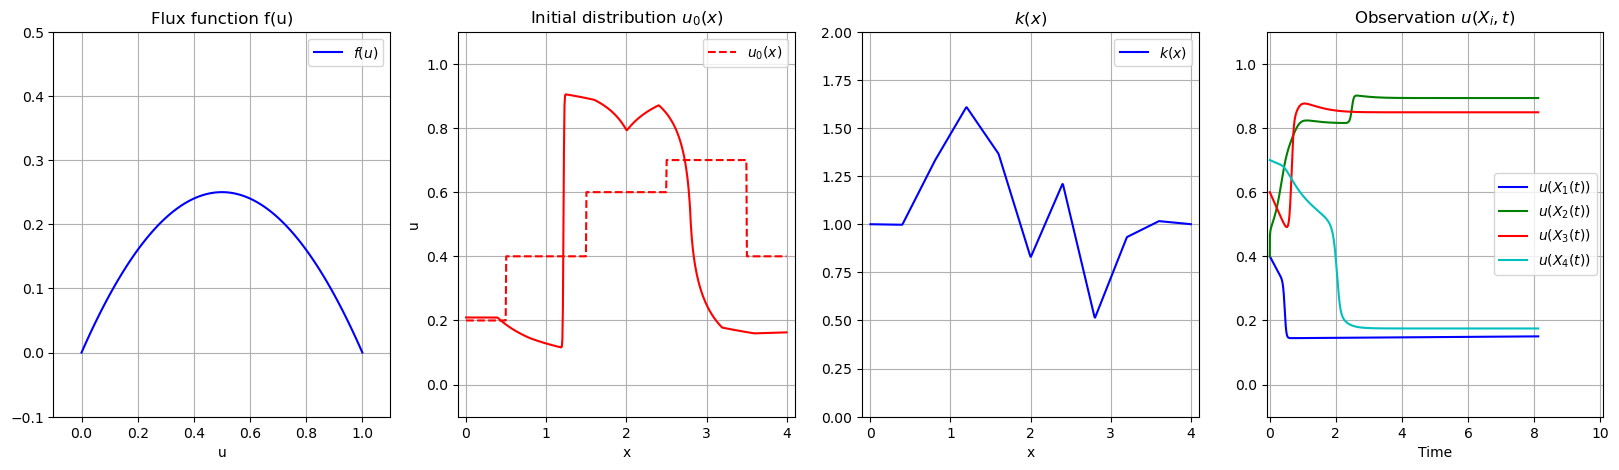

Timestep: 2600, time = 8.125


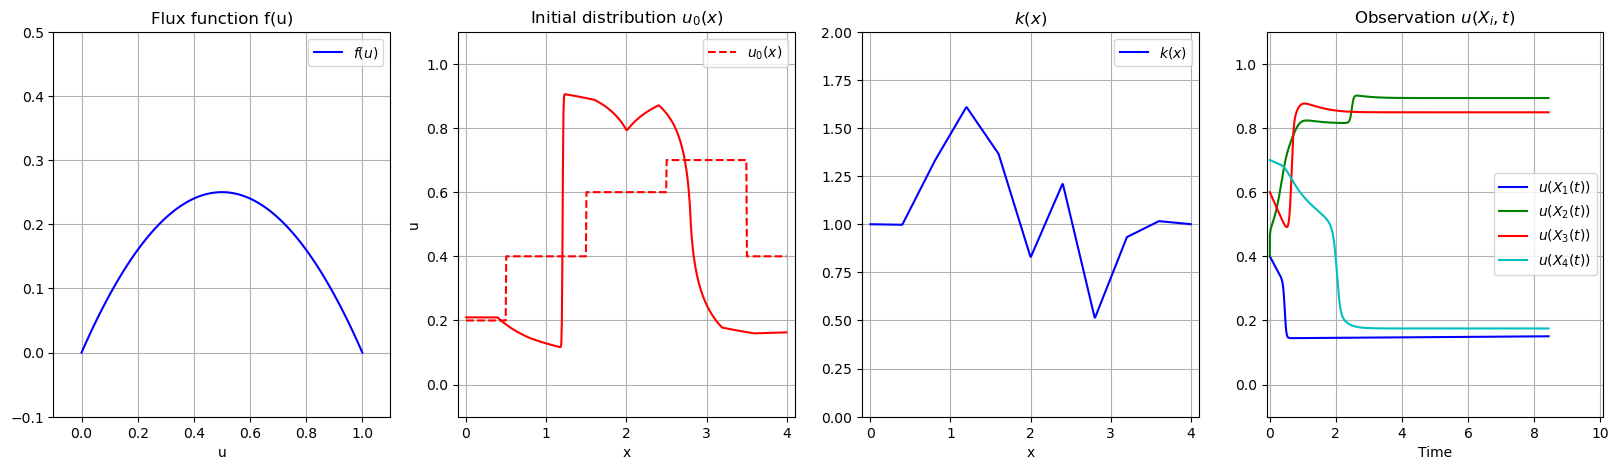

Timestep: 2700, time = 8.4375


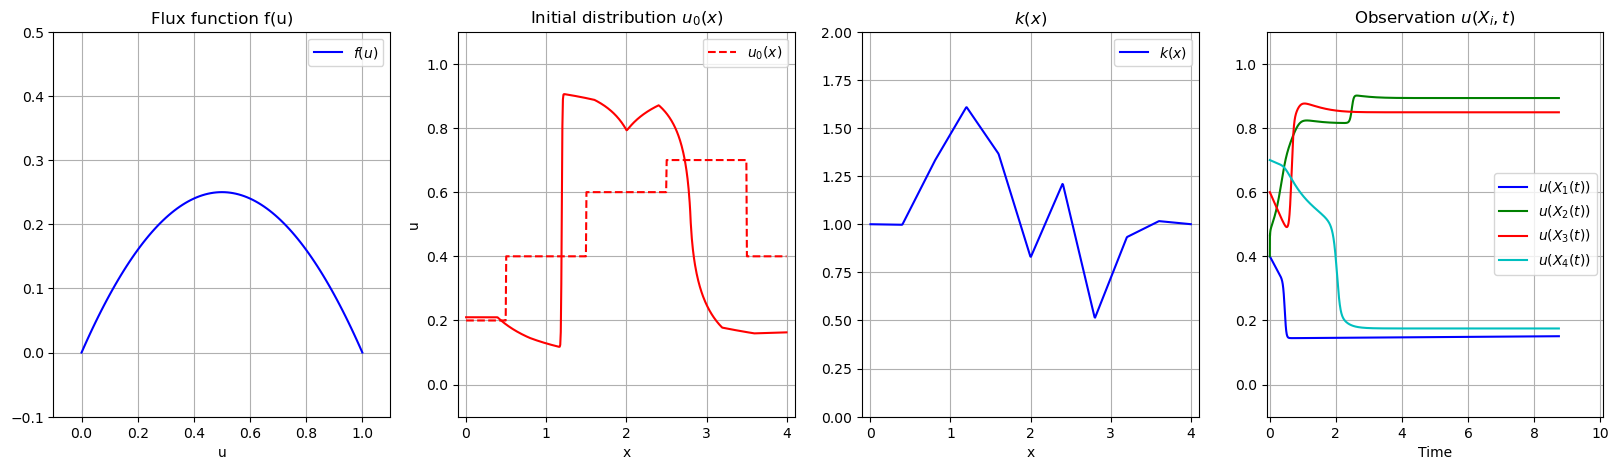

Timestep: 2800, time = 8.75


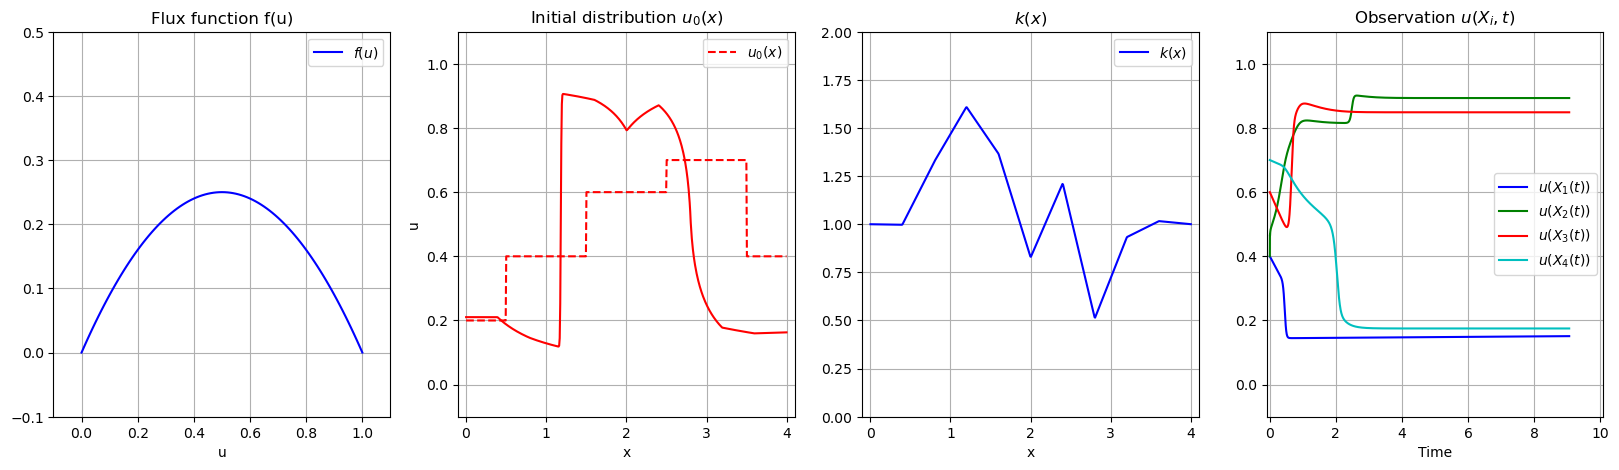

Timestep: 2900, time = 9.0625


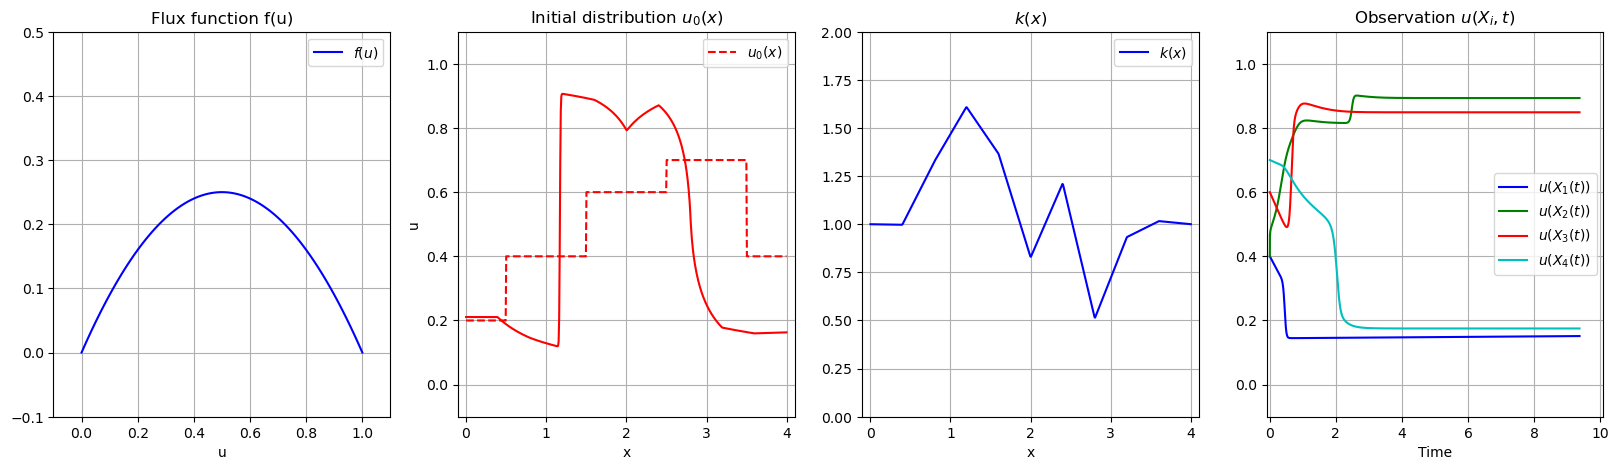

Timestep: 3000, time = 9.375


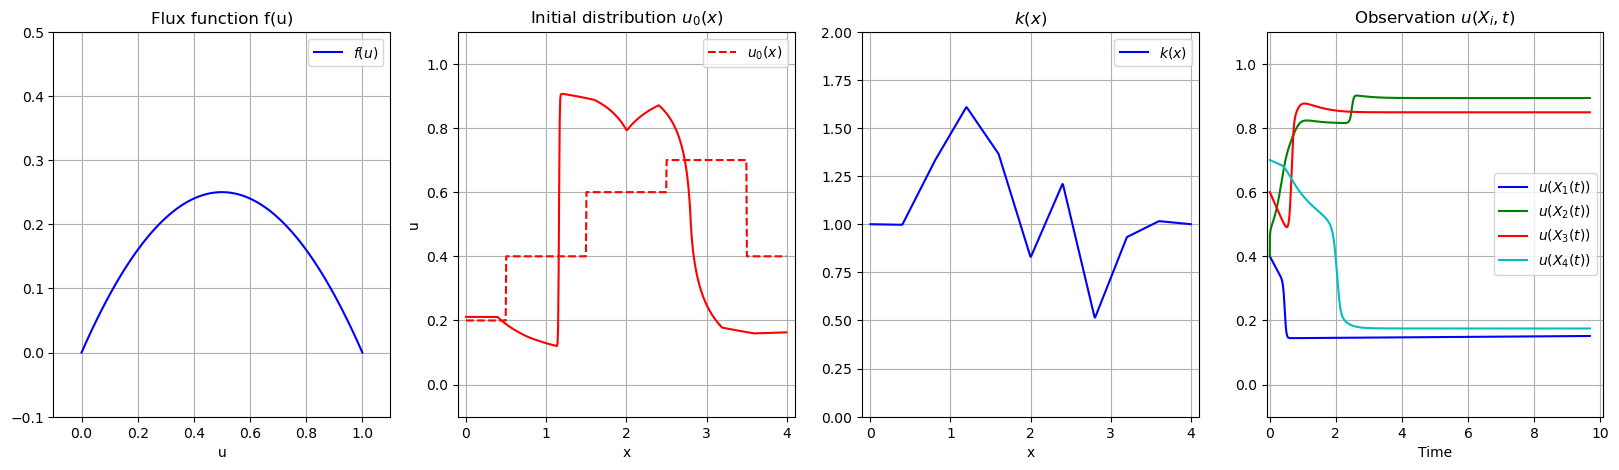

Timestep: 3100, time = 9.6875


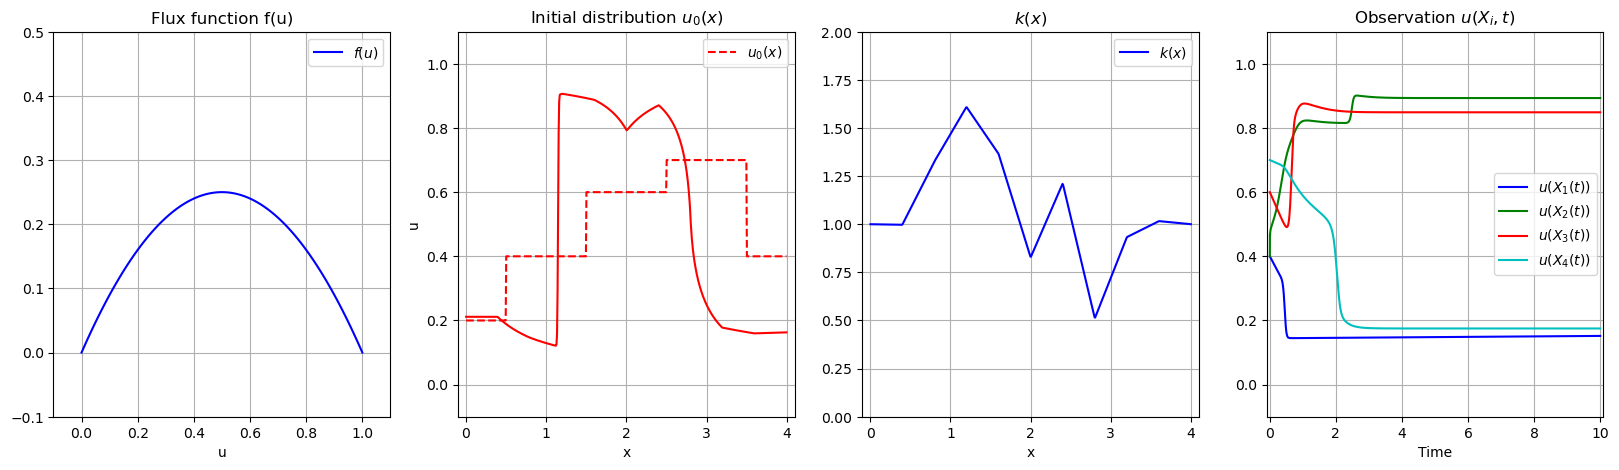

Timestep: 3200, time = 10.0
Computation of numerical solution finished


In [5]:
# Final time
T = 10

# Number of grid cells
M = 600

# Length of domain
aa = 0
bb = 4
Ldom = bb - aa

# Delta
dx = Ldom / M

# Define cell centers
x = np.arange(aa + 0.5 * dx, bb, dx)  # cell centers
xh = np.arange(aa, bb + dx, dx)         # interfaces

# Define number of time steps
NTime = 100 * 2 * 2 * 2 * 2 * 2  # e.g., 3200 time steps

# Time step dt
dt = T / NTime

# Provide positions of observation points X1, X2, X3, X4
X_position = [0.75, 1.5, 2.25, 3.25]

# Get the index corresponding to each observation point (assuming x is sorted)
s = [np.sum(x <= pos) - 1 for pos in X_position]

# Time discretization for the numerical scheme
t_step = np.linspace(0, T, NTime + 1)
u_X = [np.zeros(len(t_step)) for _ in range(4)]

# Time discretization associated with observation points (41 time instants)
t_obspoint = np.linspace(0, T, 41)
u_X_out = [np.zeros(len(t_obspoint)) for _ in range(4)]

# Terrain function
Mr = 9  # number of unknown interior k-values

# Discrete points x_k that define k(x)
x_k = np.array([0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0])

# Generate initial k(x) values: interior points are random normals, boundaries fixed to 1.
mu = 1
sigma = 0.25
k_val = np.random.normal(loc=mu, scale=sigma, size=Mr)
k_val[k_val < 0.25] = 0.25
k_val[k_val > 1.75] = 1.75

# Piecewise linear description of k(x) with fixed boundary values at x=0 and x=4.
y_k = np.concatenate(([1.0], k_val, [1.0]))

# Define the flux function f(u)
def fun_flux(u):
    return u * (1 - u)

v = np.arange(0, 1.0 + 0.01, 0.01)
flux_f = fun_flux(v)

# Define the initial data function
def fun_initial(x):
    u_init = np.zeros_like(x)
    u_init[x <= 0.5] = 0.2
    u_init[(x > 0.5) & (x <= 1.5)] = 0.4
    u_init[(x > 1.5) & (x <= 2.5)] = 0.6
    u_init[(x > 2.5) & (x <= 3.5)] = 0.7
    u_init[x > 3.5] = 0.4
    return u_init

u0 = fun_initial(x)

# Plot the initial setup in 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].plot(v, flux_f, '-b')
axs[0].set_title("Flux function f(u)")
axs[0].set_xlabel("u")
axs[0].axis([-0.1, 1.1, -0.1, 0.5])
axs[0].legend(['$f(u)$'])
axs[0].grid(True)

axs[1].plot(x, u0, '--r')
axs[1].set_title("Initial distribution $u_0(x)$")
axs[1].set_ylabel("u")
axs[1].set_xlabel("x")
axs[1].axis([aa - 0.1, bb + 0.1, -0.1, 1.1])
axs[1].legend(['$u_0(x)$'])
axs[1].grid(True)

axs[2].plot(x, np.interp(x, x_k, y_k), '-b')
axs[2].set_title("$k(x)$")
axs[2].set_xlabel("x")
axs[2].axis([aa - 0.1, bb + 0.1, 0, 2])
axs[2].legend(['$k(x)$'])
axs[2].grid(True)

# Initialize observation data at t=0
for ind in range(4):
    u_X[ind][0] = u0[s[ind]]

# For the observation plot, plot the initial observation points
axs[3].plot(t_step[:1], [u_X[0][0]], '-ob')
axs[3].plot(t_step[:1], [u_X[1][0]], '-og')
axs[3].plot(t_step[:1], [u_X[2][0]], '-or')
axs[3].plot(t_step[:1], [u_X[3][0]], '-oc')
axs[3].set_title("Observation $u(X_i,t)$")
axs[3].set_xlabel("Time")
axs[3].axis([-0.1, T + 0.1, -0.1, 1.1])
axs[3].legend(['$u(X_1(t))$', '$u(X_2(t))$', '$u(X_3(t))$', '$u(X_4(t))$'])
axs[3].grid(True)

plt.show()

# Define index arrays for the scheme
J = np.arange(0, M)
J1 = np.arange(1, M-1)
J2 = np.arange(0, M-1)

# Define vectors for the new and old time steps
u = np.zeros(M)
u_old = np.copy(u0)

# CFL parameter
lambda_1 = dt/dx

def check_CFLconstraint(value):
    if value > 1:
        print("CFL constraint not satisfied. Stopping the problem")
        sys.exit()

MaxfP = 1
CFL_number = lambda_1 * MaxfP * np.max(y_k)
check_CFLconstraint(CFL_number)

# Time-stepping loop
for j in range(NTime):
    t_step[j+1] = (j+1)*dt

    # Compute flux at cell centers
    Flux = fun_flux(u_old)
    
    # Compute flux at interfaces using a Rusanov-like average
    F_half = np.zeros(M-1)
    F_half[J2] = 0.5 * (Flux[J2] + Flux[J2+1]) - 0.5 * MaxfP * (u_old[J2+1] - u_old[J2])
    
    # Interpolate k(x) at interfaces
    k_half = np.zeros(M-1)
    k_half[J2] = np.interp(xh[J2 + 1], x_k, y_k)
    
    # Update interior cells using a finite difference scheme
    u[J1] = u_old[J1] - lambda_1 * (k_half[J1] * F_half[J1] - k_half[J1 - 1] * F_half[J1 - 1])
    
    # Apply boundary conditions
    u[0] = u[1]
    u[-1] = u[-2]
    
    # Record observations at the specified indices
    for ind in range(4):
        u_X[ind][j+1] = u[s[ind]]
    
    # Plot every 100 time steps
    if (j+1) % 100 == 0:
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        
        axs[0].plot(v, flux_f, '-b')
        axs[0].set_title("Flux function f(u)")
        axs[0].set_xlabel("u")
        axs[0].axis([-0.1, 1.1, -0.1, 0.5])
        axs[0].legend(['$f(u)$'])
        axs[0].grid(True)
        
        axs[1].plot(x, u0, '--r')
        axs[1].plot(x, u, '-r', label='$u(x,t)$')
        axs[1].set_title("Initial distribution $u_0(x)$")
        axs[1].set_ylabel("u")
        axs[1].set_xlabel("x")
        axs[1].axis([aa - 0.1, bb + 0.1, -0.1, 1.1])
        axs[1].legend(['$u_0(x)$'])
        axs[1].grid(True)
        
        axs[2].plot(x, np.interp(x, x_k, y_k), '-b')
        axs[2].set_title("$k(x)$")
        axs[2].set_xlabel("x")
        axs[2].axis([aa - 0.1, bb + 0.1, 0, 2])
        axs[2].legend(['$k(x)$'])
        axs[2].grid(True)
        
        # Plot observation curves up to the current time step
        for ind, color in zip(range(4), ['b', 'g', 'r', 'c']):
            axs[3].plot(t_step[:j+2], u_X[ind][:j+2], f'-{color}', label=f'$u(X_{ind+1}(t))$')
        axs[3].set_title("Observation $u(X_i,t)$")
        axs[3].set_xlabel("Time")
        axs[3].axis([-0.1, T + 0.1, -0.1, 1.1])
        axs[3].legend()
        axs[3].grid(True)
        
        plt.show()
        print(f"Timestep: {j+1}, time = {t_step[j+1]}")
    
    u_old = np.copy(u)

print("Computation of numerical solution finished")

# Interpolate observation data onto a coarser time grid for output
for ind in range(4):
    u_X_out[ind][:] = np.interp(t_obspoint, t_step, u_X[ind])


Task 1  
c  

Different k(x)

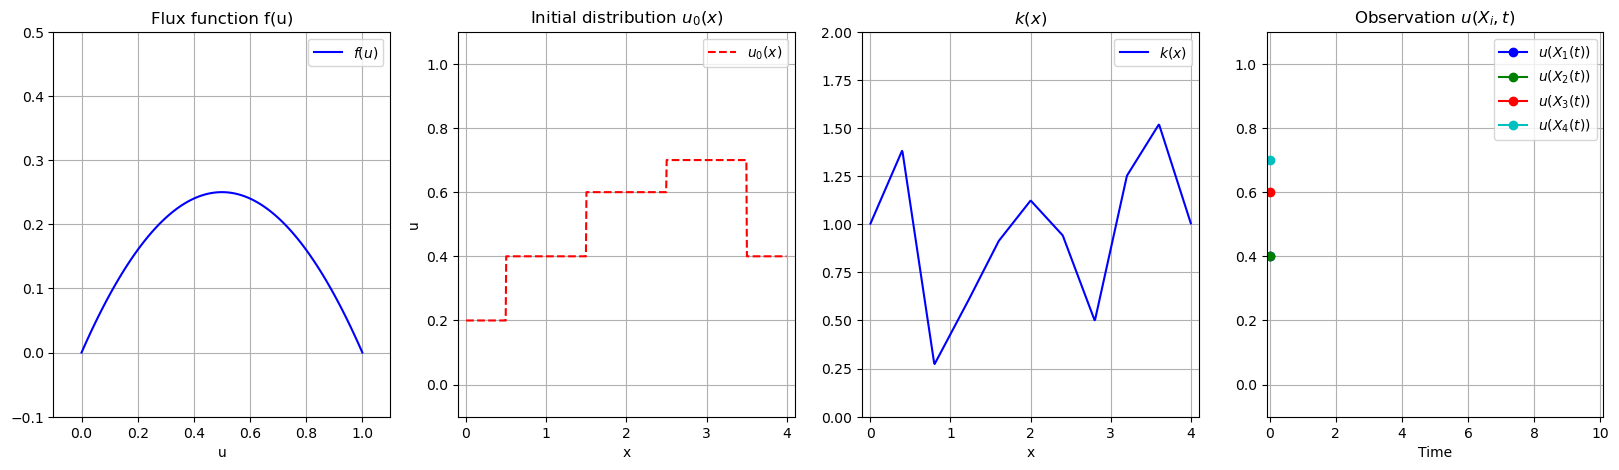

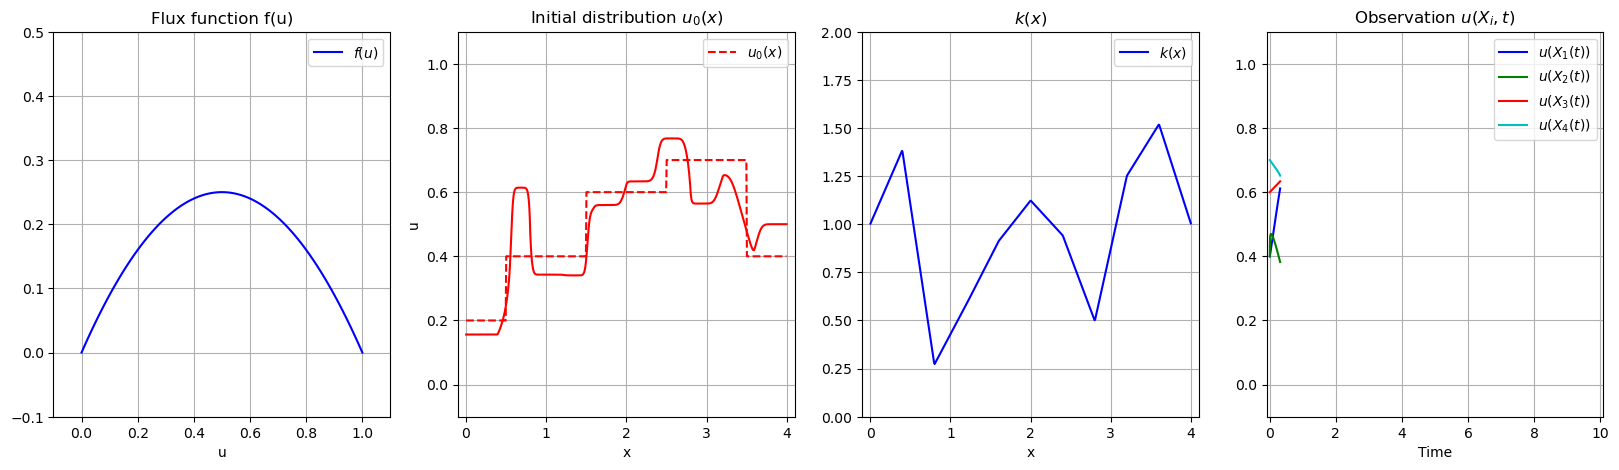

Timestep: 100, time = 0.3125


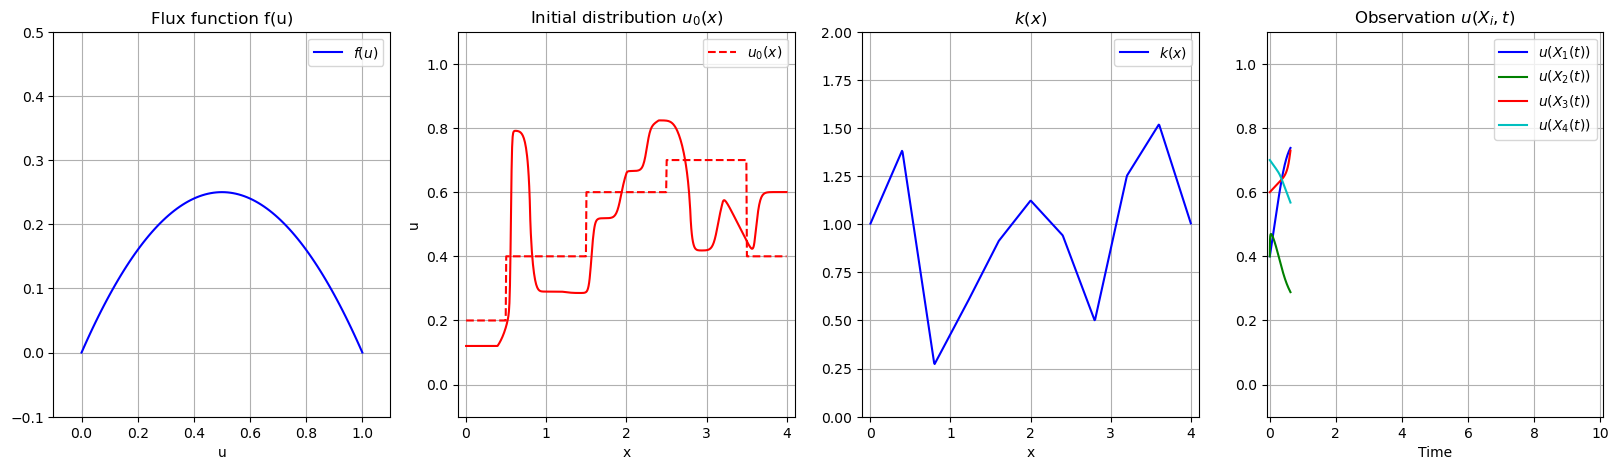

Timestep: 200, time = 0.625


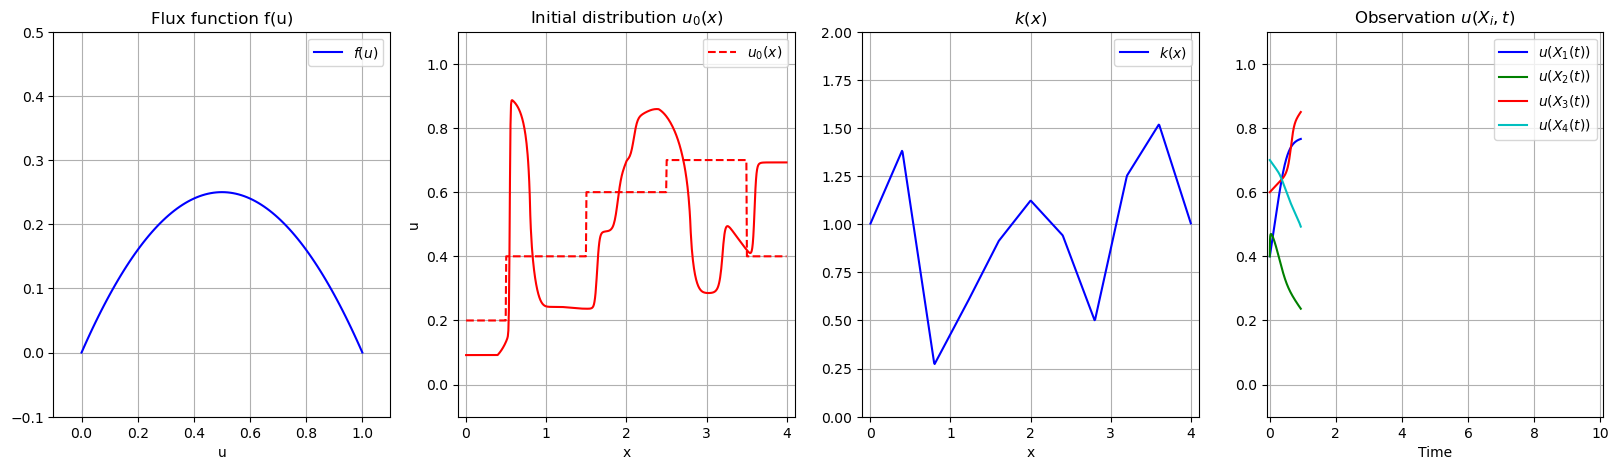

Timestep: 300, time = 0.9375


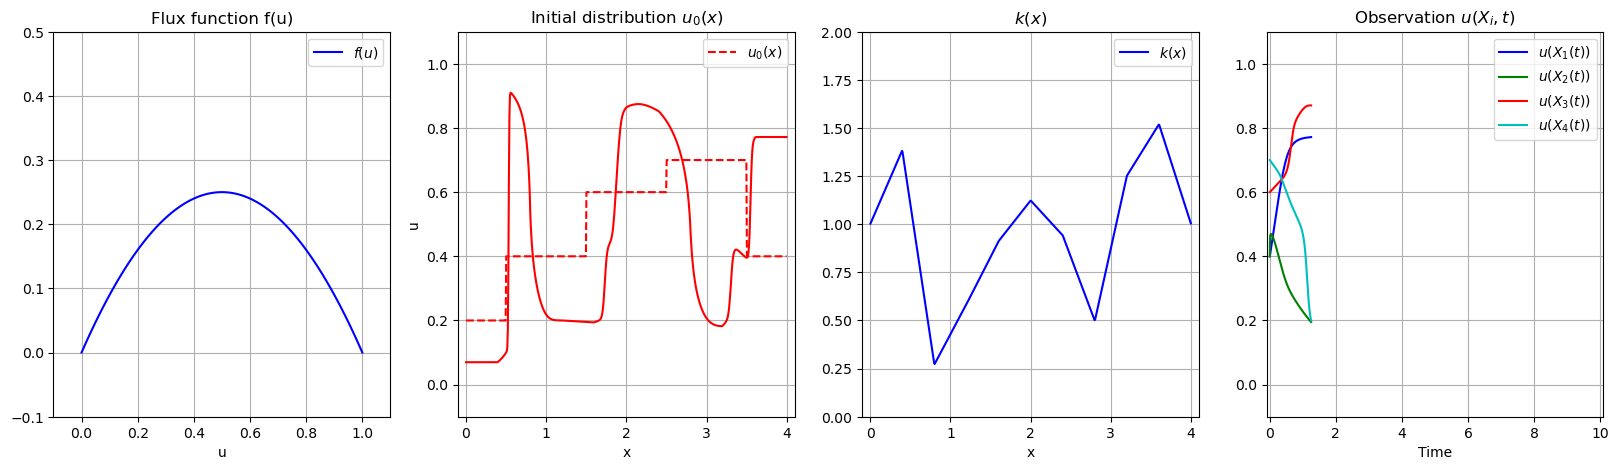

Timestep: 400, time = 1.25


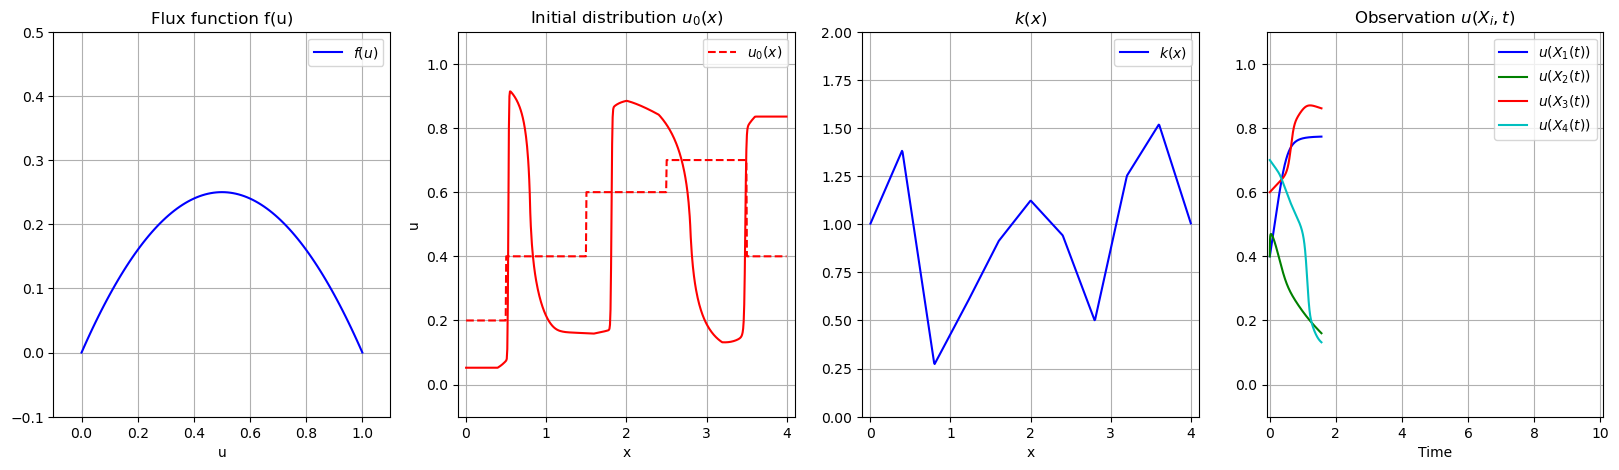

Timestep: 500, time = 1.5625


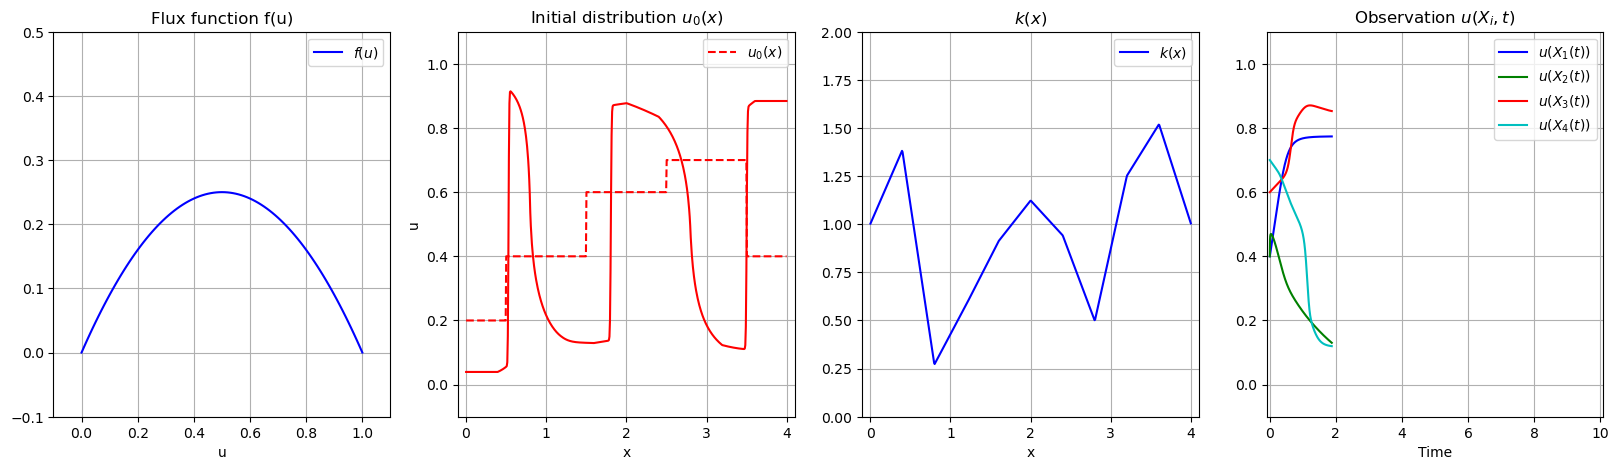

Timestep: 600, time = 1.875


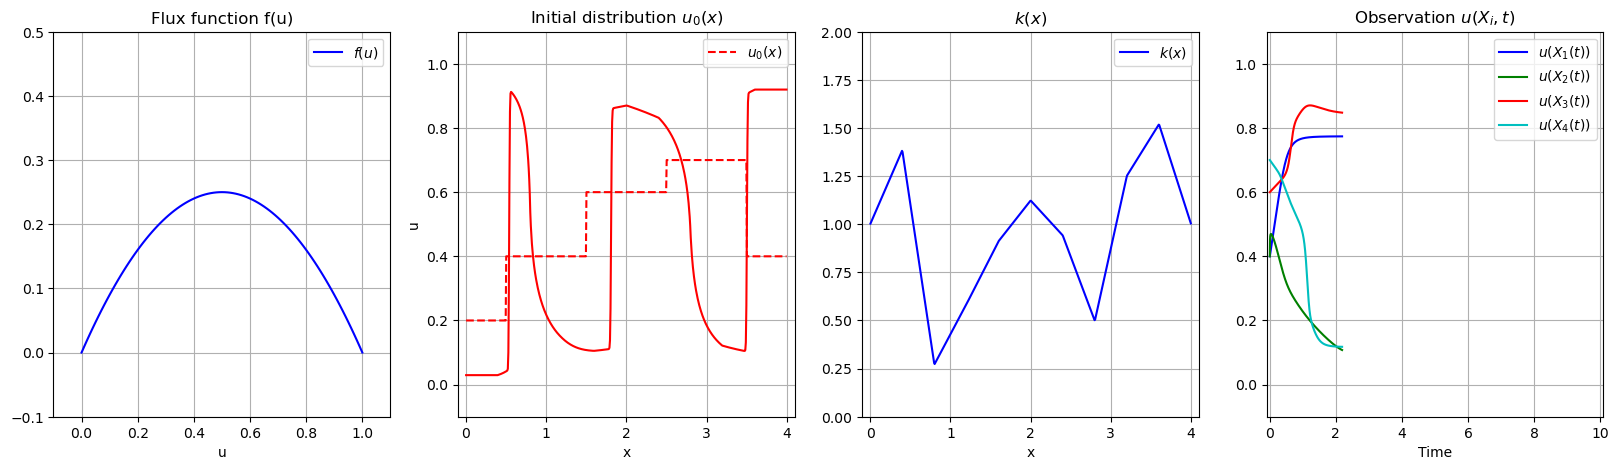

Timestep: 700, time = 2.1875


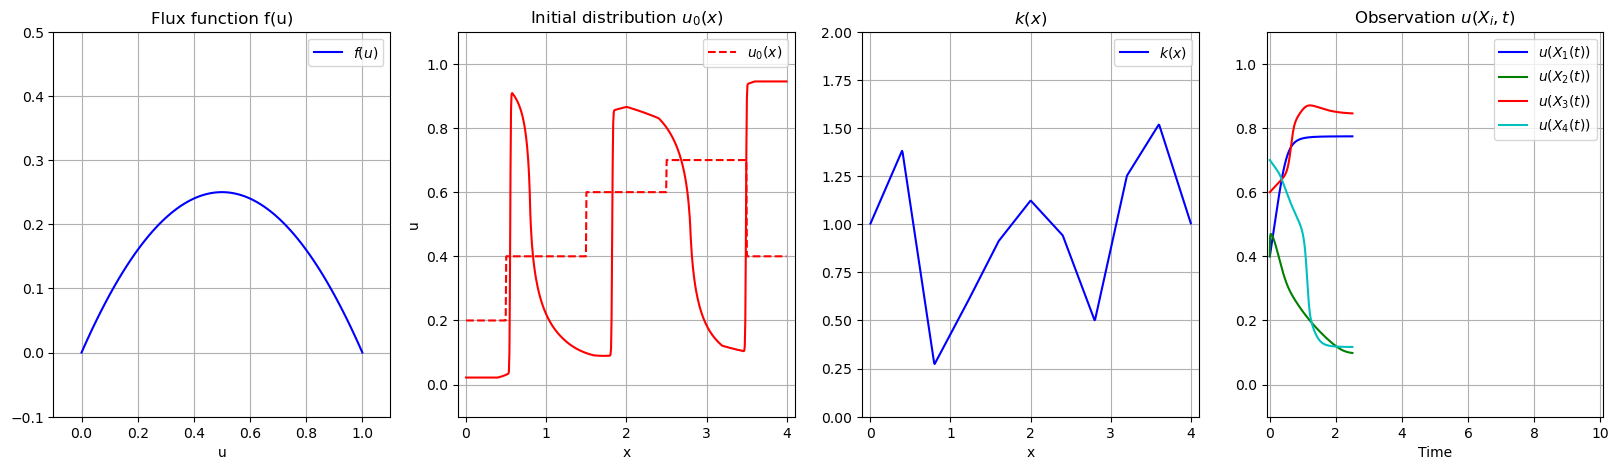

Timestep: 800, time = 2.5


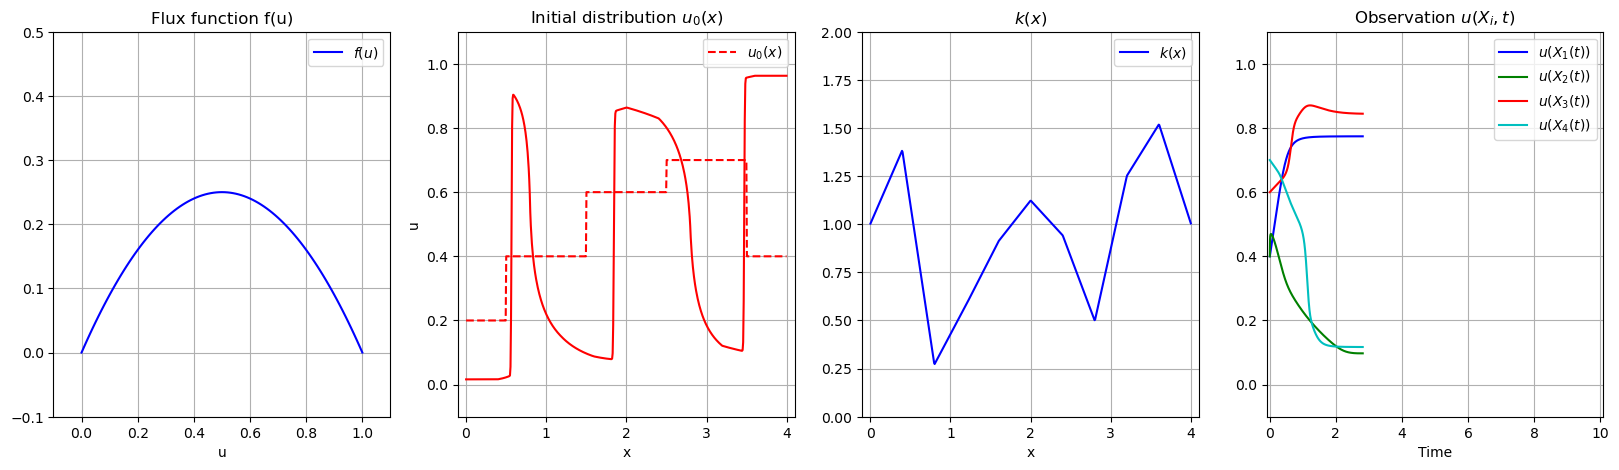

Timestep: 900, time = 2.8125


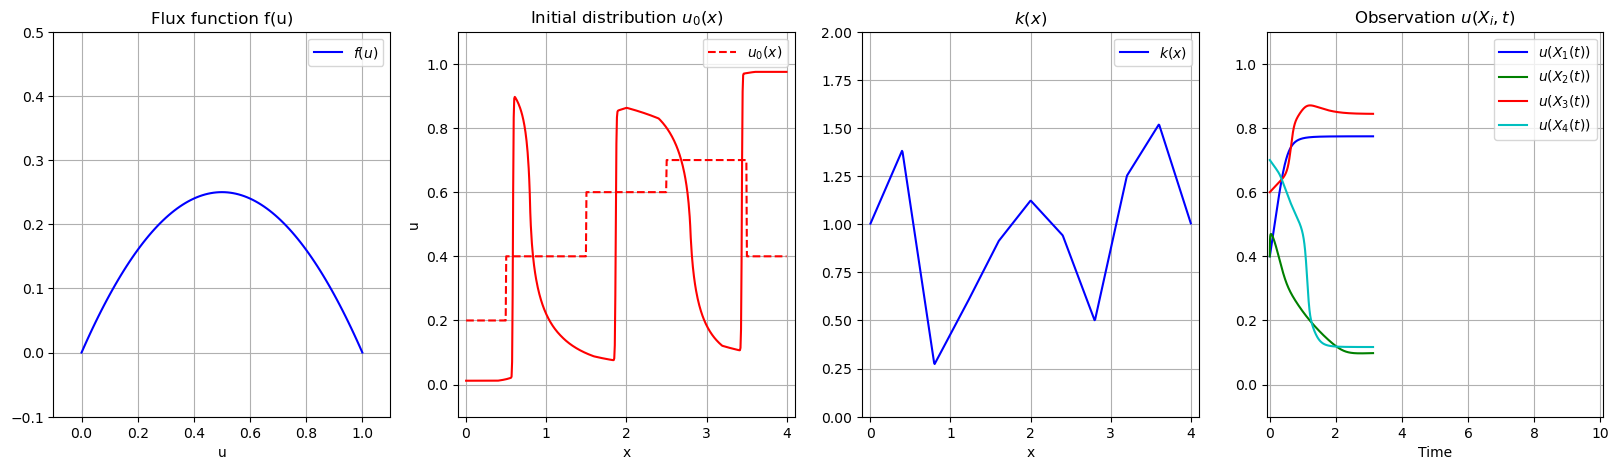

Timestep: 1000, time = 3.125


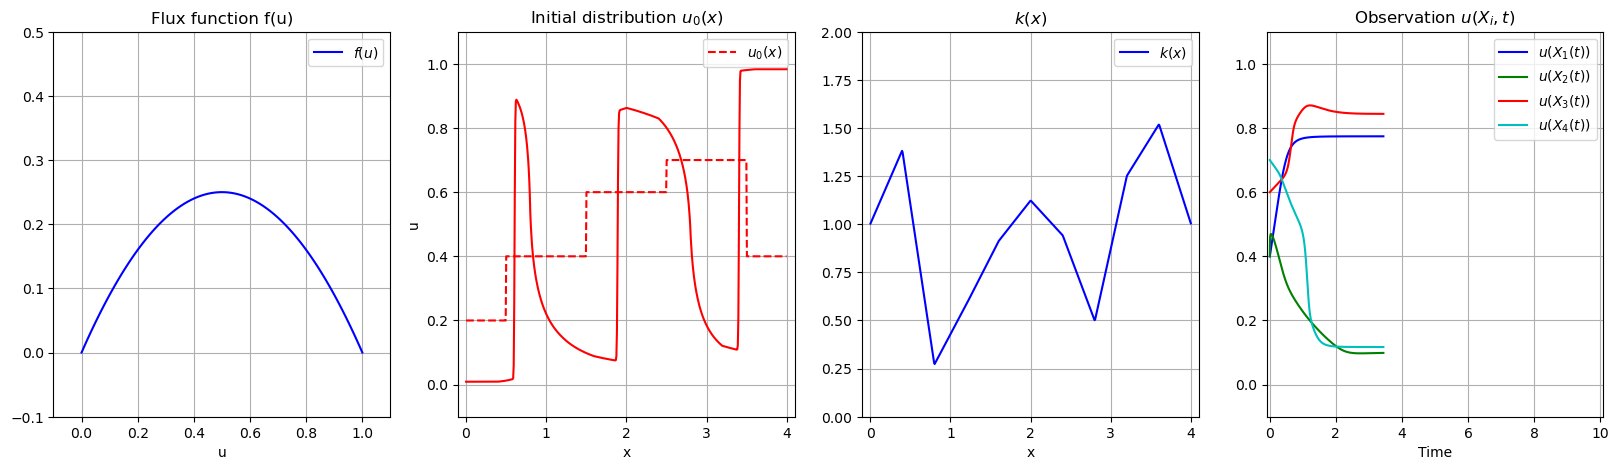

Timestep: 1100, time = 3.4375


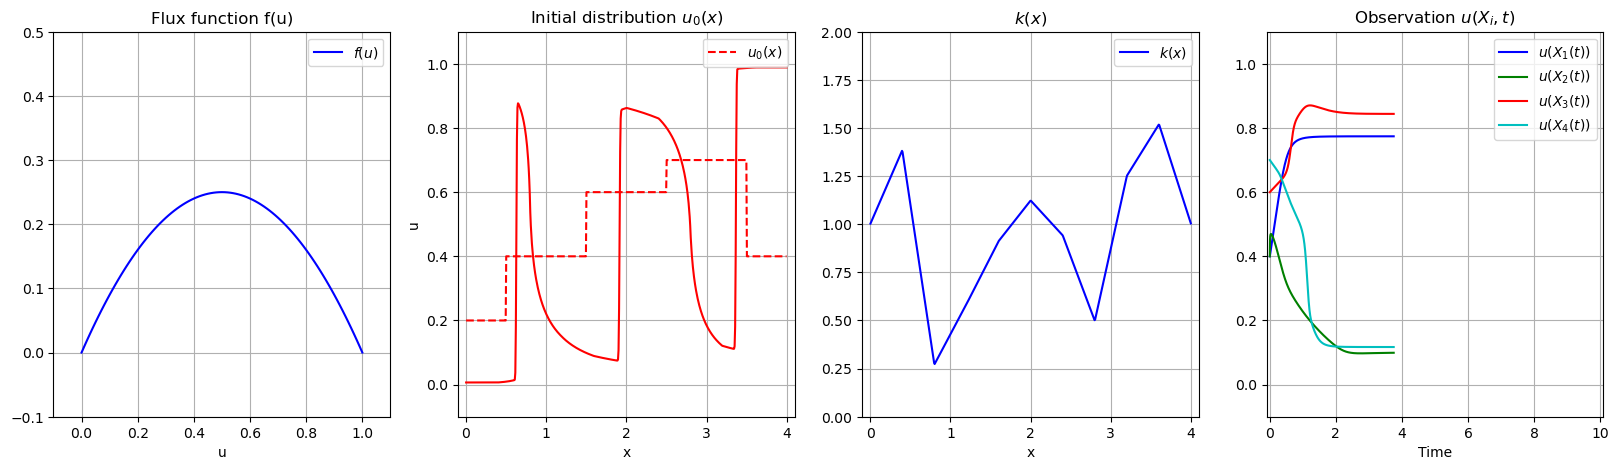

Timestep: 1200, time = 3.75


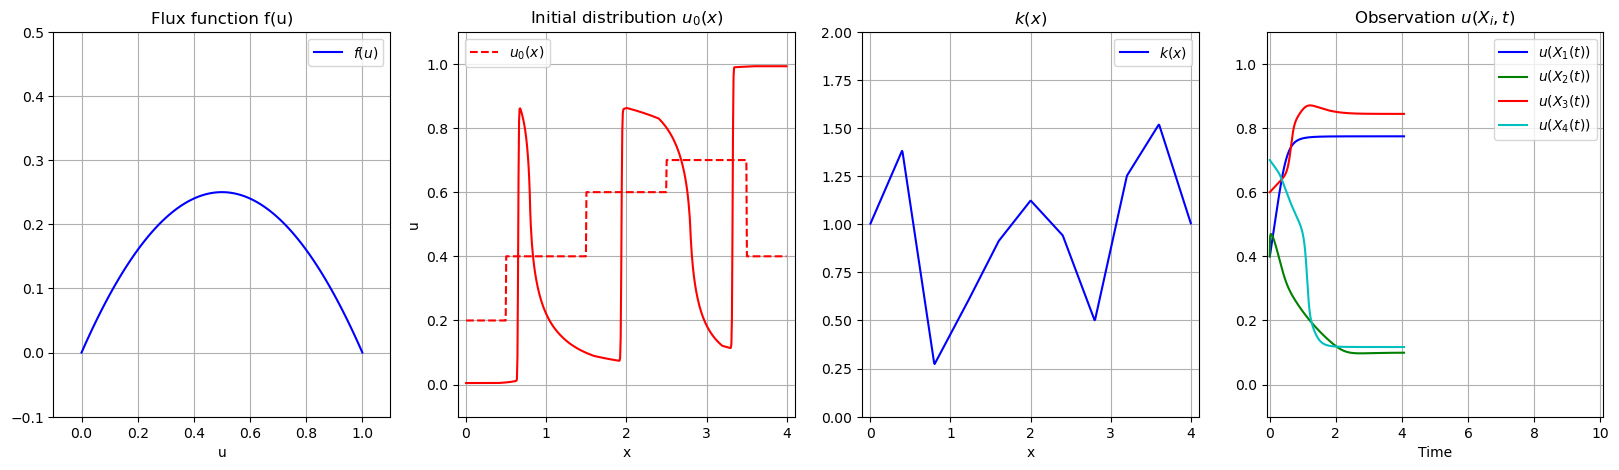

Timestep: 1300, time = 4.0625


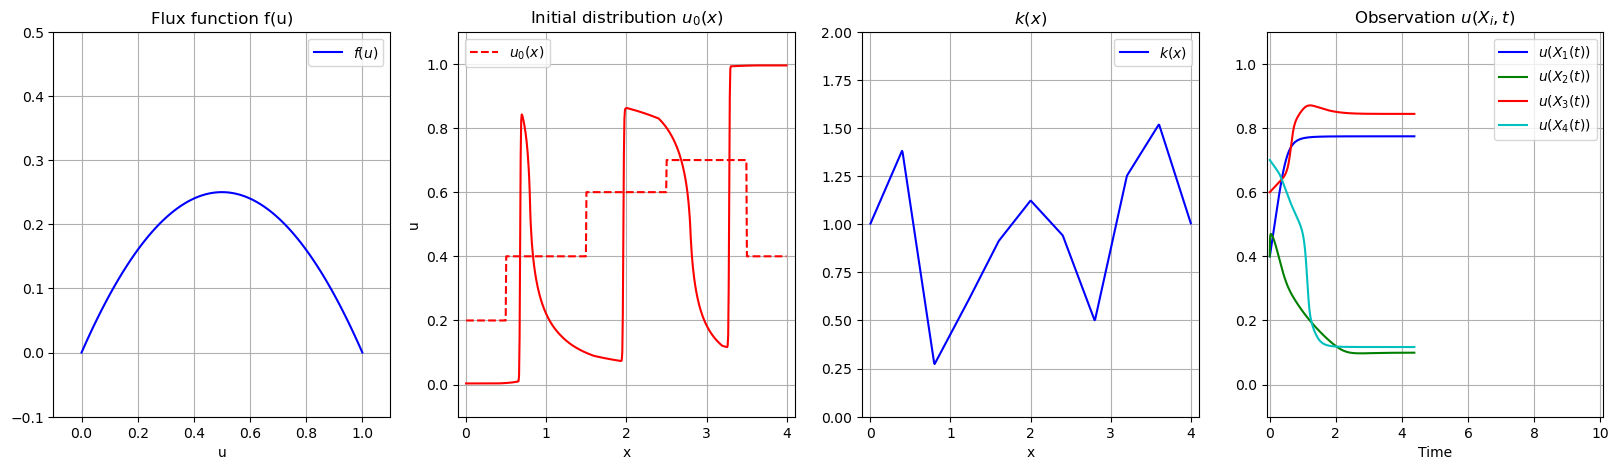

Timestep: 1400, time = 4.375


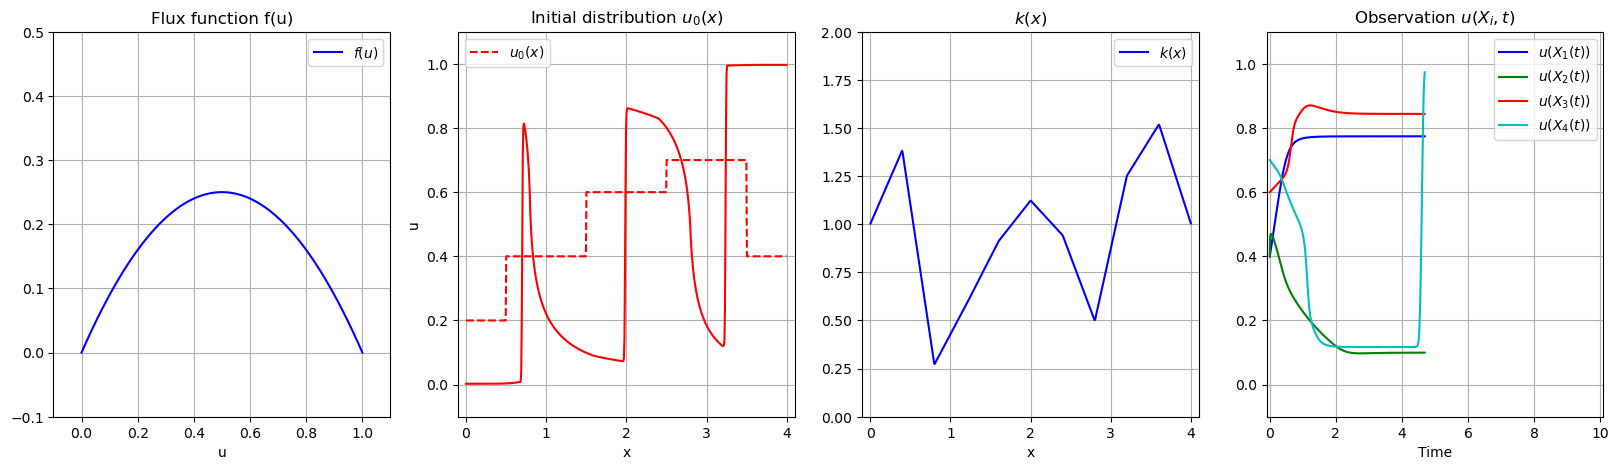

Timestep: 1500, time = 4.6875


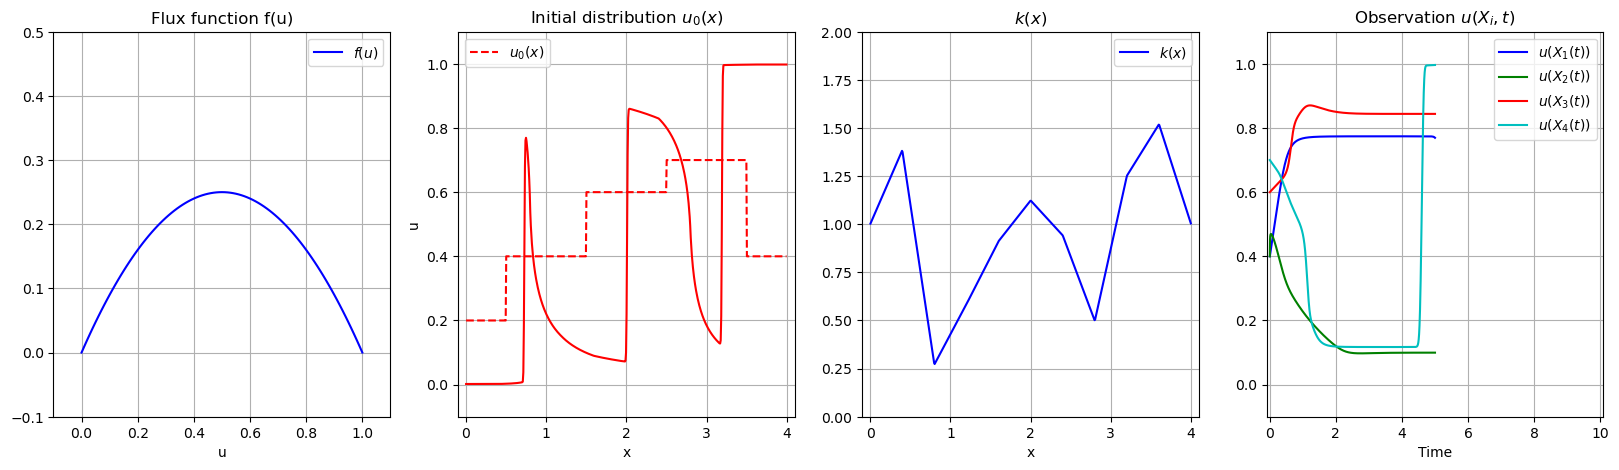

Timestep: 1600, time = 5.0


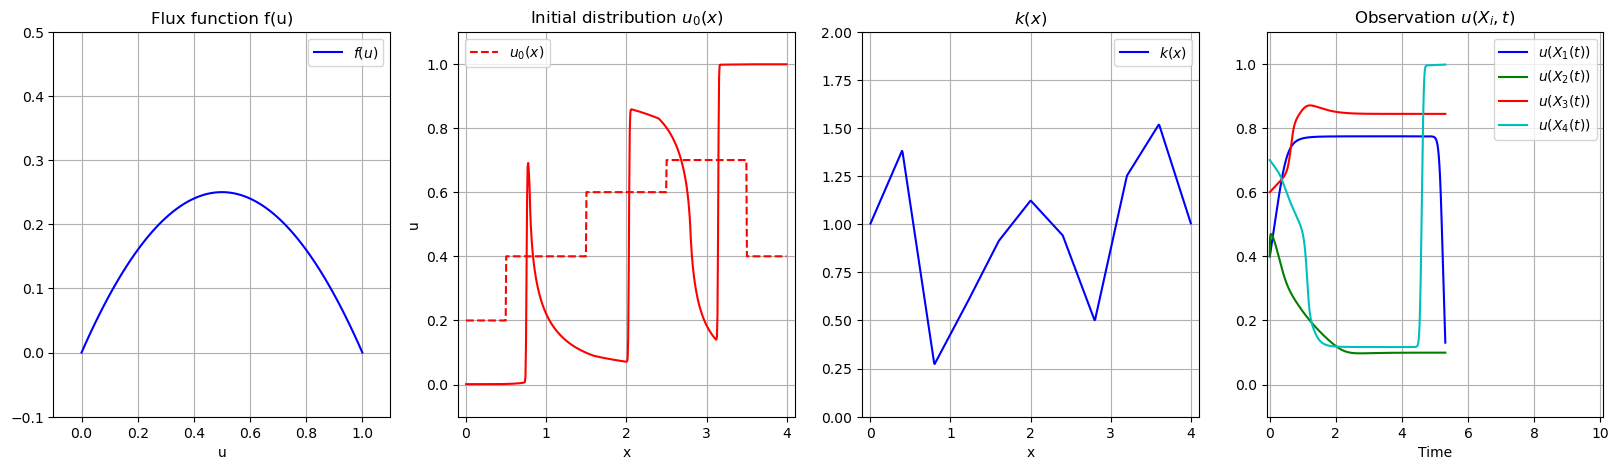

Timestep: 1700, time = 5.3125


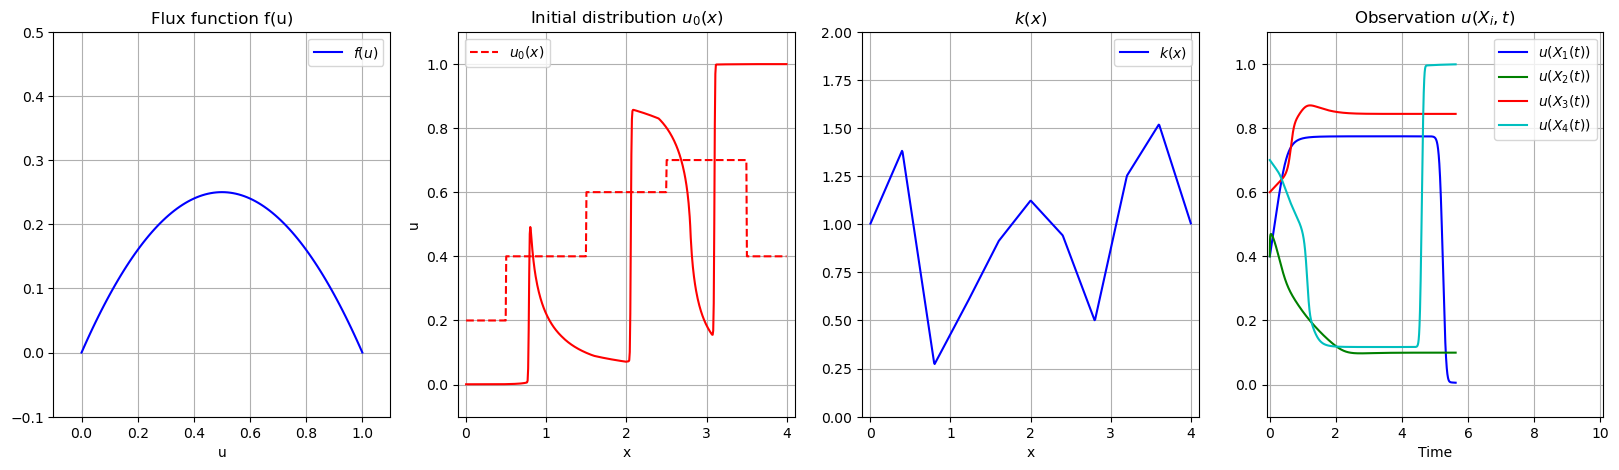

Timestep: 1800, time = 5.625


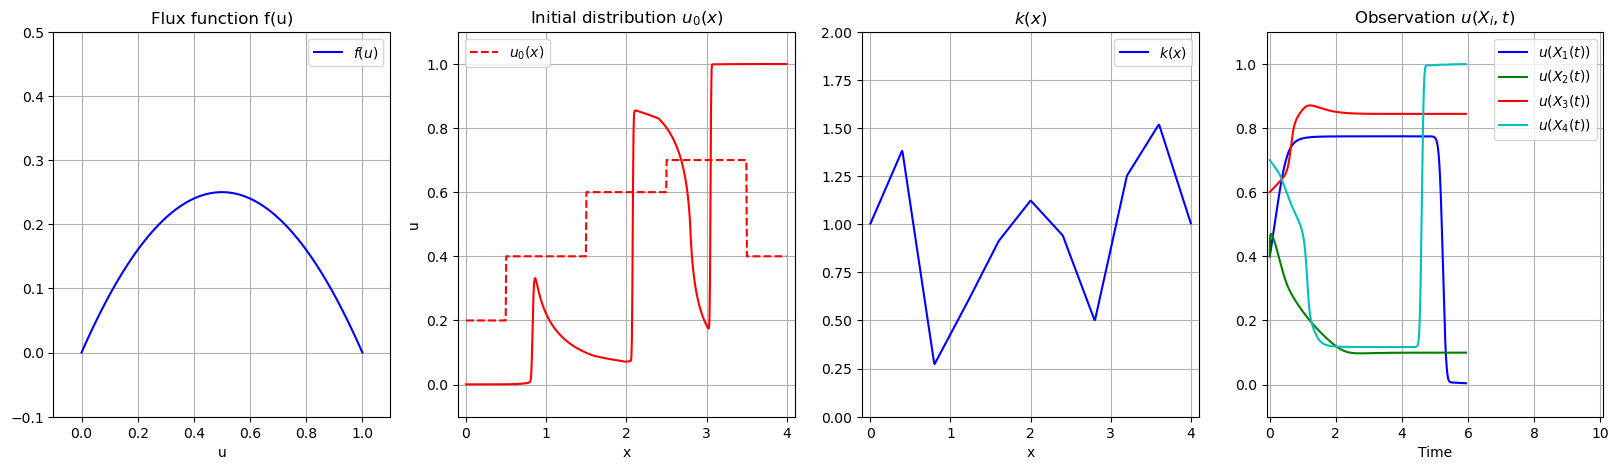

Timestep: 1900, time = 5.9375


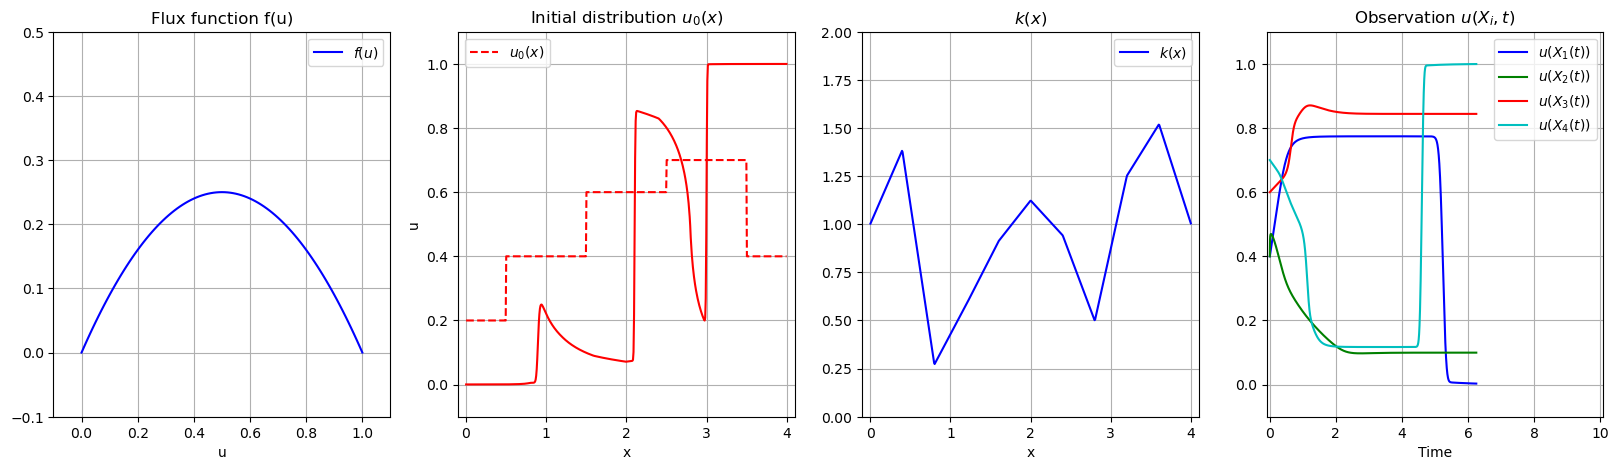

Timestep: 2000, time = 6.25


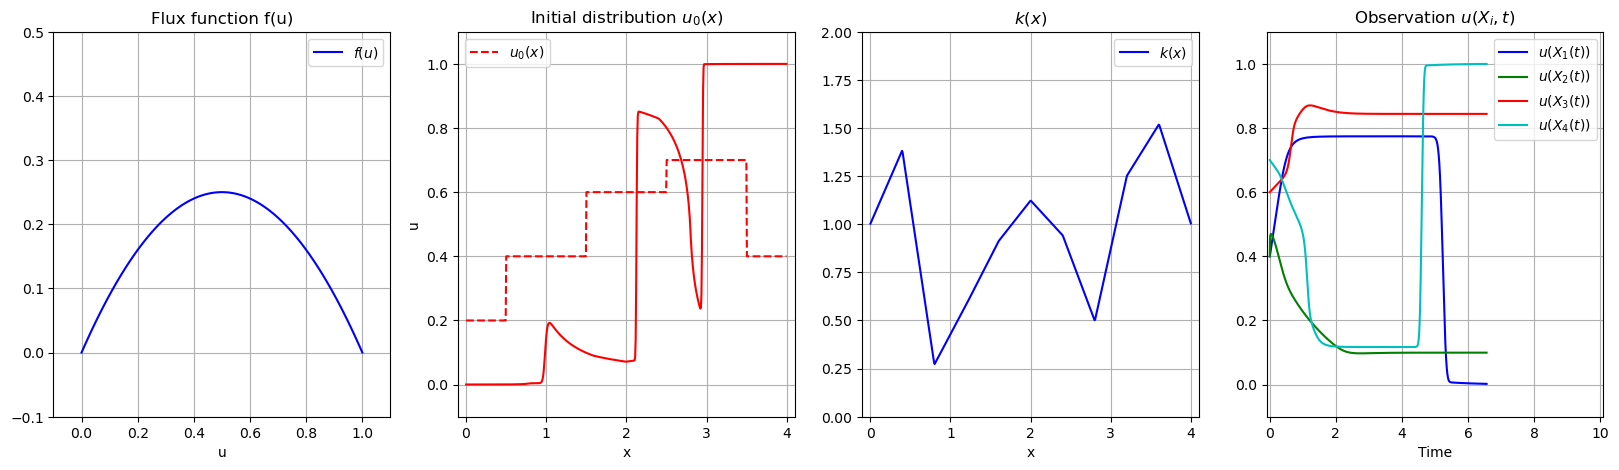

Timestep: 2100, time = 6.5625


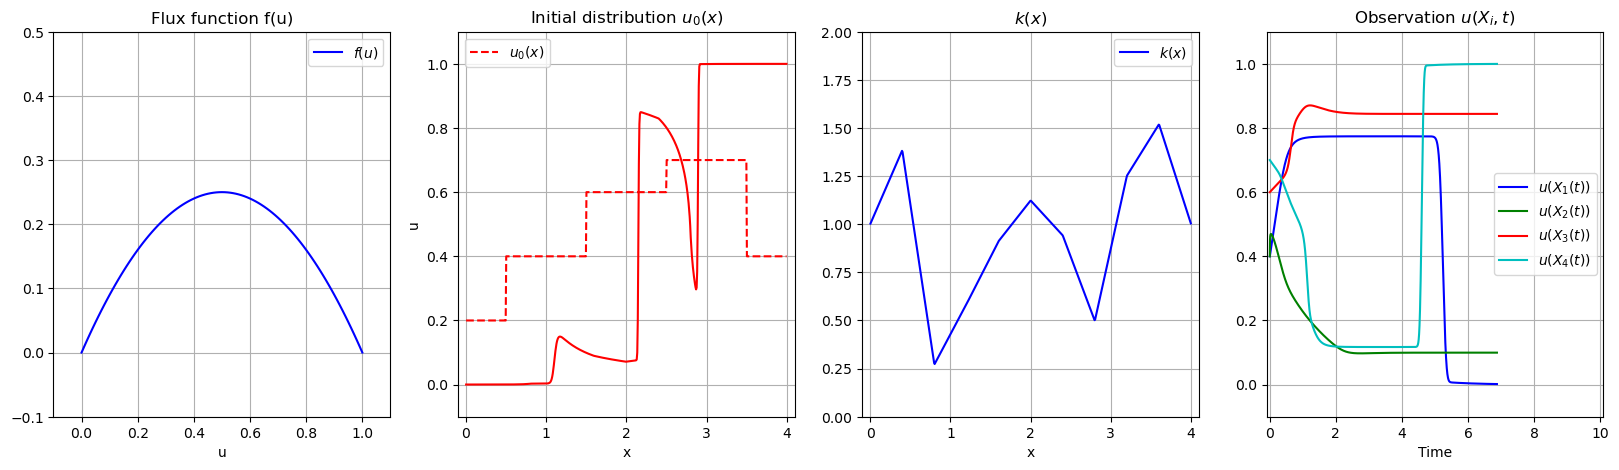

Timestep: 2200, time = 6.875


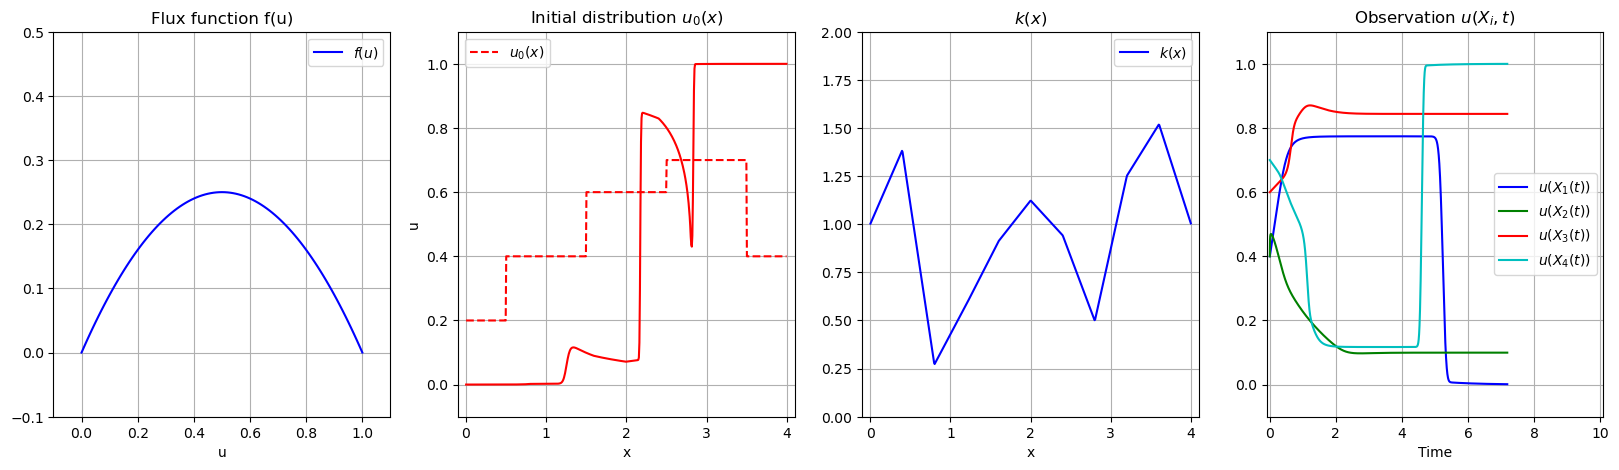

Timestep: 2300, time = 7.1875


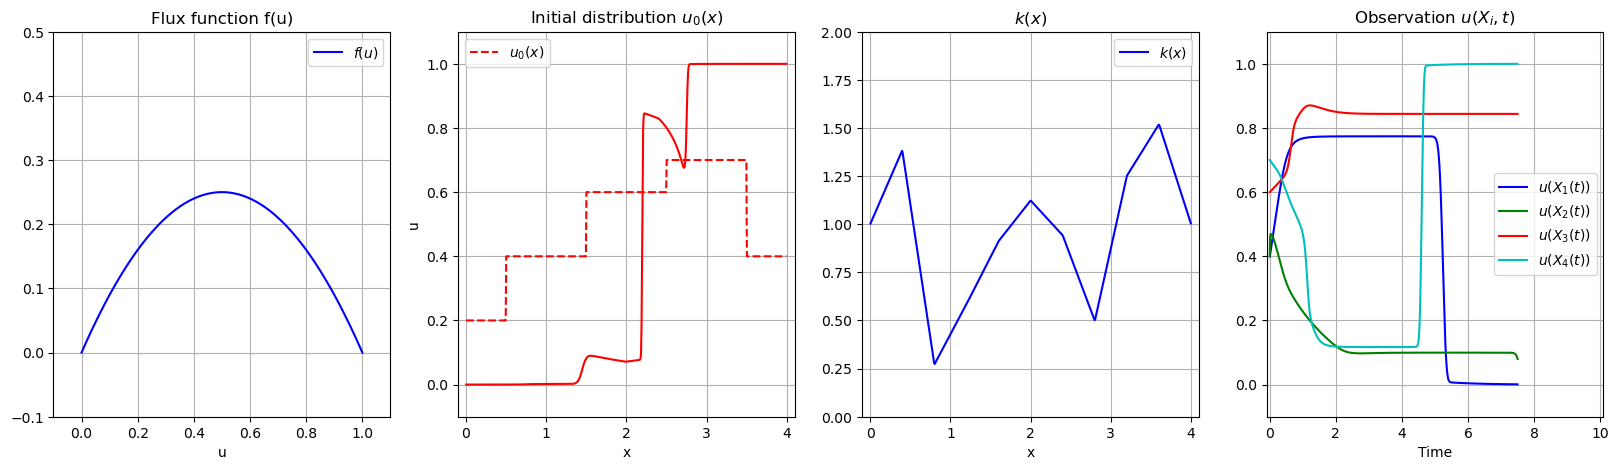

Timestep: 2400, time = 7.5


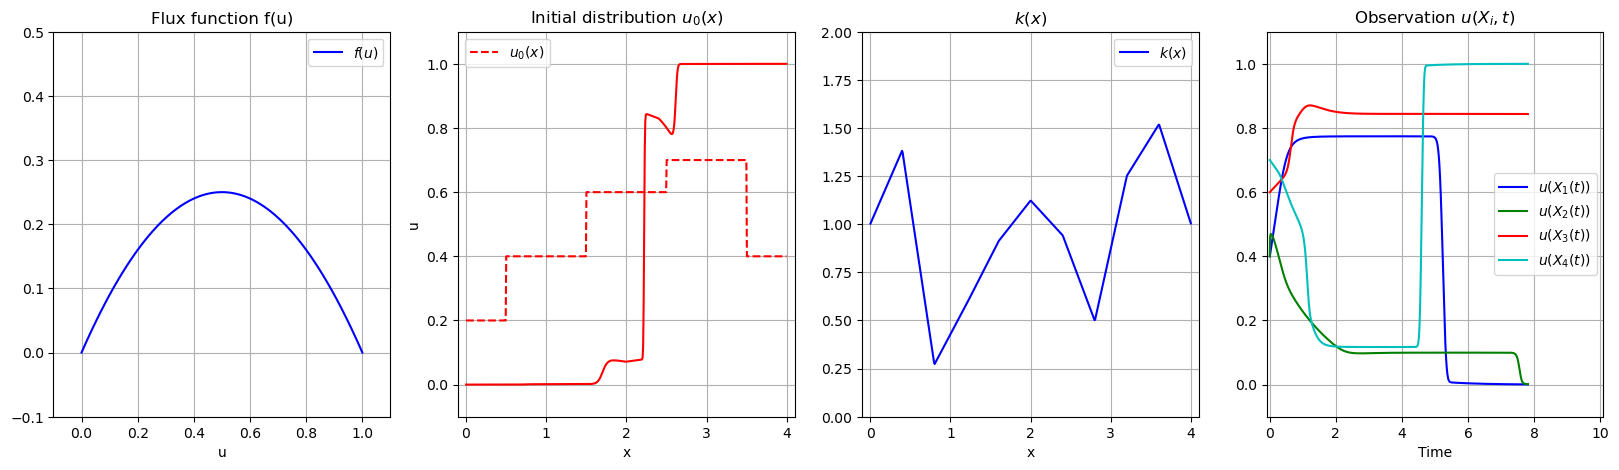

Timestep: 2500, time = 7.8125


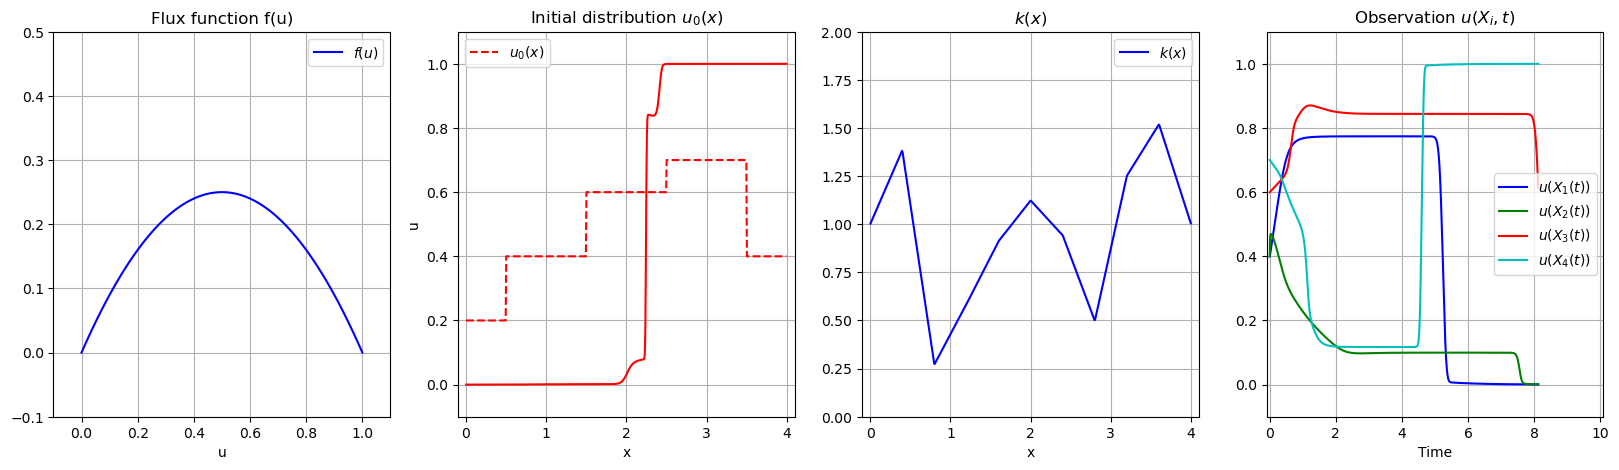

Timestep: 2600, time = 8.125


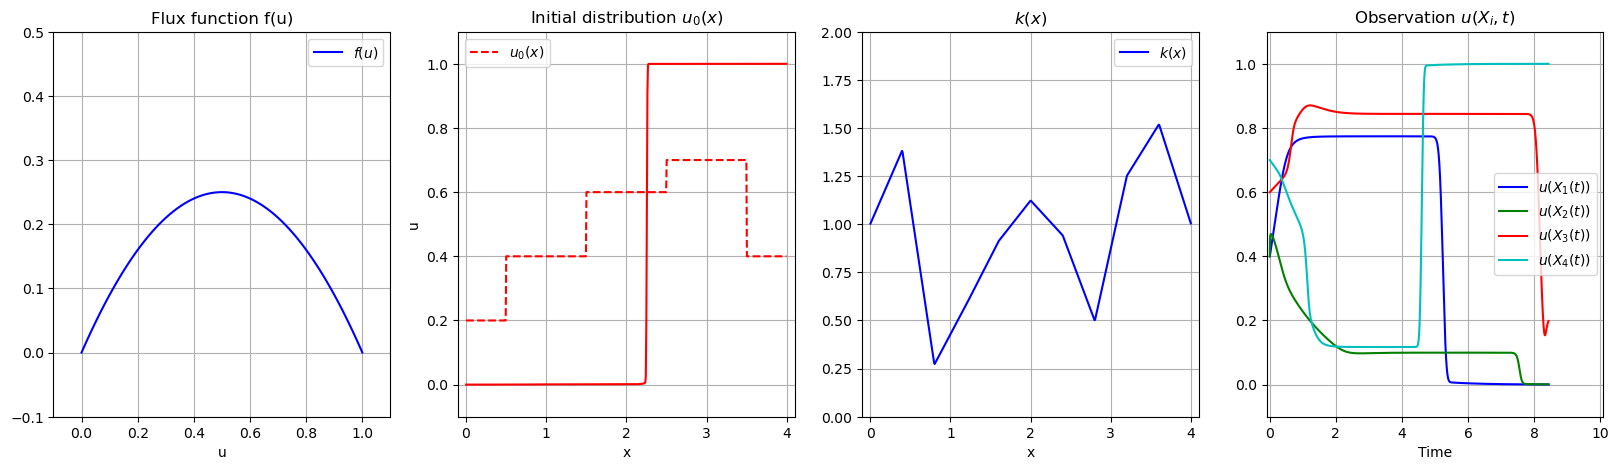

Timestep: 2700, time = 8.4375


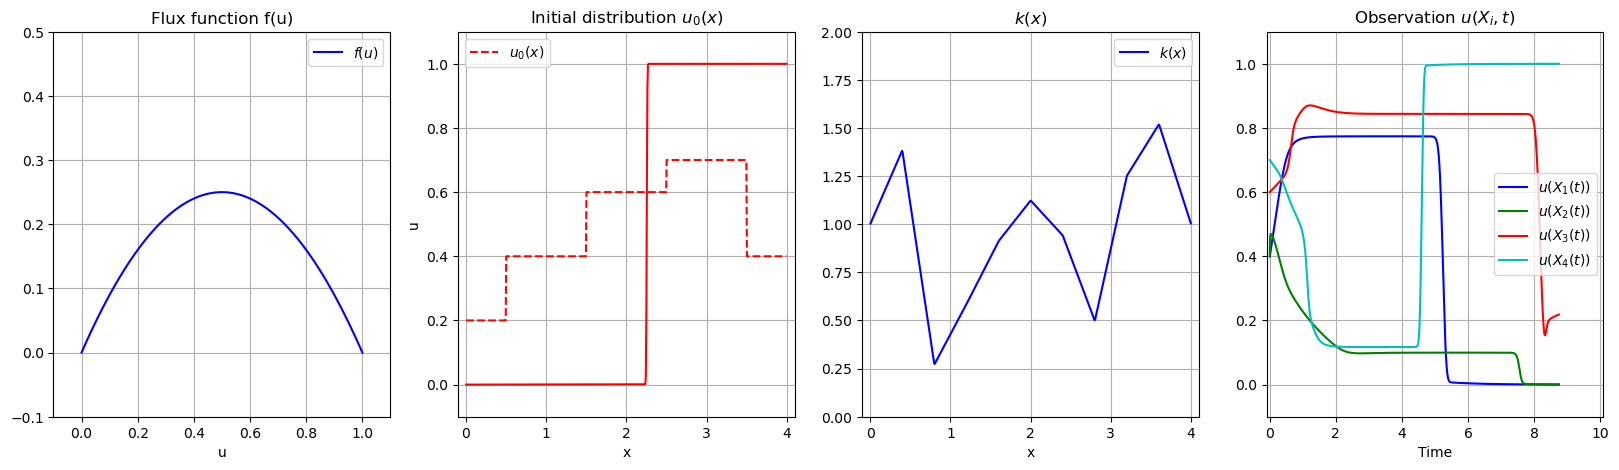

Timestep: 2800, time = 8.75


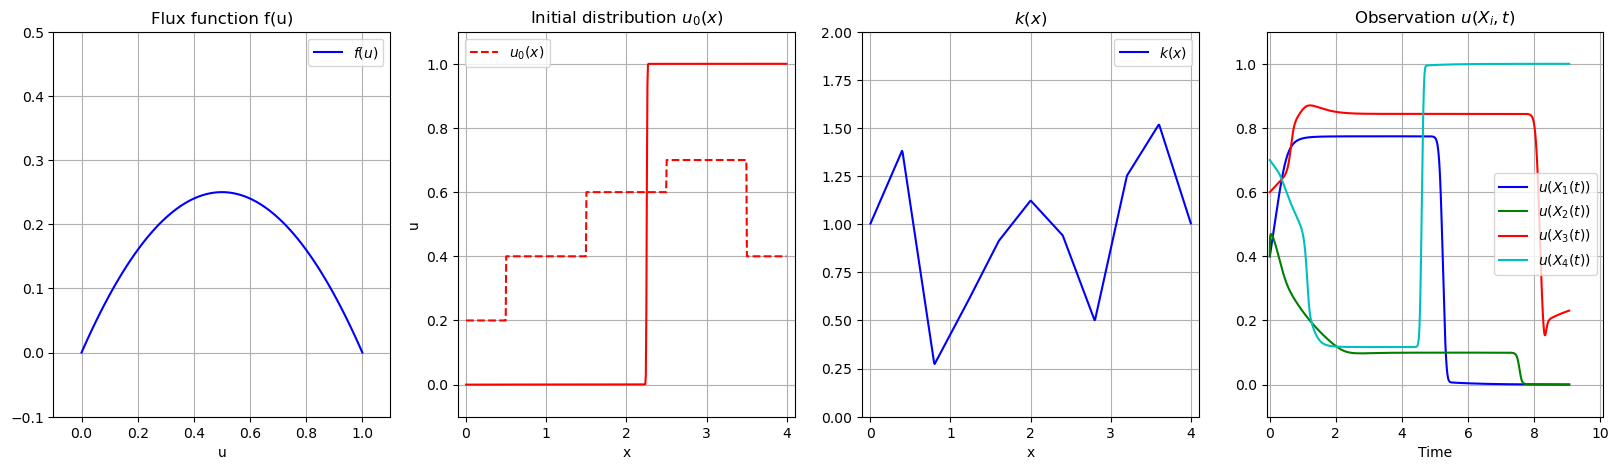

Timestep: 2900, time = 9.0625


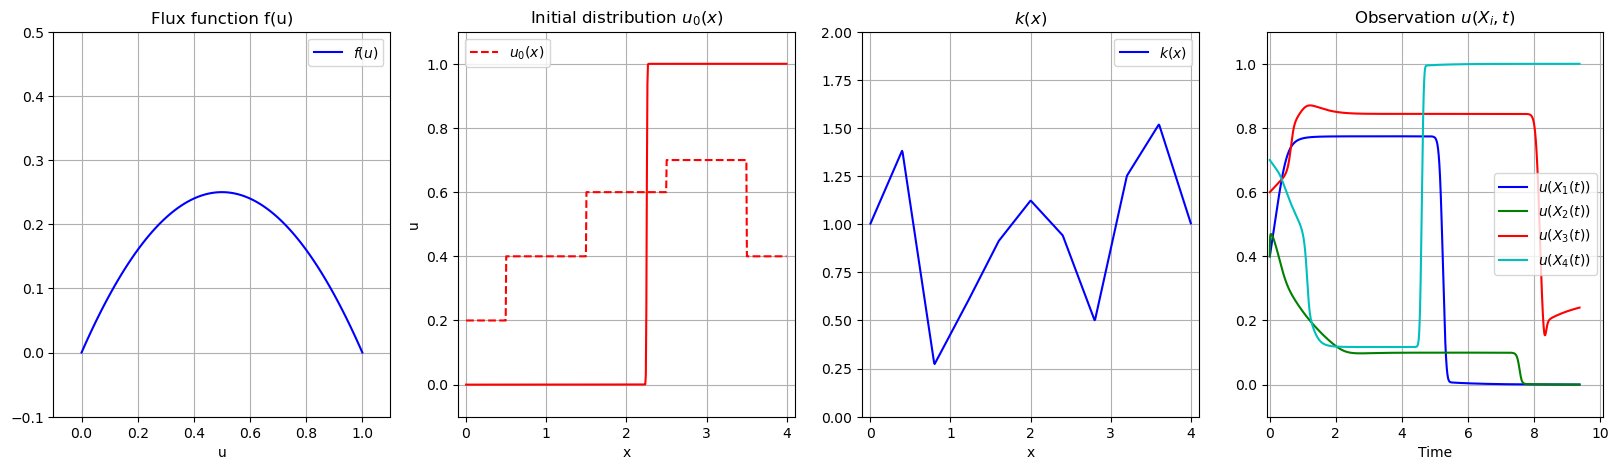

Timestep: 3000, time = 9.375


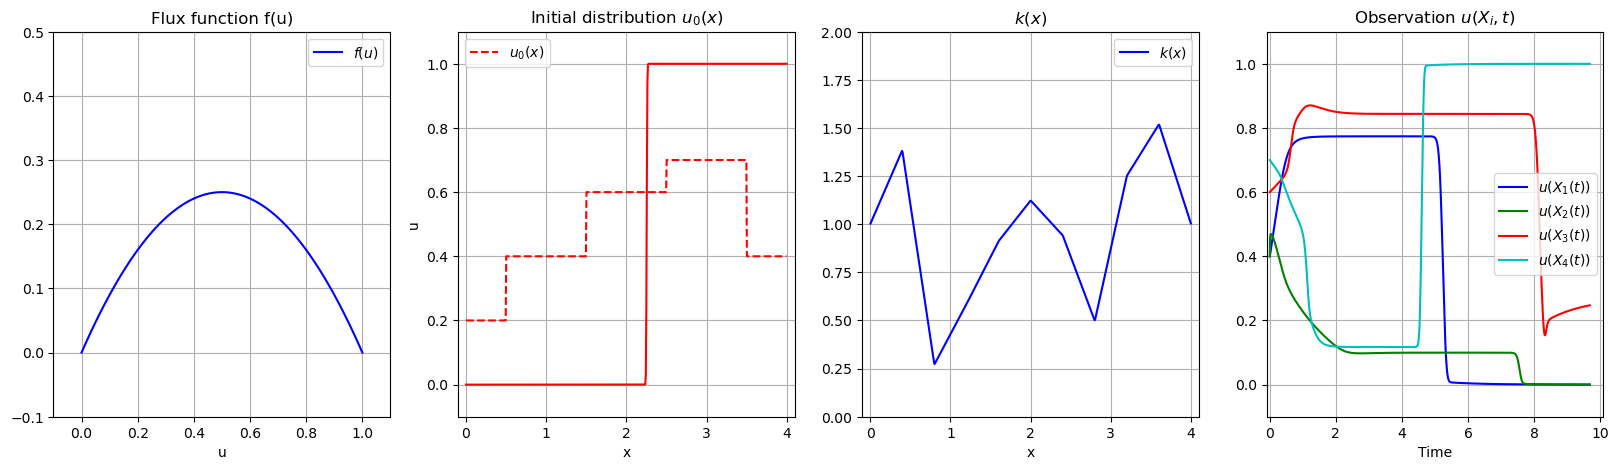

Timestep: 3100, time = 9.6875


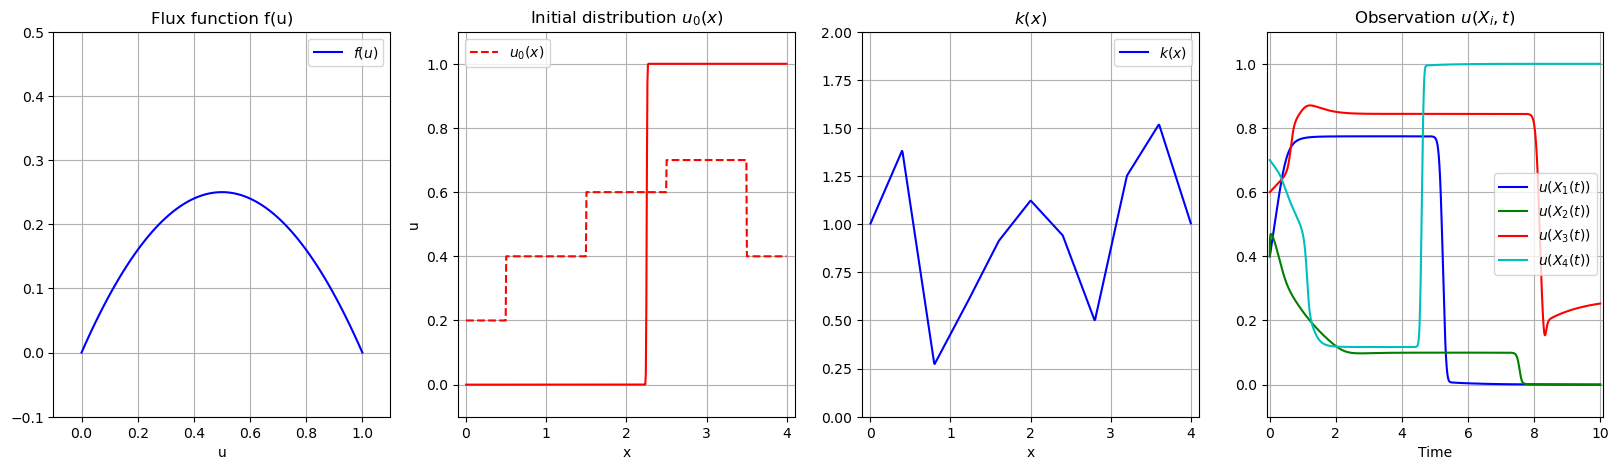

Timestep: 3200, time = 10.0
Computation of numerical solution finished


In [6]:
# Final time
T = 10

# Number of grid cells
M = 600

# Length of domain
aa = 0
bb = 4
Ldom = bb - aa

# Delta
dx = Ldom / M

# Define cell centers
x = np.arange(aa + 0.5 * dx, bb, dx)  # cell centers
xh = np.arange(aa, bb + dx, dx)         # interfaces

# Define number of time steps
NTime = 100 * 2 * 2 * 2 * 2 * 2  # e.g., 3200 time steps

# Time step dt
dt = T / NTime

# Provide positions of observation points X1, X2, X3, X4
X_position = [0.75, 1.5, 2.25, 3.25]

# Get the index corresponding to each observation point (assuming x is sorted)
s = [np.sum(x <= pos) - 1 for pos in X_position]

# Time discretization for the numerical scheme
t_step = np.linspace(0, T, NTime + 1)
u_X = [np.zeros(len(t_step)) for _ in range(4)]

# Time discretization associated with observation points (41 time instants)
t_obspoint = np.linspace(0, T, 41)
u_X_out = [np.zeros(len(t_obspoint)) for _ in range(4)]

# Terrain function
Mr = 9  # number of unknown interior k-values

# Discrete points x_k that define k(x)
x_k = np.array([0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0])

# Generate initial k(x) values: interior points are random normals, boundaries fixed to 1.
mu = 1
sigma = 0.25
k_val = np.random.uniform(low=0.25, high=1.75, size=Mr)
k_val[k_val < 0.25] = 0.25
k_val[k_val > 1.75] = 1.75

# Piecewise linear description of k(x) with fixed boundary values at x=0 and x=4.
y_k = np.concatenate(([1.0], k_val, [1.0]))

# Define the flux function f(u)
def fun_flux(u):
    return u * (1 - u)

v = np.arange(0, 1.0 + 0.01, 0.01)
flux_f = fun_flux(v)

# Define the initial data function
def fun_initial(x):
    u_init = np.zeros_like(x)
    u_init[x <= 0.5] = 0.2
    u_init[(x > 0.5) & (x <= 1.5)] = 0.4
    u_init[(x > 1.5) & (x <= 2.5)] = 0.6
    u_init[(x > 2.5) & (x <= 3.5)] = 0.7
    u_init[x > 3.5] = 0.4
    return u_init

u0 = fun_initial(x)

# Plot the initial setup in 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].plot(v, flux_f, '-b')
axs[0].set_title("Flux function f(u)")
axs[0].set_xlabel("u")
axs[0].axis([-0.1, 1.1, -0.1, 0.5])
axs[0].legend(['$f(u)$'])
axs[0].grid(True)

axs[1].plot(x, u0, '--r')
axs[1].set_title("Initial distribution $u_0(x)$")
axs[1].set_ylabel("u")
axs[1].set_xlabel("x")
axs[1].axis([aa - 0.1, bb + 0.1, -0.1, 1.1])
axs[1].legend(['$u_0(x)$'])
axs[1].grid(True)

axs[2].plot(x, np.interp(x, x_k, y_k), '-b')
axs[2].set_title("$k(x)$")
axs[2].set_xlabel("x")
axs[2].axis([aa - 0.1, bb + 0.1, 0, 2])
axs[2].legend(['$k(x)$'])
axs[2].grid(True)

# Initialize observation data at t=0
for ind in range(4):
    u_X[ind][0] = u0[s[ind]]

# For the observation plot, plot the initial observation points
axs[3].plot(t_step[:1], [u_X[0][0]], '-ob')
axs[3].plot(t_step[:1], [u_X[1][0]], '-og')
axs[3].plot(t_step[:1], [u_X[2][0]], '-or')
axs[3].plot(t_step[:1], [u_X[3][0]], '-oc')
axs[3].set_title("Observation $u(X_i,t)$")
axs[3].set_xlabel("Time")
axs[3].axis([-0.1, T + 0.1, -0.1, 1.1])
axs[3].legend(['$u(X_1(t))$', '$u(X_2(t))$', '$u(X_3(t))$', '$u(X_4(t))$'])
axs[3].grid(True)

plt.show()

# Define index arrays for the scheme
J = np.arange(0, M)
J1 = np.arange(1, M-1)
J2 = np.arange(0, M-1)

# Define vectors for the new and old time steps
u = np.zeros(M)
u_old = np.copy(u0)

# CFL parameter
lambda_1 = dt/dx

def check_CFLconstraint(value):
    if value > 1:
        print("CFL constraint not satisfied. Stopping the problem")
        sys.exit()

MaxfP = 1
CFL_number = lambda_1 * MaxfP * np.max(y_k)
check_CFLconstraint(CFL_number)

# Time-stepping loop
for j in range(NTime):
    t_step[j+1] = (j+1)*dt

    # Compute flux at cell centers
    Flux = fun_flux(u_old)
    
    # Compute flux at interfaces using a Rusanov-like average
    F_half = np.zeros(M-1)
    F_half[J2] = 0.5 * (Flux[J2] + Flux[J2+1]) - 0.5 * MaxfP * (u_old[J2+1] - u_old[J2])
    
    # Interpolate k(x) at interfaces
    k_half = np.zeros(M-1)
    k_half[J2] = np.interp(xh[J2 + 1], x_k, y_k)
    
    # Update interior cells using a finite difference scheme
    u[J1] = u_old[J1] - lambda_1 * (k_half[J1] * F_half[J1] - k_half[J1 - 1] * F_half[J1 - 1])
    
    # Apply boundary conditions
    u[0] = u[1]
    u[-1] = u[-2]
    
    # Record observations at the specified indices
    for ind in range(4):
        u_X[ind][j+1] = u[s[ind]]
    
    # Plot every 100 time steps
    if (j+1) % 100 == 0:
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        
        axs[0].plot(v, flux_f, '-b')
        axs[0].set_title("Flux function f(u)")
        axs[0].set_xlabel("u")
        axs[0].axis([-0.1, 1.1, -0.1, 0.5])
        axs[0].legend(['$f(u)$'])
        axs[0].grid(True)
        
        axs[1].plot(x, u0, '--r')
        axs[1].plot(x, u, '-r', label='$u(x,t)$')
        axs[1].set_title("Initial distribution $u_0(x)$")
        axs[1].set_ylabel("u")
        axs[1].set_xlabel("x")
        axs[1].axis([aa - 0.1, bb + 0.1, -0.1, 1.1])
        axs[1].legend(['$u_0(x)$'])
        axs[1].grid(True)
        
        axs[2].plot(x, np.interp(x, x_k, y_k), '-b')
        axs[2].set_title("$k(x)$")
        axs[2].set_xlabel("x")
        axs[2].axis([aa - 0.1, bb + 0.1, 0, 2])
        axs[2].legend(['$k(x)$'])
        axs[2].grid(True)
        
        # Plot observation curves up to the current time step
        for ind, color in zip(range(4), ['b', 'g', 'r', 'c']):
            axs[3].plot(t_step[:j+2], u_X[ind][:j+2], f'-{color}', label=f'$u(X_{ind+1}(t))$')
        axs[3].set_title("Observation $u(X_i,t)$")
        axs[3].set_xlabel("Time")
        axs[3].axis([-0.1, T + 0.1, -0.1, 1.1])
        axs[3].legend()
        axs[3].grid(True)
        
        plt.show()
        print(f"Timestep: {j+1}, time = {t_step[j+1]}")
    
    u_old = np.copy(u)

print("Computation of numerical solution finished")

# Interpolate observation data onto a coarser time grid for output
for ind in range(4):
    u_X_out[ind][:] = np.interp(t_obspoint, t_step, u_X[ind])


Task 1  
d  

Loading .mat file

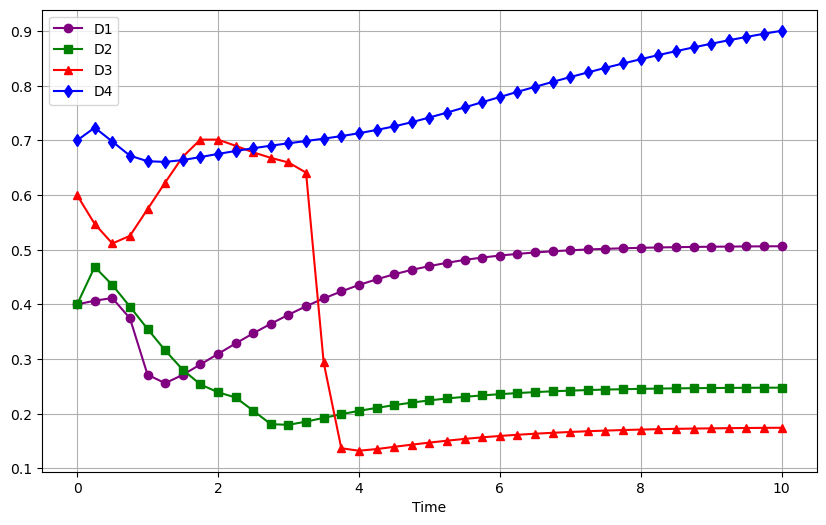

In [ ]:
# Load MATLAB file
mat_data = scipy.io.loadmat('TrueData_FluxF_M52_kx_Traffic_X1X2X3X4_N600_u0X2_Nov03.mat')

# Extract the Du_true_X data
du_true_x1 = mat_data['u_true_X1']
du_true_x2 = mat_data['u_true_X2']
du_true_x3 = mat_data['u_true_X3']
du_true_x4 = mat_data['u_true_X4']

# Extract the time observations
time_obs = mat_data['time_obs'].flatten()  # Ensure it's a 1D array

# Plot all Du_true_X values
plt.figure(figsize=(10, 6))

plt.plot(time_obs, du_true_x1[:, 0], label='D1', linestyle='-', marker='o', color='purple')
plt.plot(time_obs, du_true_x2[:, 0], label='D2', linestyle='-', marker='s', color='green')
plt.plot(time_obs, du_true_x3[:, 0], label='D3', linestyle='-', marker='^', color='red')
plt.plot(time_obs, du_true_x4[:, 0], label='D4', linestyle='-', marker='d', color='blue')

plt.xlabel('Time')
#plt.ylabel('Du_true Values')
#plt.title('Plot of Du_true_X Variables')
plt.legend()
plt.grid(True)

plt.show()


Task 1  
  
e

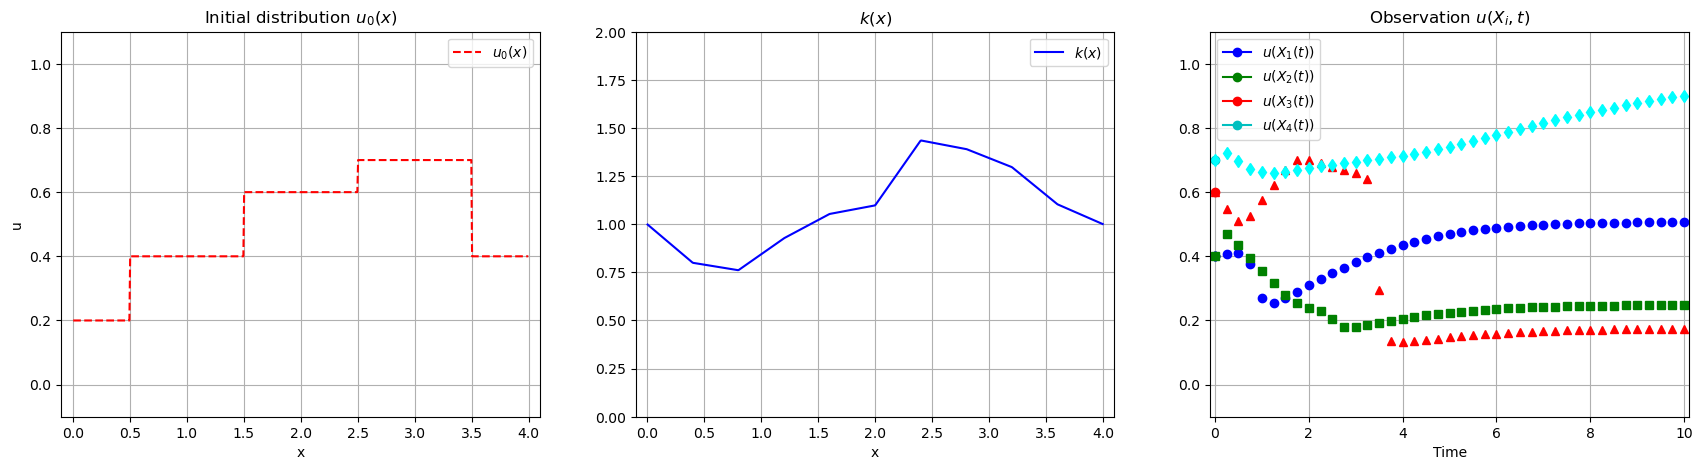

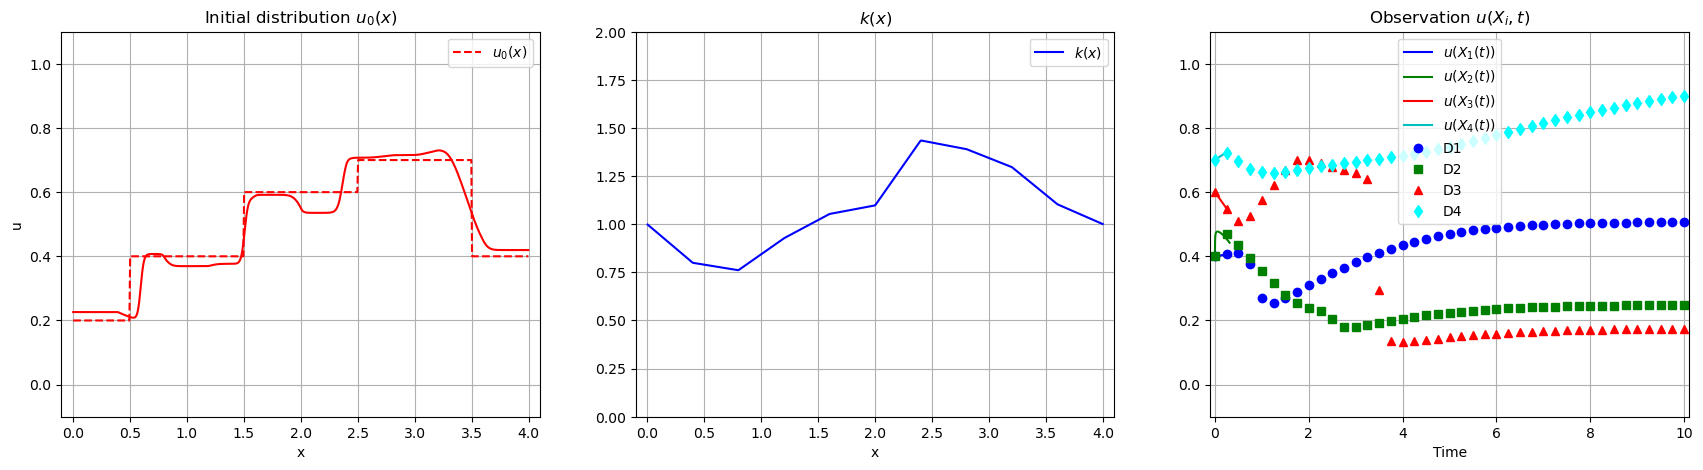

Timestep: 100, time = 0.3125


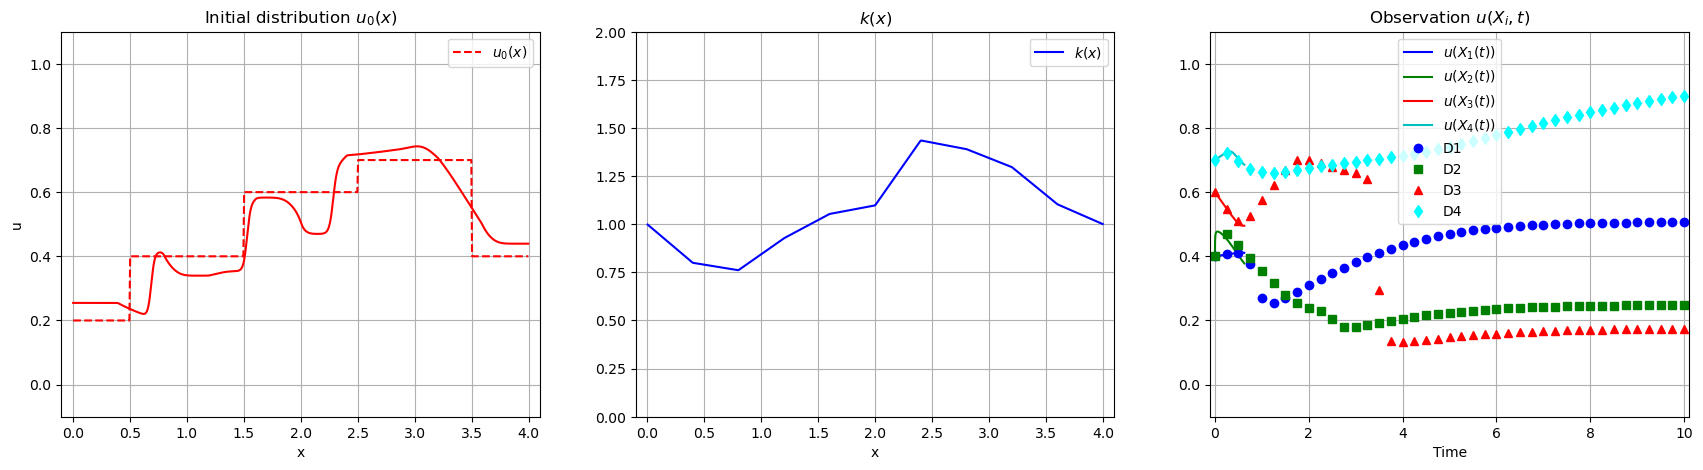

Timestep: 200, time = 0.625


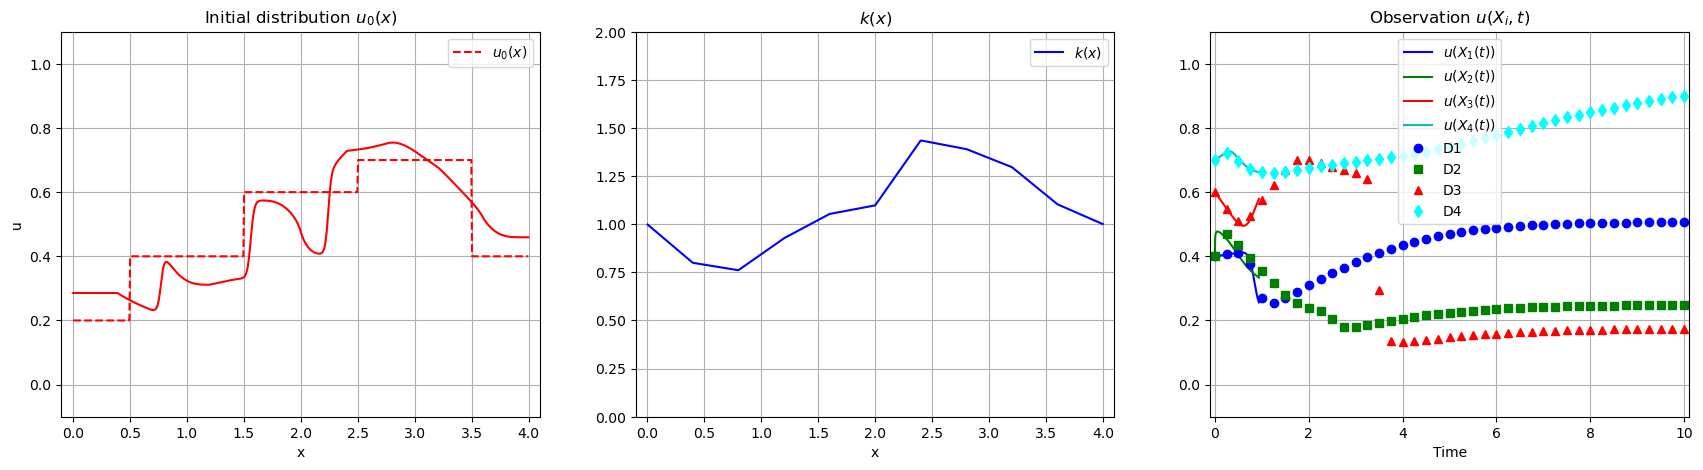

Timestep: 300, time = 0.9375


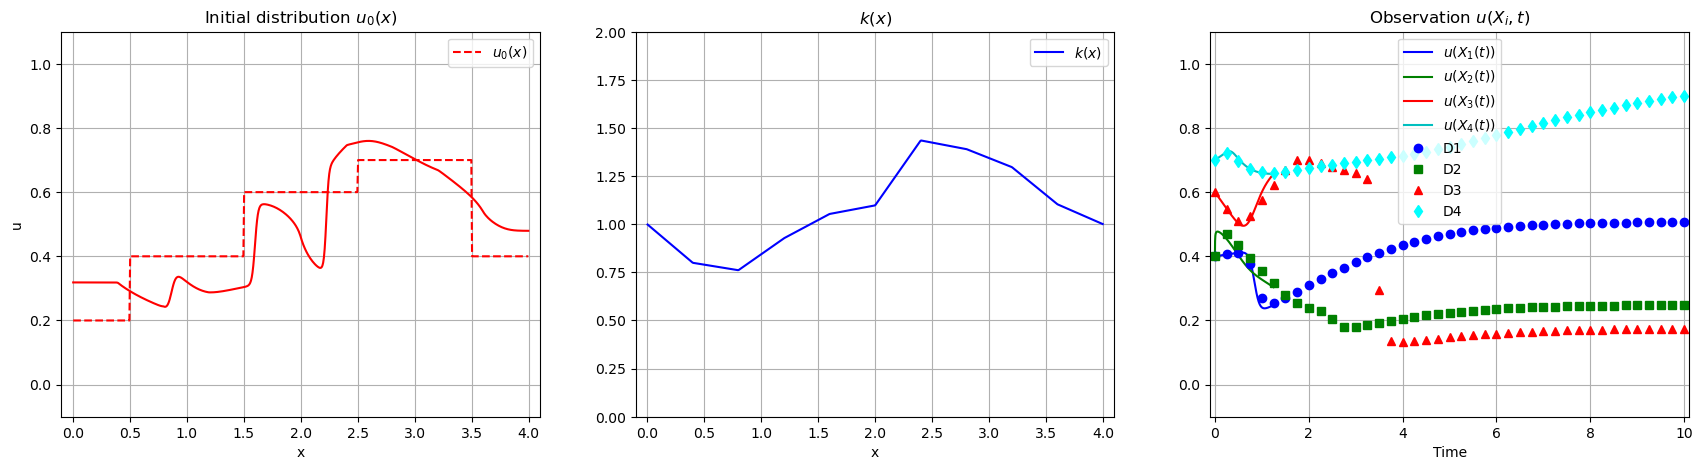

Timestep: 400, time = 1.25


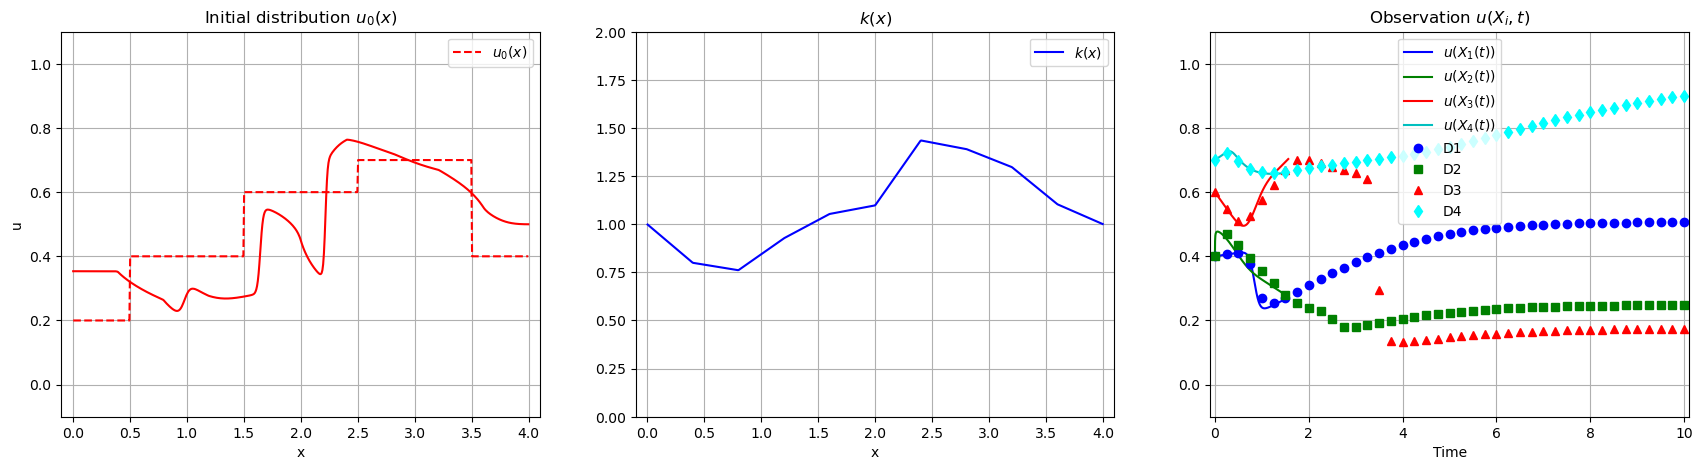

Timestep: 500, time = 1.5625


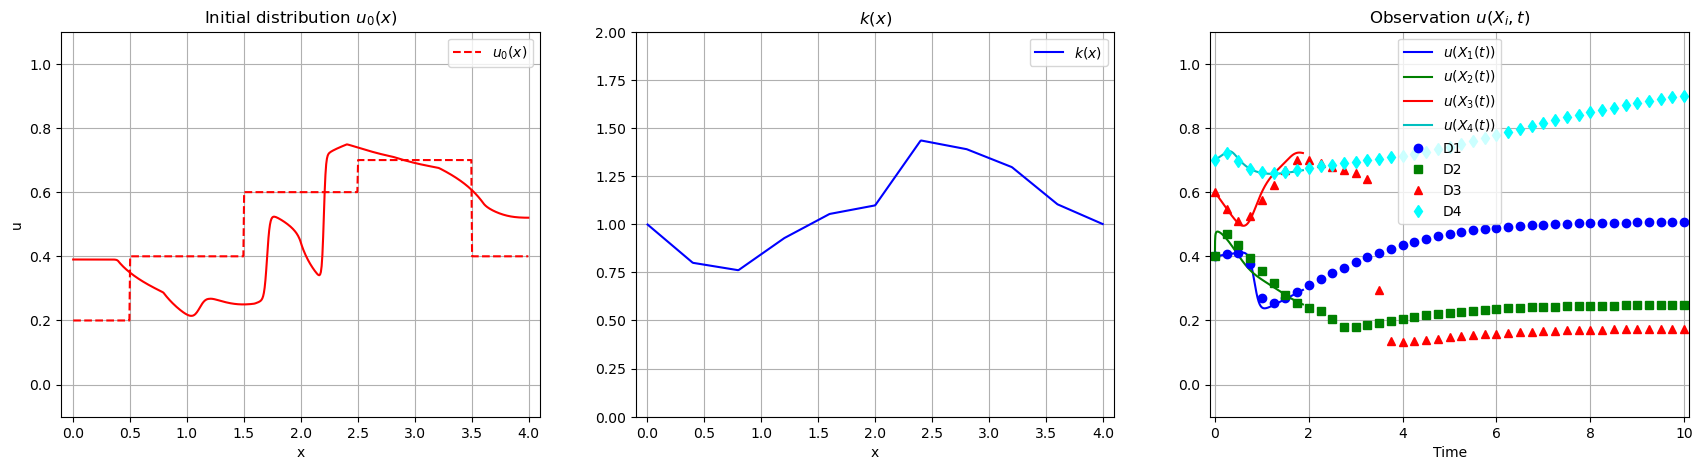

Timestep: 600, time = 1.875


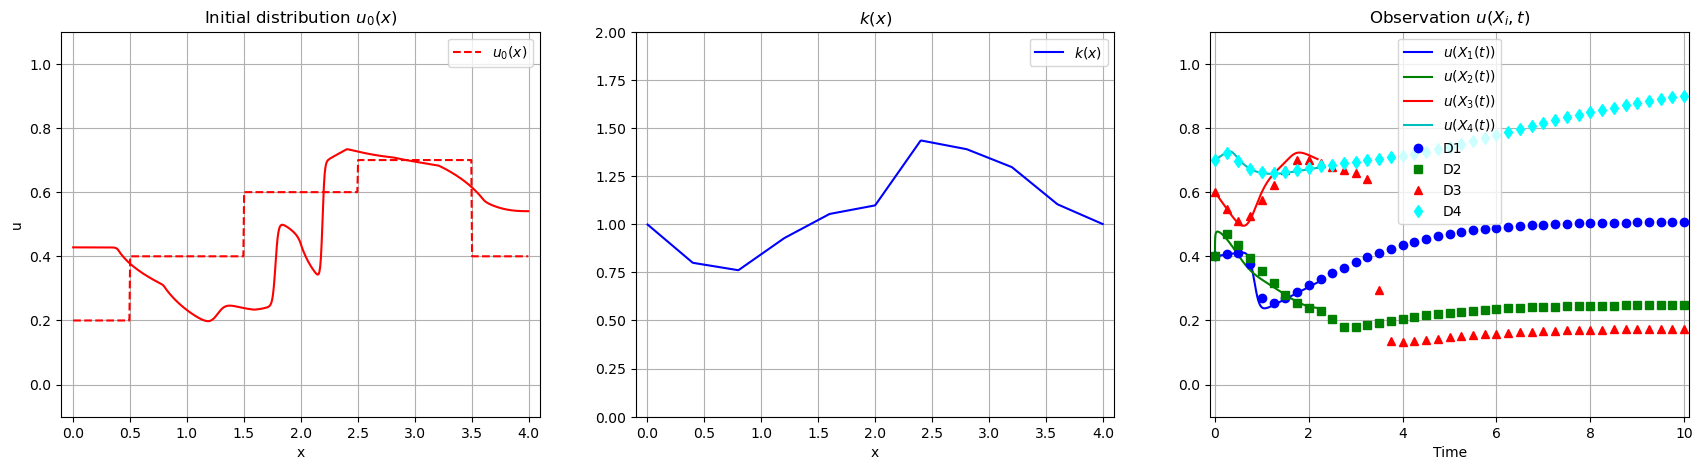

Timestep: 700, time = 2.1875


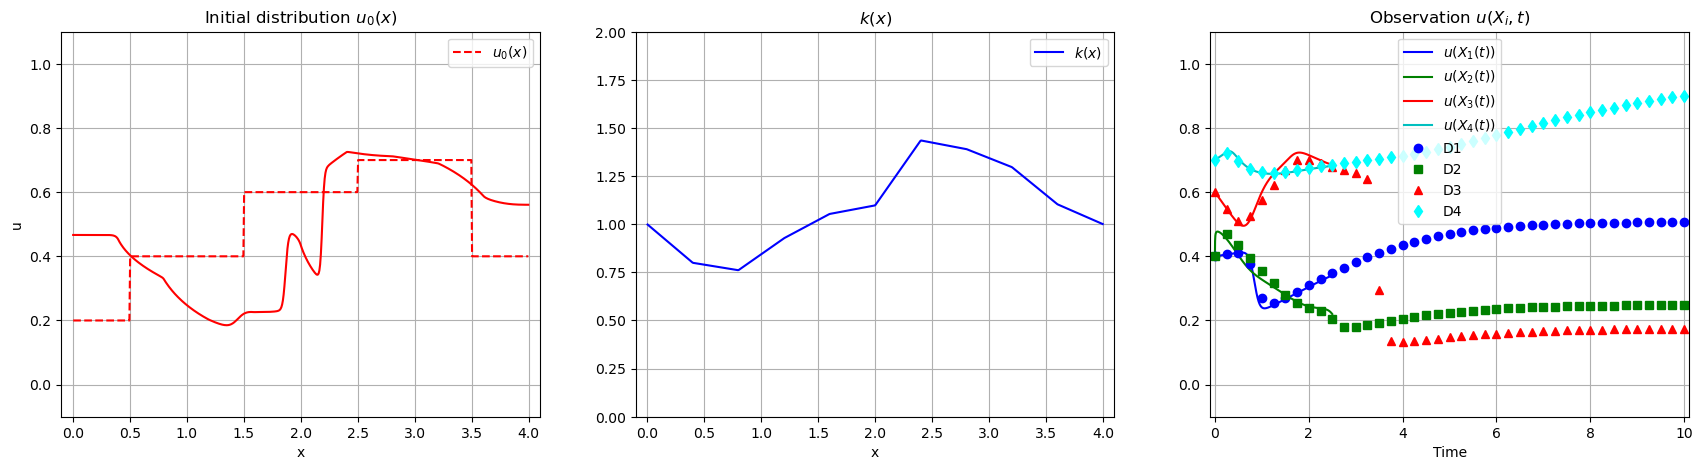

Timestep: 800, time = 2.5


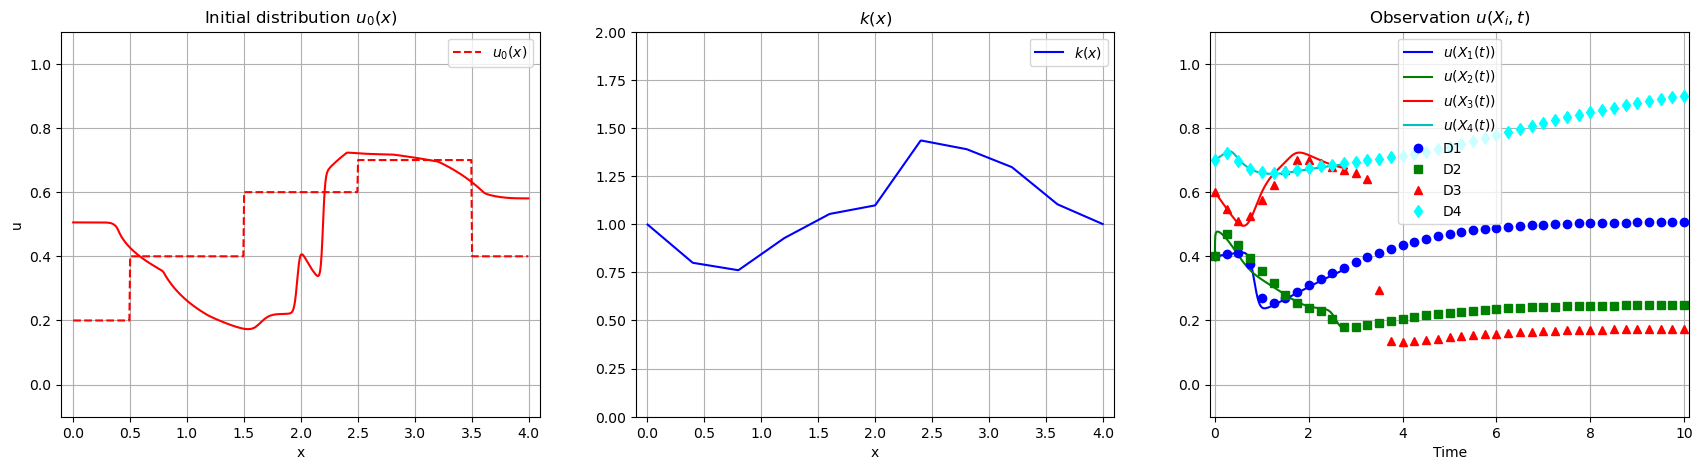

Timestep: 900, time = 2.8125


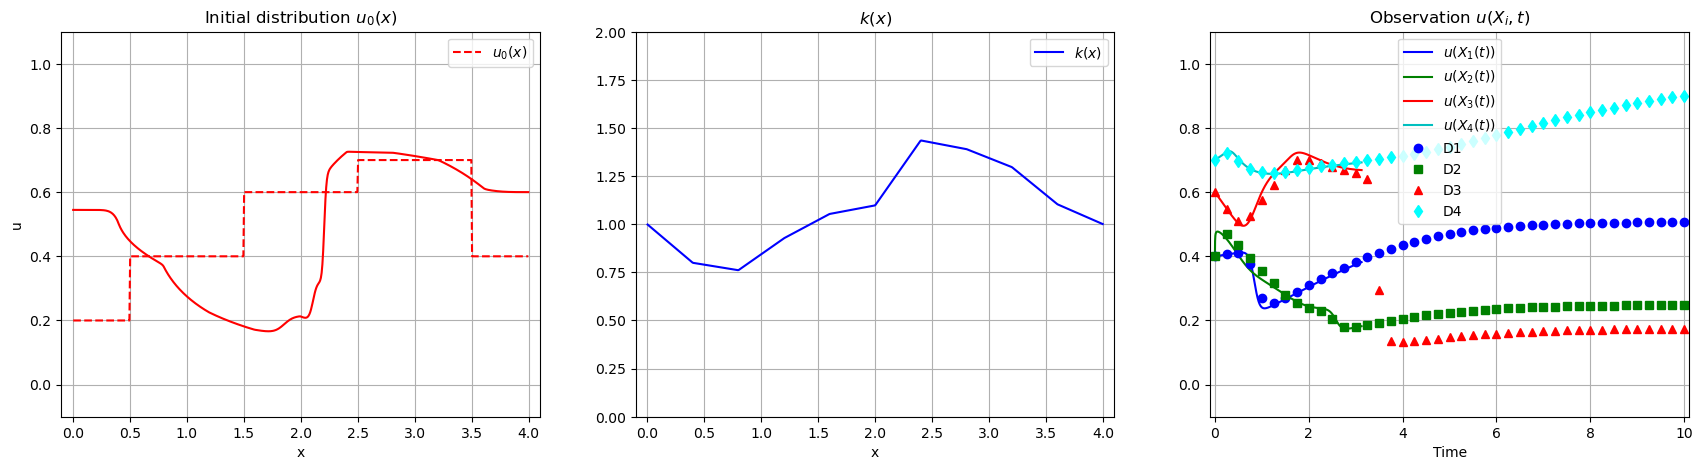

Timestep: 1000, time = 3.125


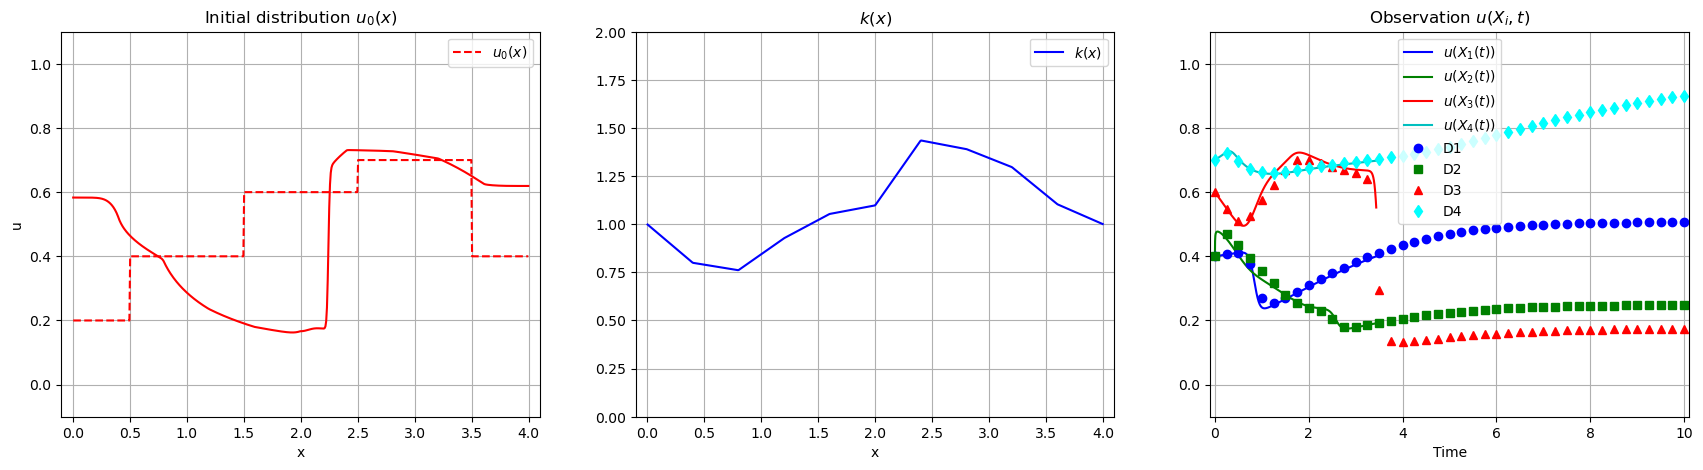

Timestep: 1100, time = 3.4375


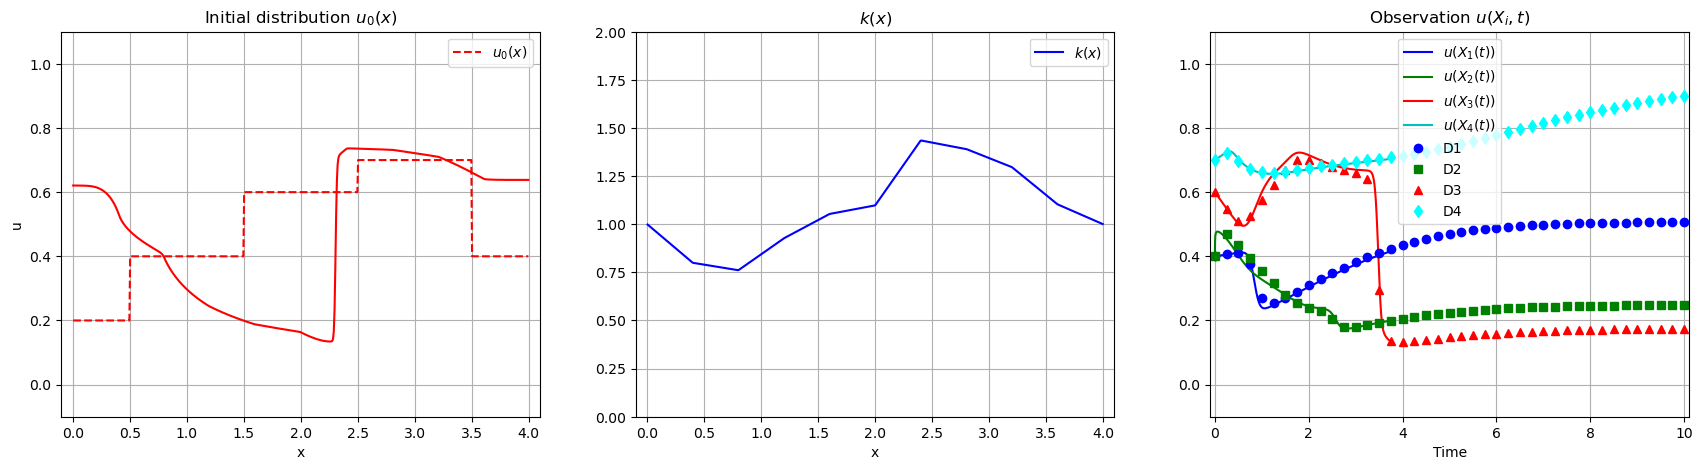

Timestep: 1200, time = 3.75


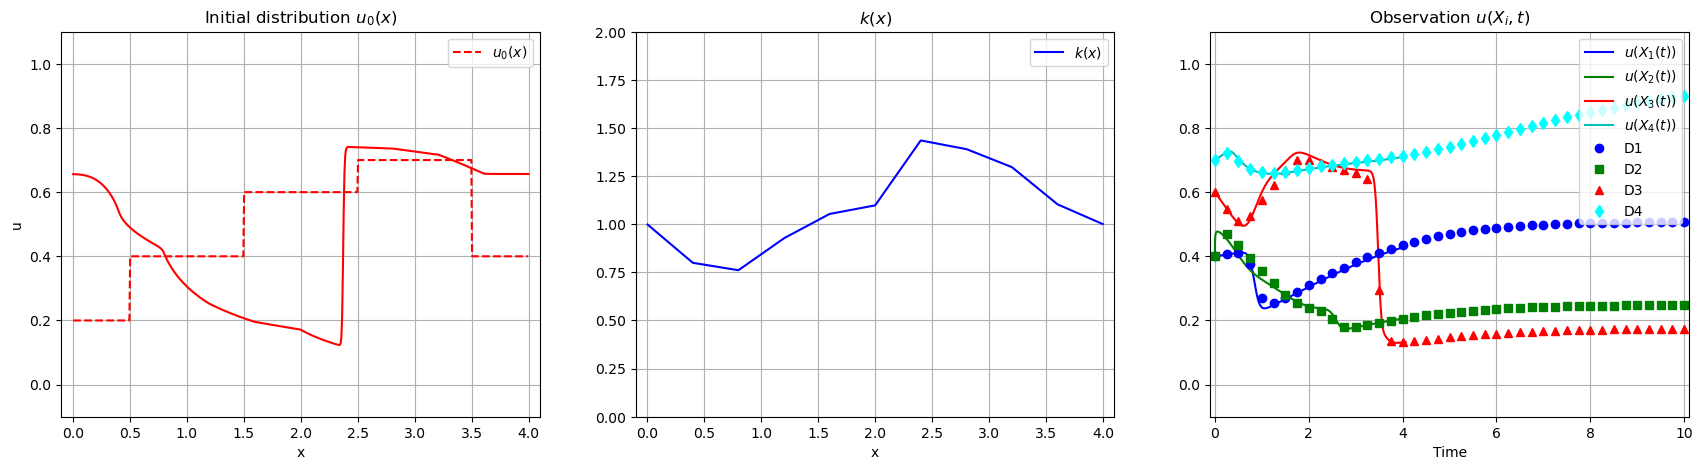

Timestep: 1300, time = 4.0625


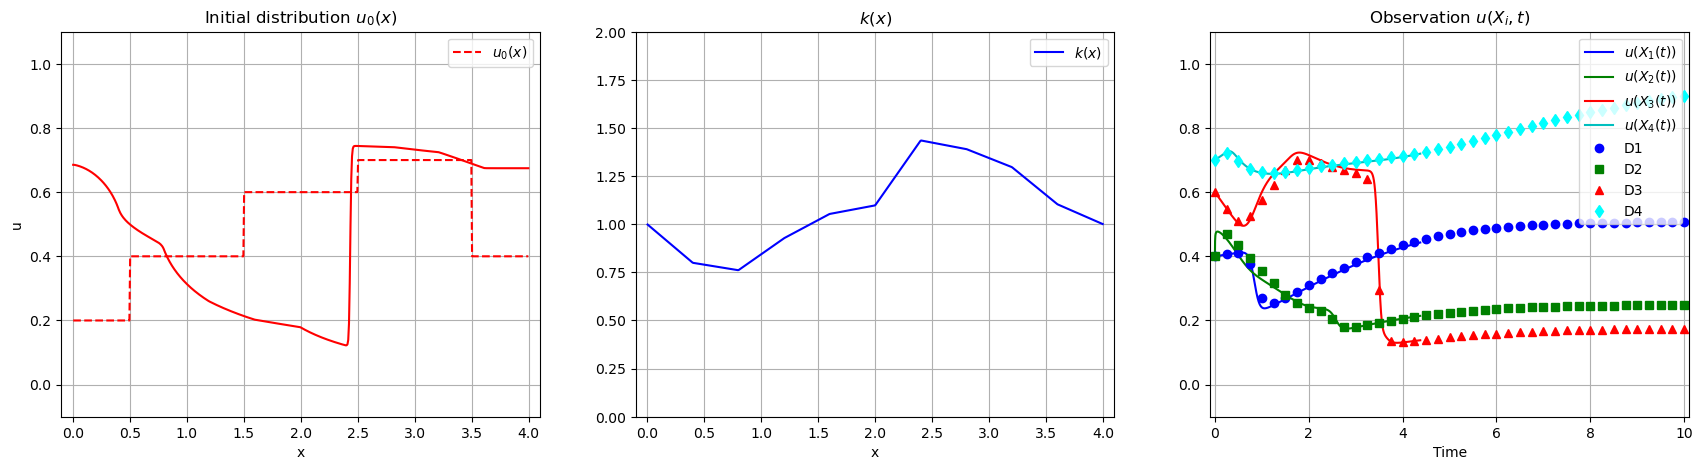

Timestep: 1400, time = 4.375


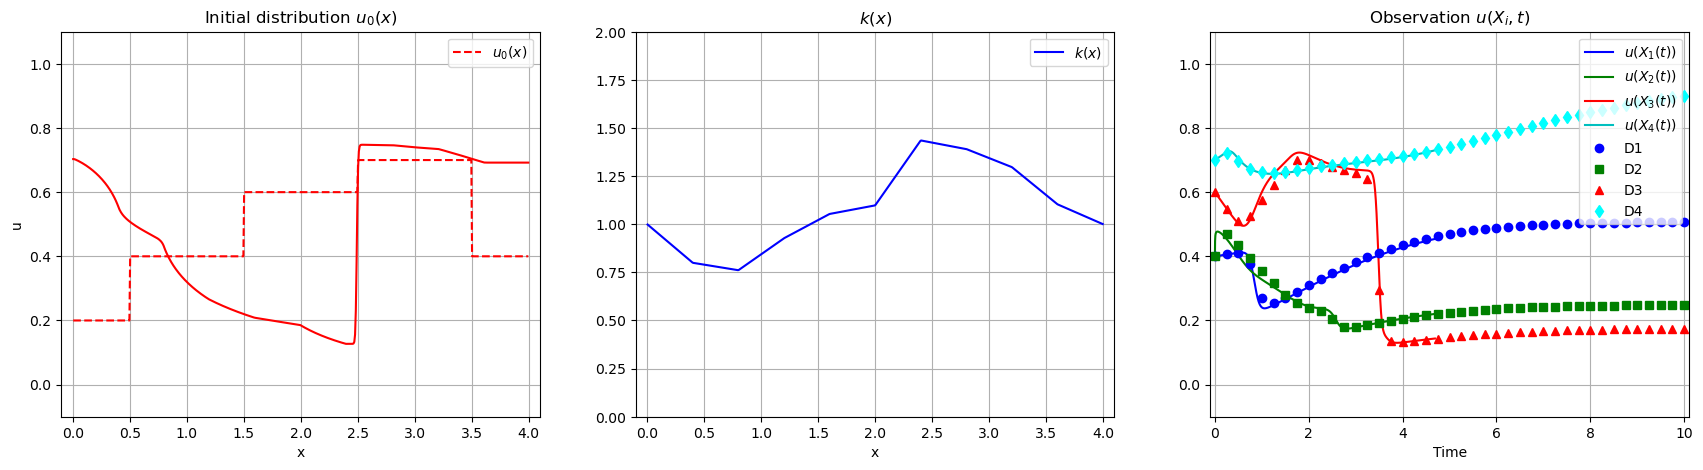

Timestep: 1500, time = 4.6875


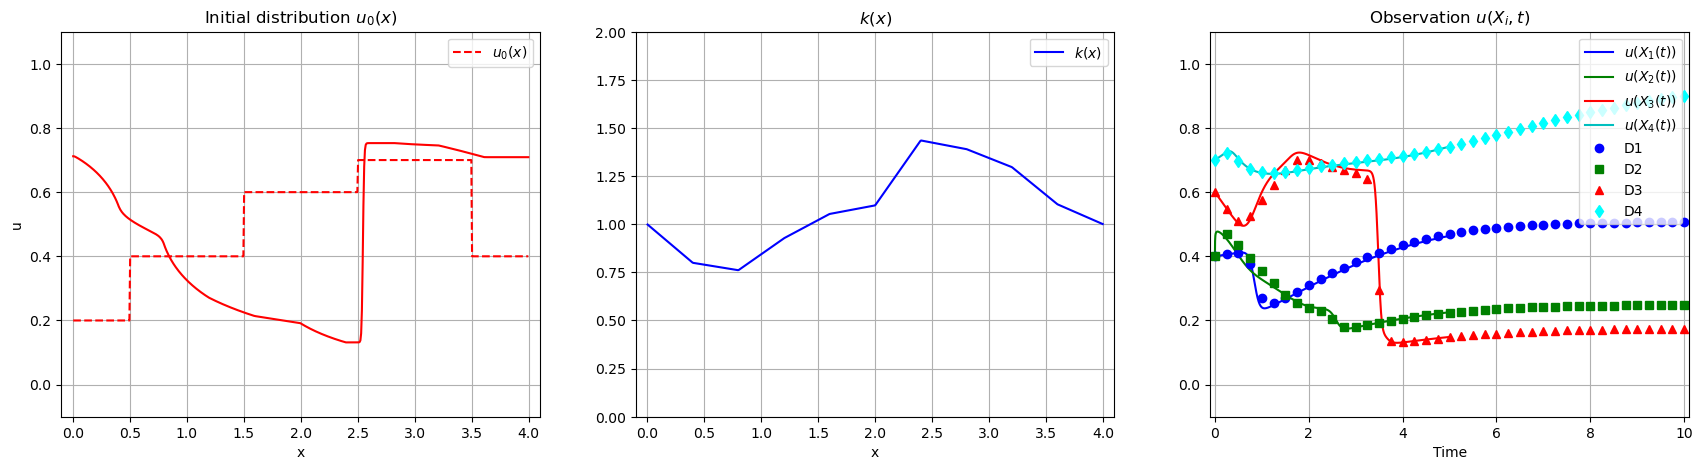

Timestep: 1600, time = 5.0


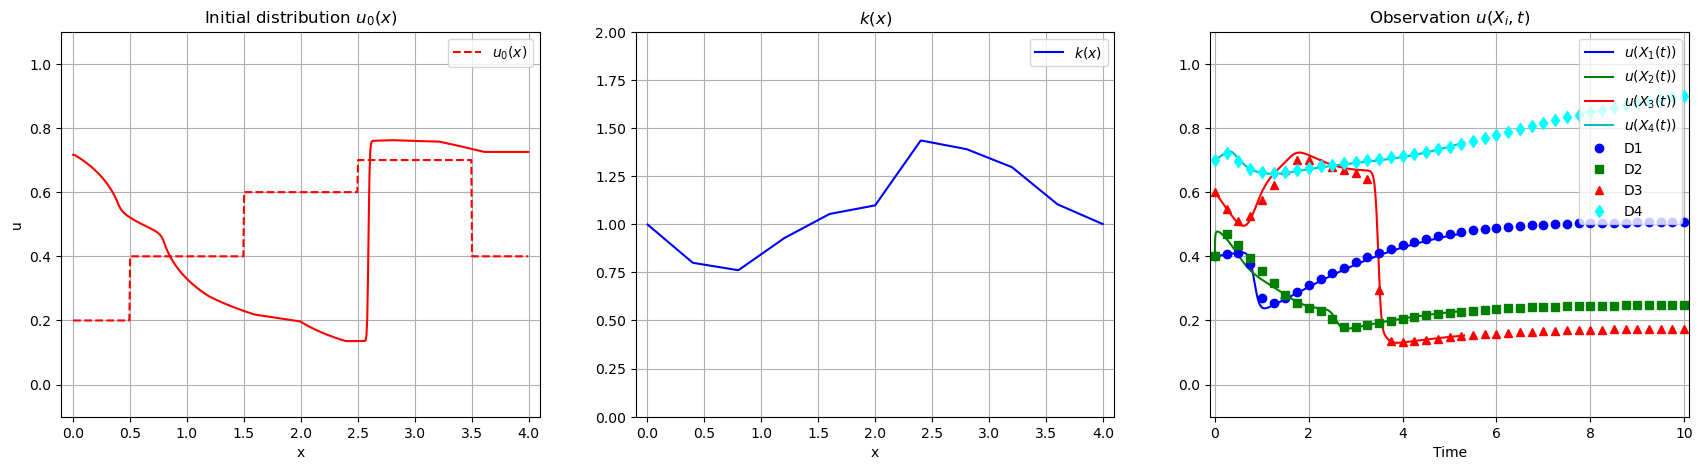

Timestep: 1700, time = 5.3125


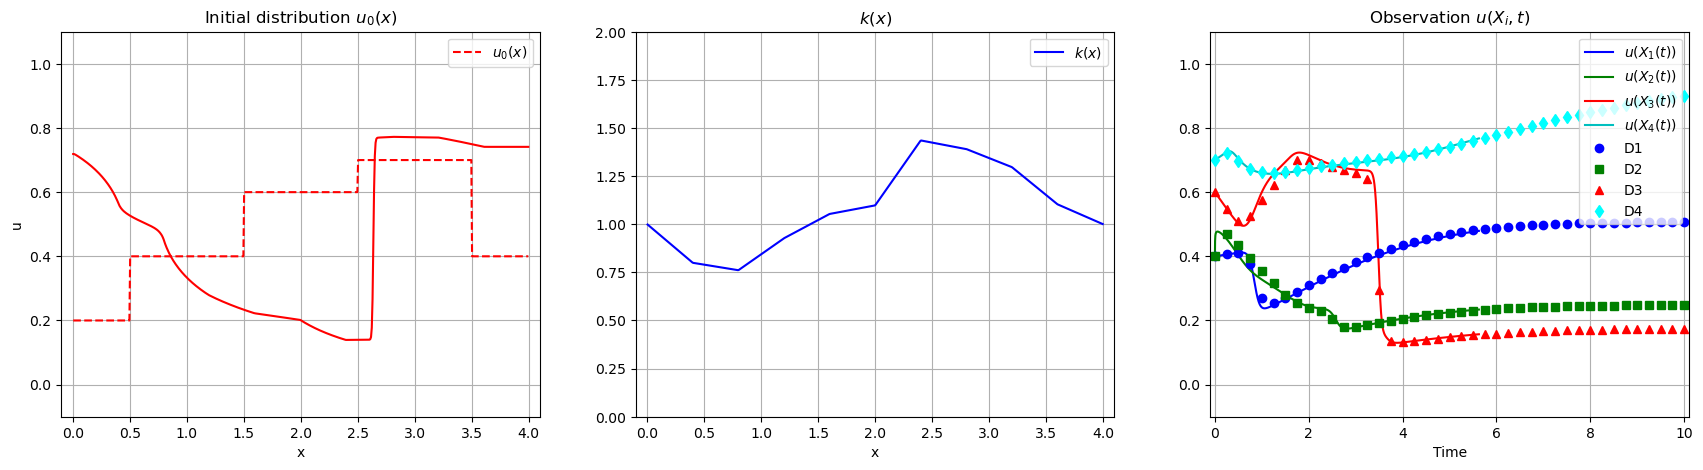

Timestep: 1800, time = 5.625


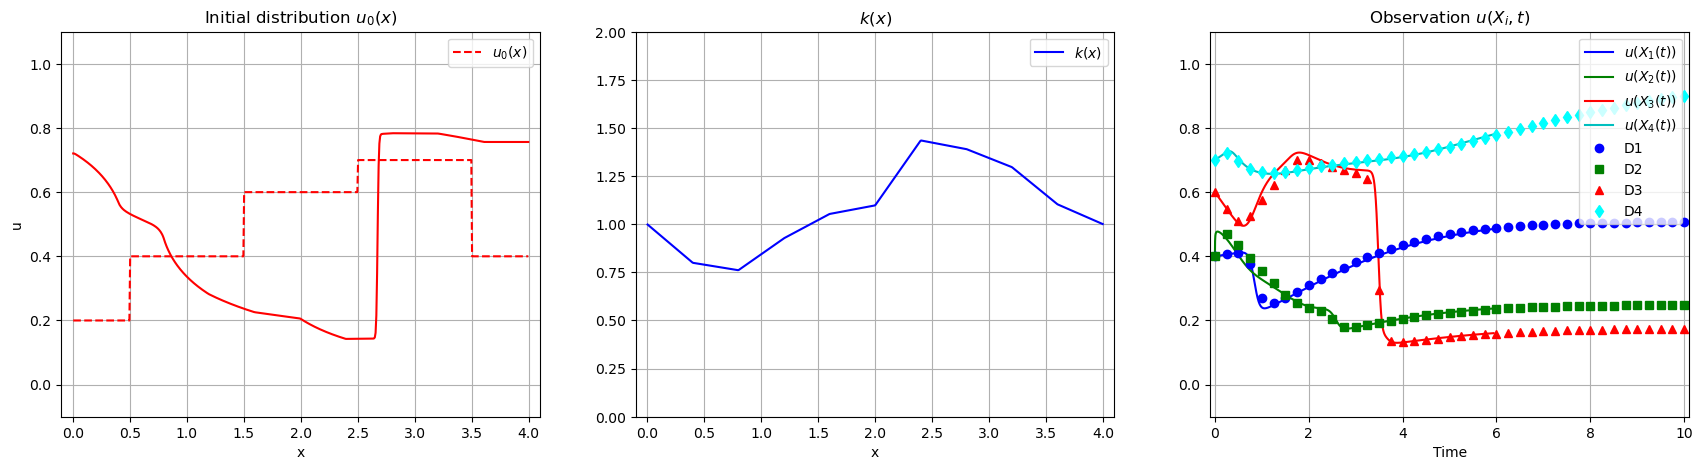

Timestep: 1900, time = 5.9375


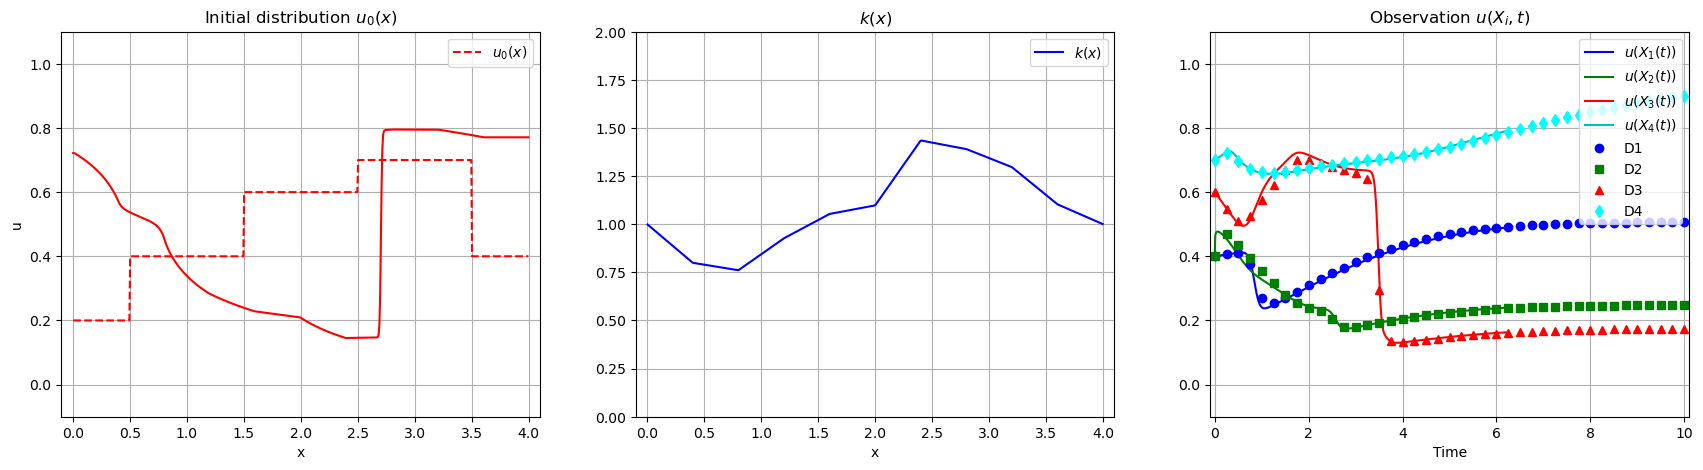

Timestep: 2000, time = 6.25


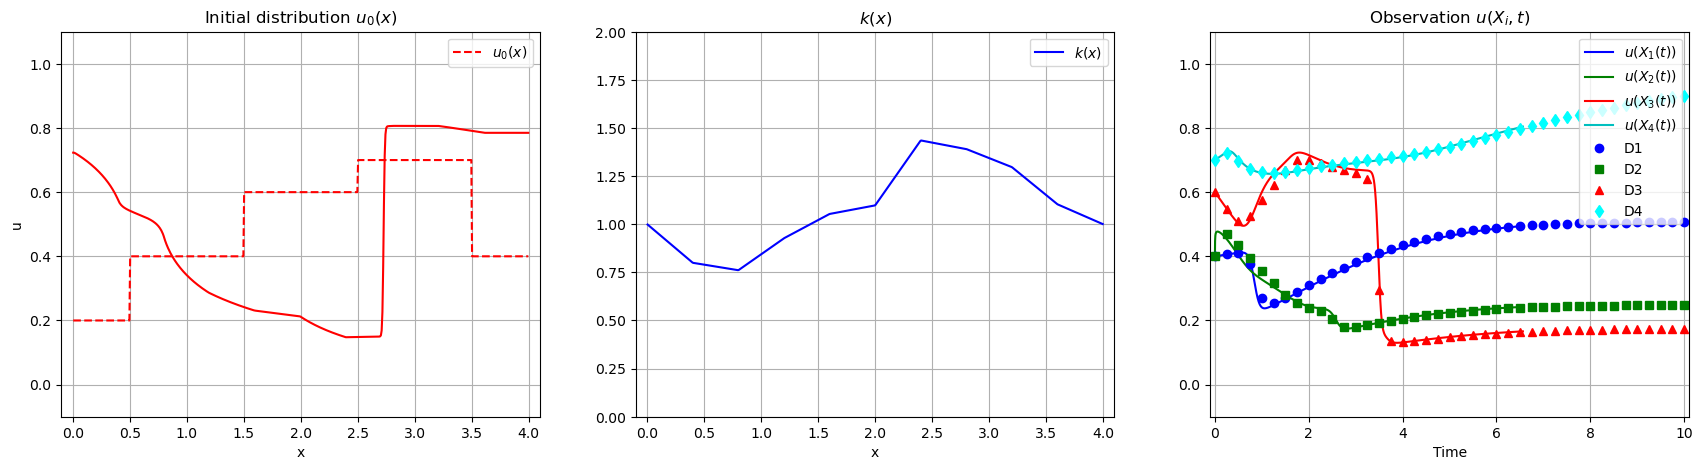

Timestep: 2100, time = 6.5625


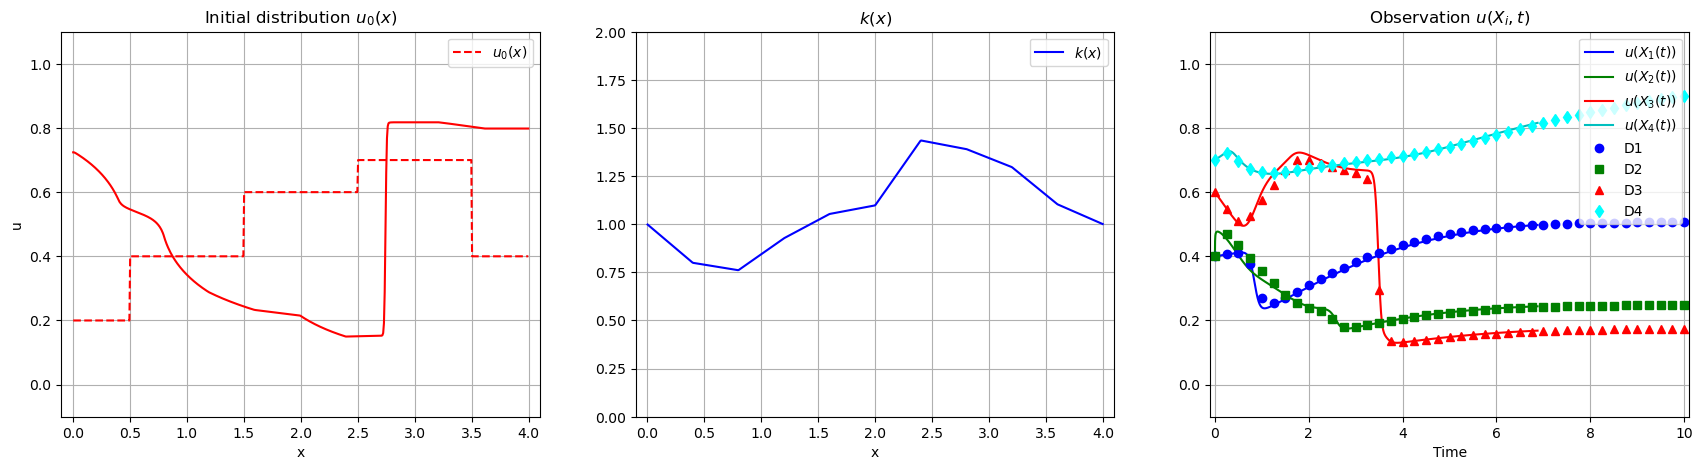

Timestep: 2200, time = 6.875


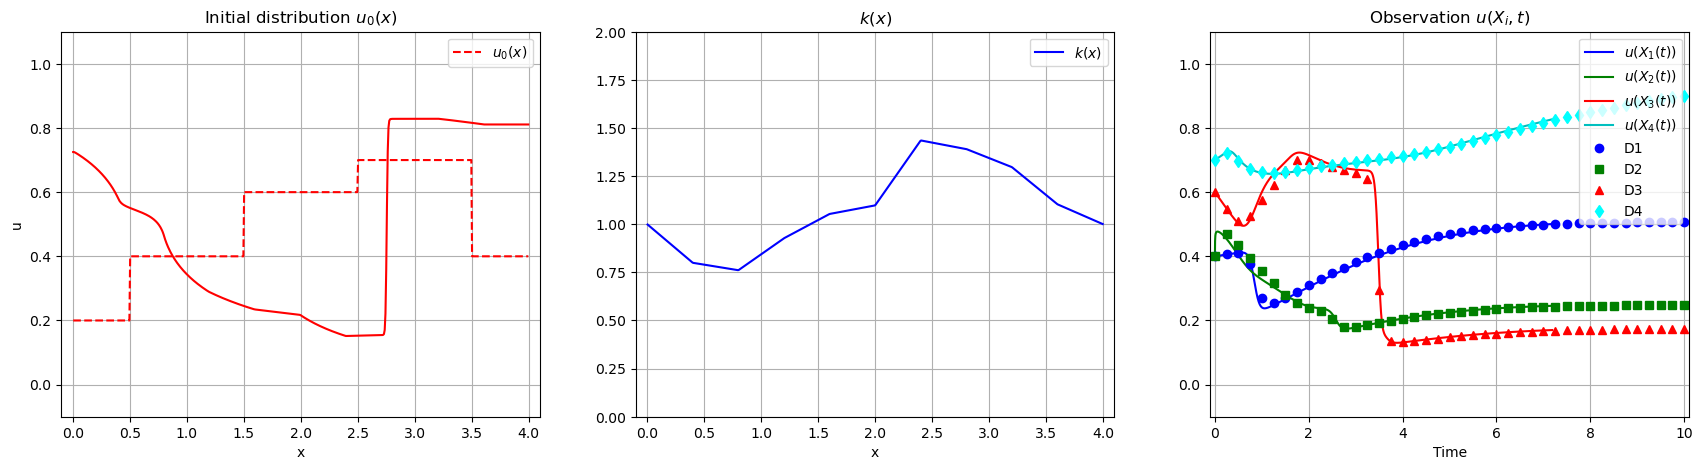

Timestep: 2300, time = 7.1875


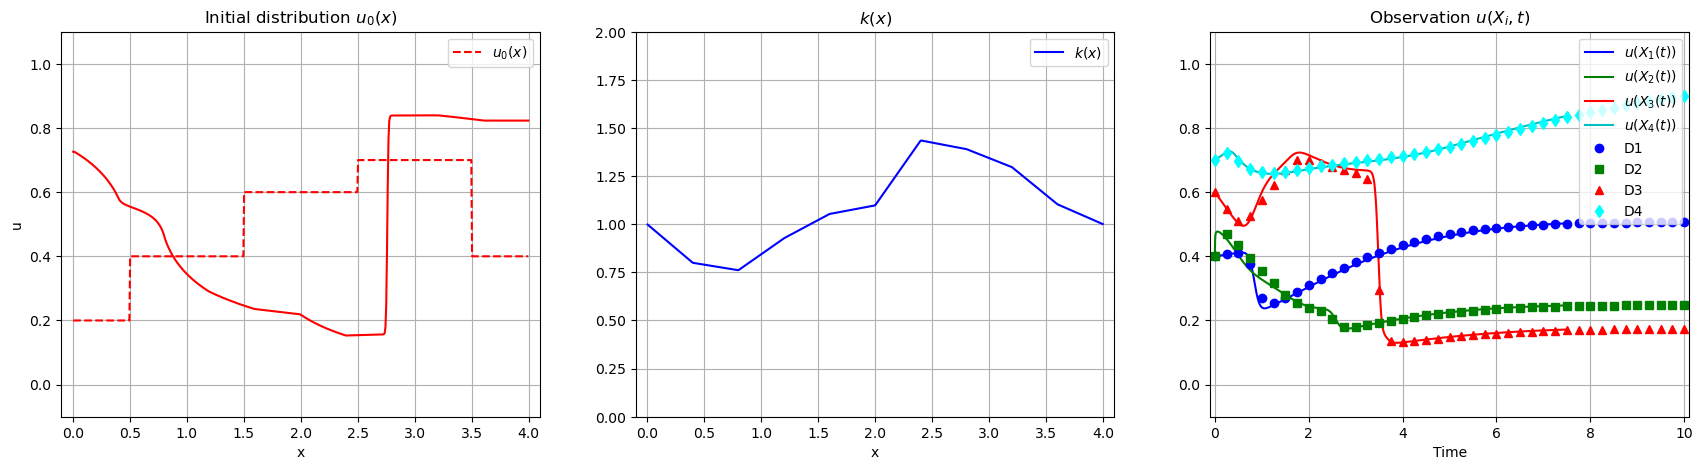

Timestep: 2400, time = 7.5


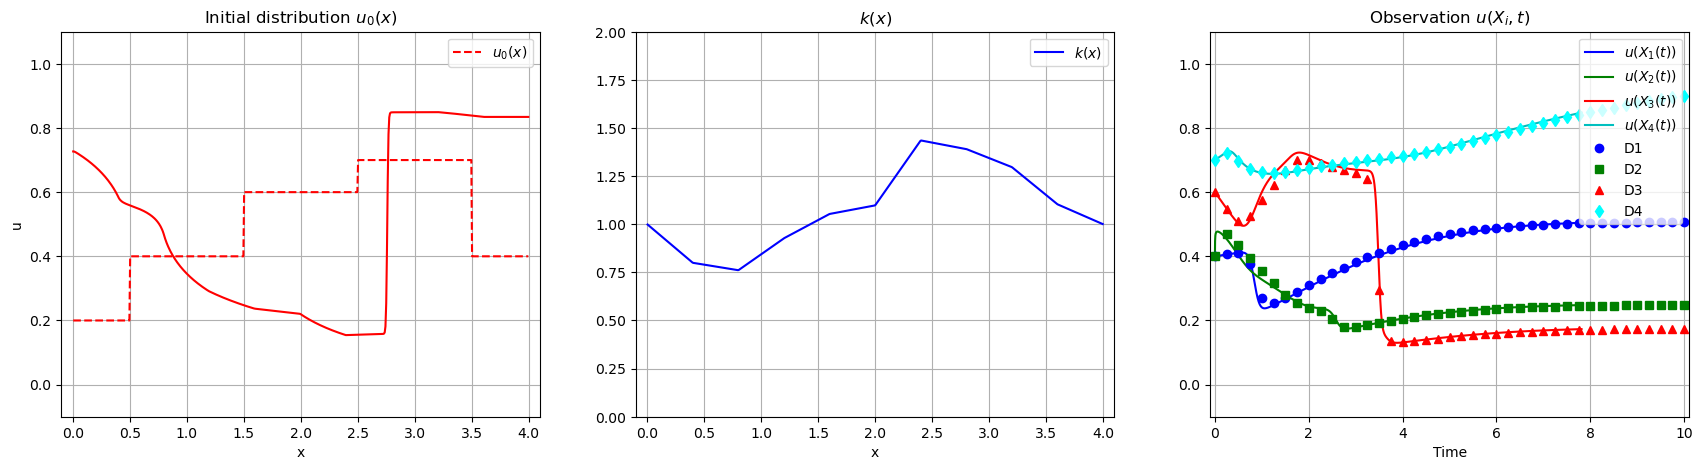

Timestep: 2500, time = 7.8125


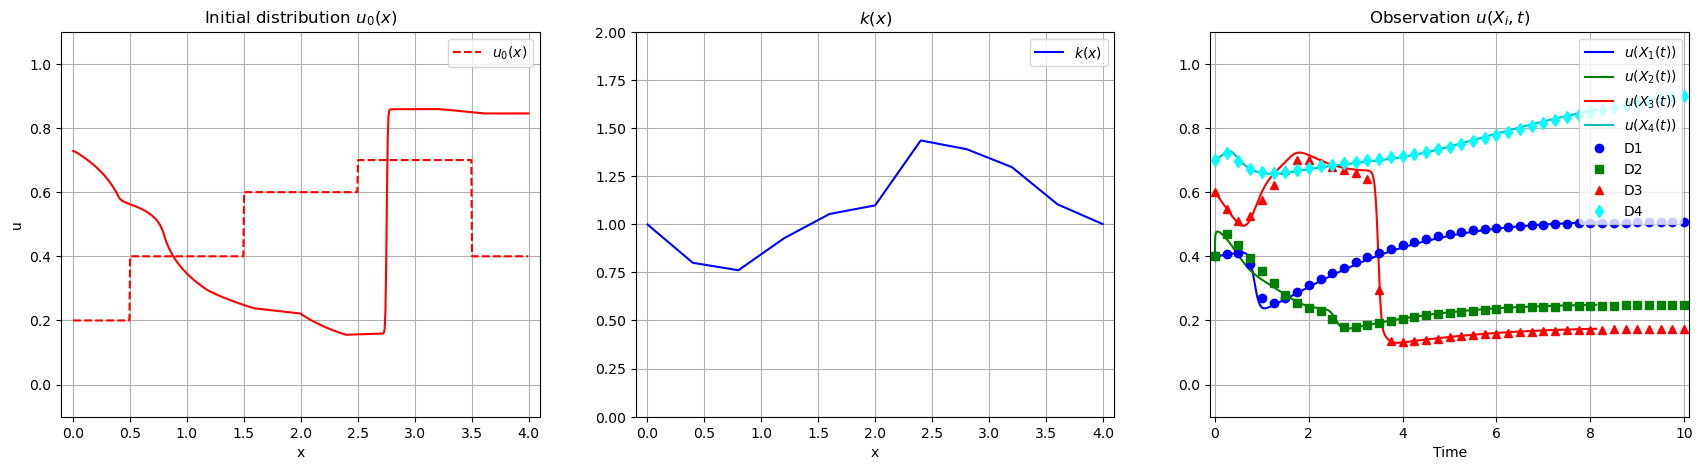

Timestep: 2600, time = 8.125


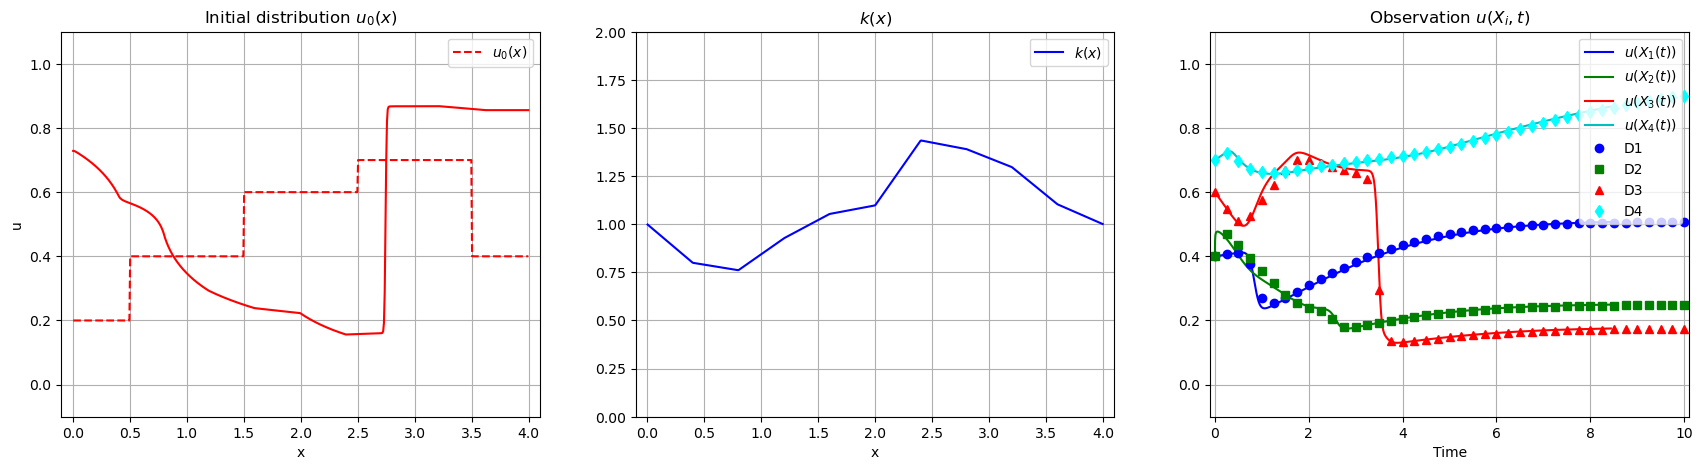

Timestep: 2700, time = 8.4375


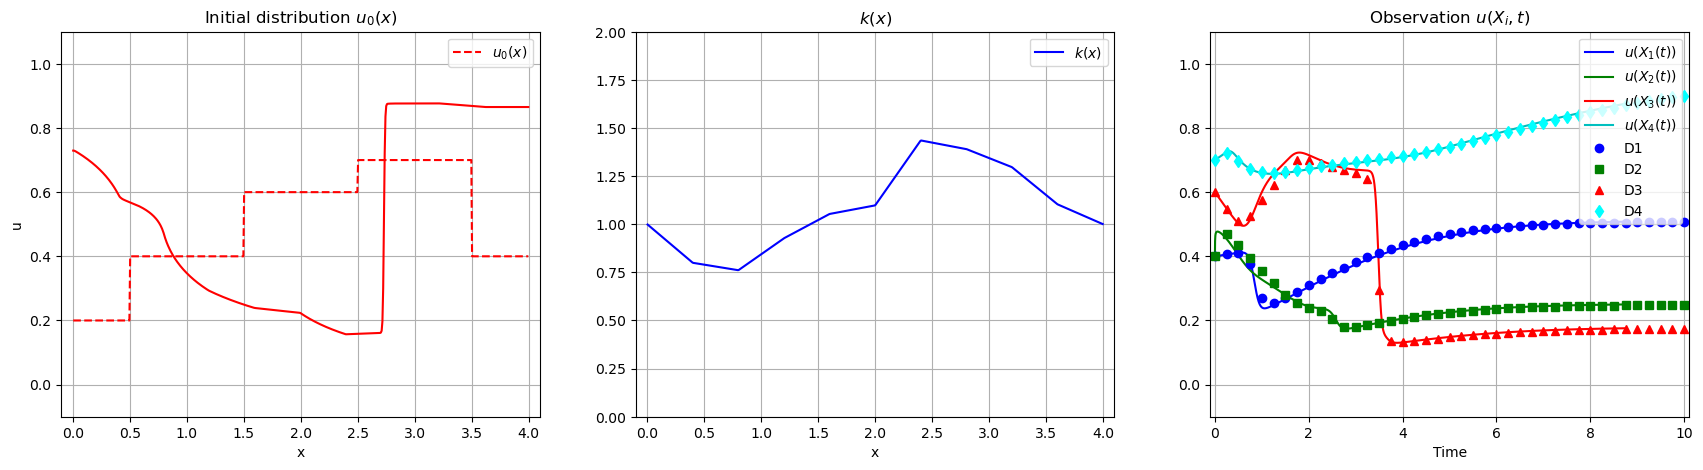

Timestep: 2800, time = 8.75


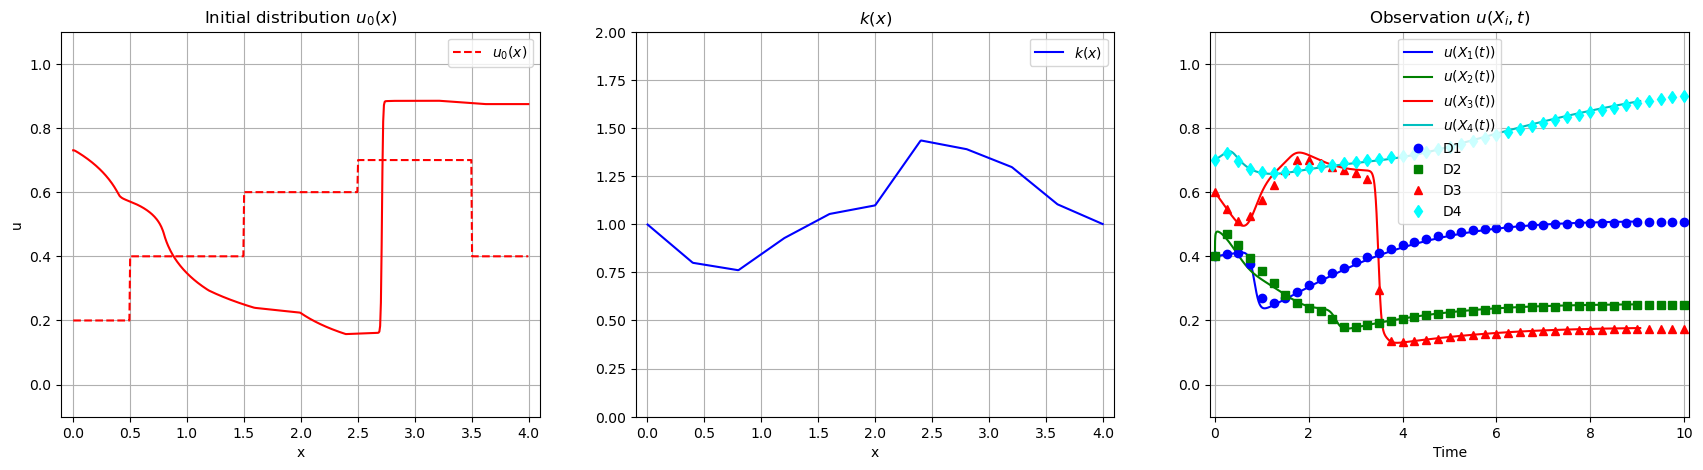

Timestep: 2900, time = 9.0625


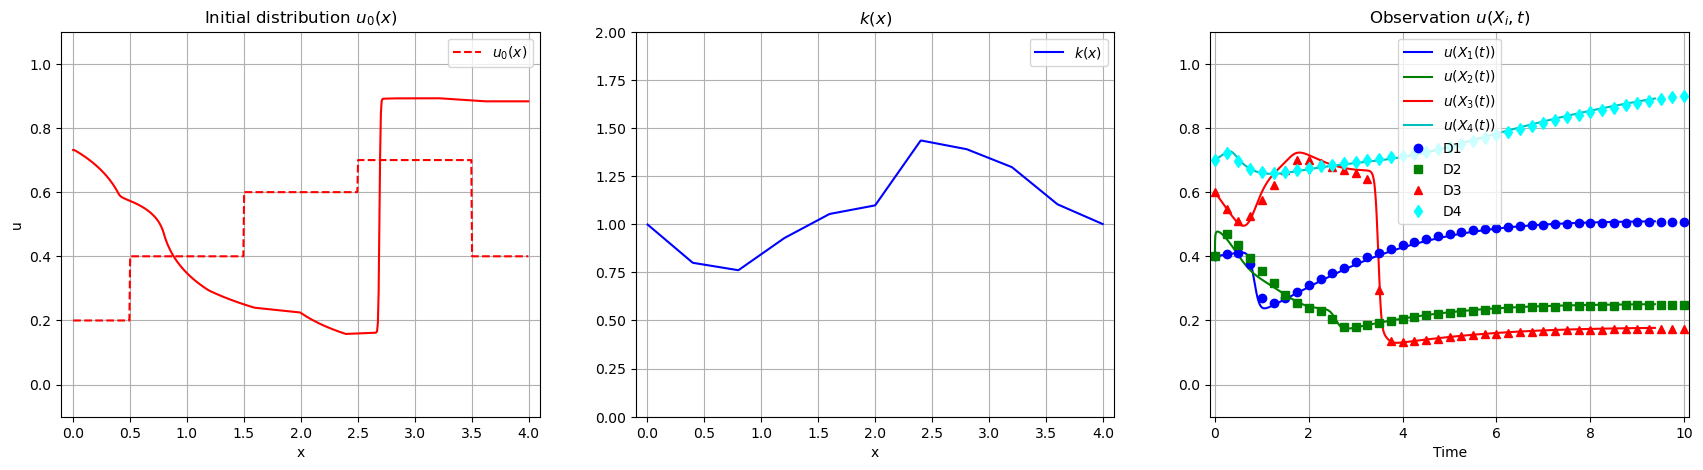

Timestep: 3000, time = 9.375


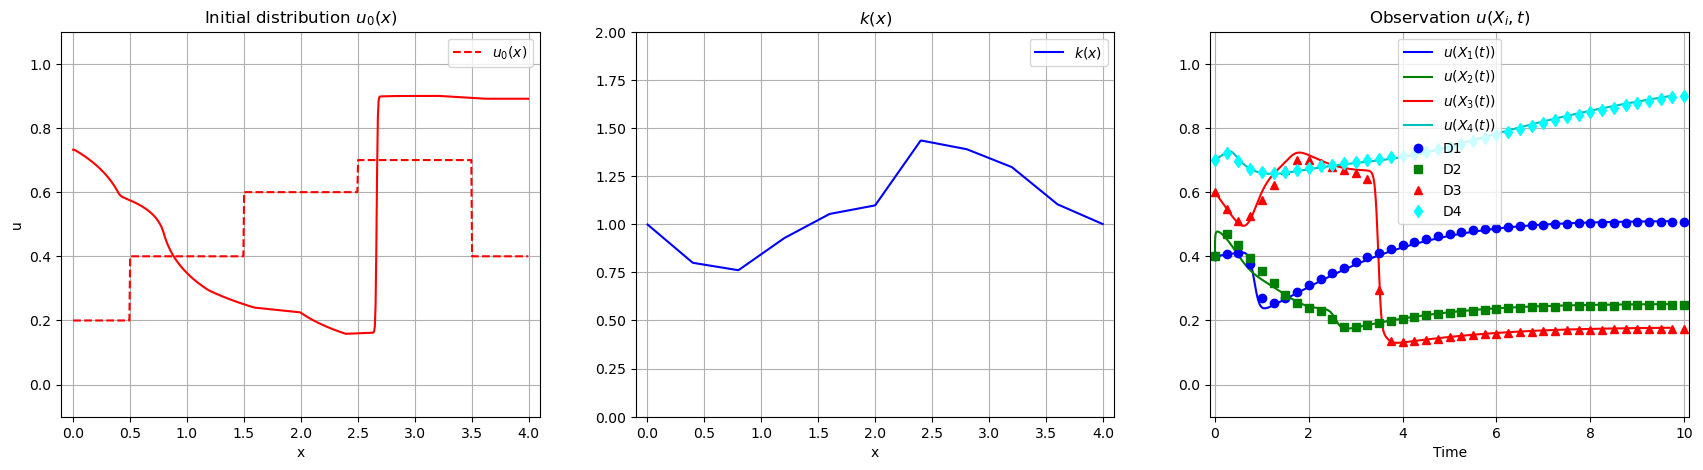

Timestep: 3100, time = 9.6875


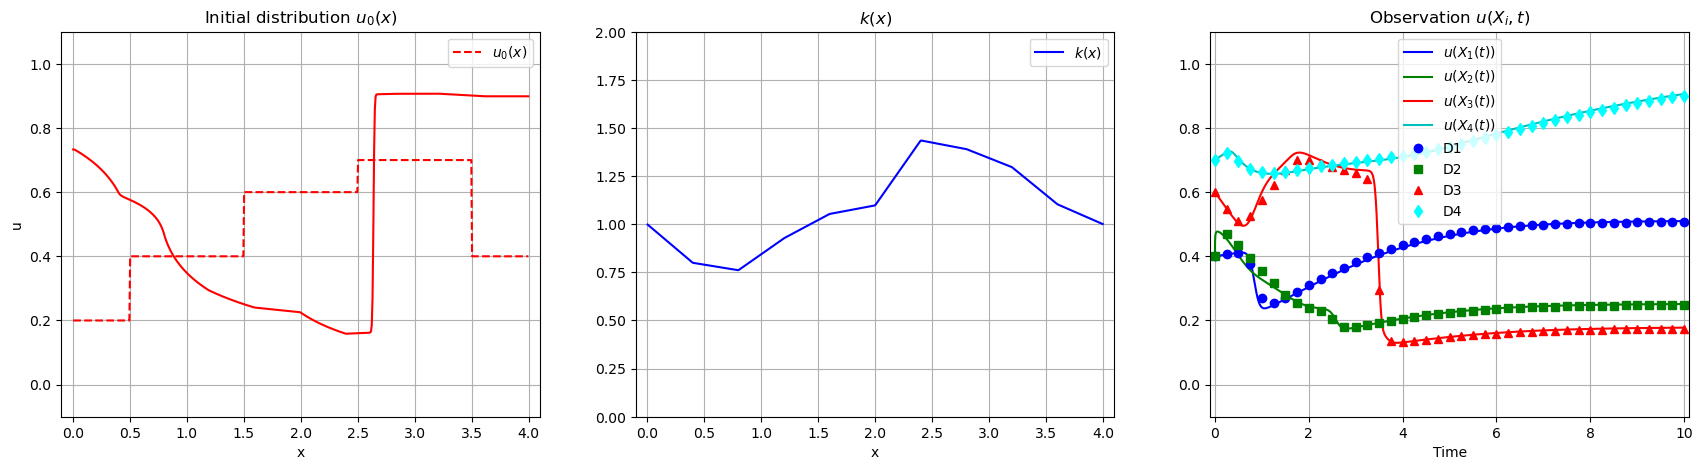

Timestep: 3200, time = 10.0
Computation of numerical solution finished


In [8]:
# Final time
T = 10

# Number of grid cells
M = 600

# Length of domain
aa = 0
bb = 4
Ldom = bb - aa

# Delta
dx = Ldom / M

# Define cell centers
x = np.arange(aa + 0.5 * dx, bb, dx)  # cell centers
xh = np.arange(aa, bb + dx, dx)         # interfaces

# Define number of time steps
NTime = 100 * 2 * 2 * 2 * 2 * 2  # e.g., 3200 time steps

# Time step dt
dt = T / NTime

# Provide positions of observation points X1, X2, X3, X4
X_position = [0.75, 1.5, 2.25, 3.25]

# Get the index corresponding to each observation point (assuming x is sorted)
s = [np.sum(x <= pos) - 1 for pos in X_position]

# Time discretization for the numerical scheme
t_step = np.linspace(0, T, NTime + 1)
u_X = [np.zeros(len(t_step)) for _ in range(4)]

# Time discretization associated with observation points (41 time instants)
t_obspoint = np.linspace(0, T, 41)
u_X_out = [np.zeros(len(t_obspoint)) for _ in range(4)]

# Terrain function
Mr = 9  # number of unknown interior k-values

# Discrete points x_k that define k(x)
x_k = np.array([0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0])

# Generate initial k(x) values: interior points are random normals, boundaries fixed to 1.
mu = 1
sigma = 0.25
#mcmc_start = True
mcmc_start = False

if mcmc_start:
    #####################################
    #  Choice 1:  generate theta^(0)     #
    #####################################
    print("Initial guess of k(x)")
    kk_x = np.random.normal(loc=mu, scale=sigma, size=Mr)
    kk_x[kk_x < 0.95] = 0.95
    kk_x[kk_x > 1.3] = 1.3
    kkx_u = kk_x
else:
    #######################################
    #  Choice 2:  start with theta^(k)      #
    #######################################
    with np.load(r"C:\Users\User\OneDrive\Pulpit\MOD600\Project_3\Task 2\data\mcmc_u0X2_sample100_it1_student_Mars27_2.npz") as data_kx:
        kkx_u = data_kx["theta_1"]

# Create the y_k vector with padding ones at the beginning and end
y_k = np.concatenate(([1], kkx_u, [1]))

# Define the flux function f(u)
def fun_flux(u):
    return u * (1 - u)

v = np.arange(0, 1.0 + 0.01, 0.01)
flux_f = fun_flux(v)

# Define the initial data function
def fun_initial(x):
    u_init = np.zeros_like(x)
    u_init[x <= 0.5] = 0.2
    u_init[(x > 0.5) & (x <= 1.5)] = 0.4
    u_init[(x > 1.5) & (x <= 2.5)] = 0.6
    u_init[(x > 2.5) & (x <= 3.5)] = 0.7
    u_init[x > 3.5] = 0.4
    return u_init

u0 = fun_initial(x)

# Plot the initial setup in 4 subplots
fig, axs = plt.subplots(1, 3, figsize=(21, 5))

axs[0].plot(x, u0, '--r')
axs[0].set_title("Initial distribution $u_0(x)$")
axs[0].set_ylabel("u")
axs[0].set_xlabel("x")
axs[0].axis([aa - 0.1, bb + 0.1, -0.1, 1.1])
axs[0].legend(['$u_0(x)$'])
axs[0].grid(True)

axs[1].plot(x, np.interp(x, x_k, y_k), '-b')
axs[1].set_title("$k(x)$")
axs[1].set_xlabel("x")
axs[1].axis([aa - 0.1, bb + 0.1, 0, 2])
axs[1].legend(['$k(x)$'])
axs[1].grid(True)

# Initialize observation data at t=0
for ind in range(4):
    u_X[ind][0] = u0[s[ind]]

# For the observation plot, plot the initial observation points
axs[2].plot(t_step[:1], [u_X[0][0]], '-ob')
axs[2].plot(t_step[:1], [u_X[1][0]], '-og')
axs[2].plot(t_step[:1], [u_X[2][0]], '-or')
axs[2].plot(t_step[:1], [u_X[3][0]], '-oc')
axs[2].plot(time_obs, du_true_x1[:, 0], linestyle='None', marker='o', color='blue', label='D1')
axs[2].plot(time_obs, du_true_x2[:, 0], linestyle='None', marker='s', color='green', label='D2')
axs[2].plot(time_obs, du_true_x3[:, 0], linestyle='None', marker='^', color='red', label='D3')
axs[2].plot(time_obs, du_true_x4[:, 0], linestyle='None', marker='d', color='cyan', label='D4')
axs[2].set_title("Observation $u(X_i,t)$")
axs[2].set_xlabel("Time")
axs[2].axis([-0.1, T + 0.1, -0.1, 1.1])
axs[2].legend(['$u(X_1(t))$', '$u(X_2(t))$', '$u(X_3(t))$', '$u(X_4(t))$'])
axs[2].grid(True)

plt.show()

# Define index arrays for the scheme
J = np.arange(0, M)
J1 = np.arange(1, M-1)
J2 = np.arange(0, M-1)

# Define vectors for the new and old time steps
u = np.zeros(M)
u_old = np.copy(u0)

# CFL parameter
lambda_1 = dt/dx

def check_CFLconstraint(value):
    if value > 1:
        print("CFL constraint not satisfied. Stopping the problem")
        sys.exit()

MaxfP = 1
CFL_number = lambda_1 * MaxfP * np.max(y_k)
check_CFLconstraint(CFL_number)

# Time-stepping loop
for j in range(NTime):
    t_step[j+1] = (j+1)*dt

    # Compute flux at cell centers
    Flux = fun_flux(u_old)
    
    # Compute flux at interfaces using a Rusanov-like average
    F_half = np.zeros(M-1)
    F_half[J2] = 0.5 * (Flux[J2] + Flux[J2+1]) - 0.5 * MaxfP * (u_old[J2+1] - u_old[J2])
    
    # Interpolate k(x) at interfaces
    k_half = np.zeros(M-1)
    k_half[J2] = np.interp(xh[J2 + 1], x_k, y_k)
    
    # Update interior cells using a finite difference scheme
    u[J1] = u_old[J1] - lambda_1 * (k_half[J1] * F_half[J1] - k_half[J1 - 1] * F_half[J1 - 1])
    
    # Apply boundary conditions
    u[0] = u[1]
    u[-1] = u[-2]
    
    # Record observations at the specified indices
    for ind in range(4):
        u_X[ind][j+1] = u[s[ind]]
    
    # Plot every 100 time steps
    if (j+1) % 100 == 0:
        fig, axs = plt.subplots(1, 3, figsize=(21, 5))
        
        axs[0].plot(x, u0, '--r')
        axs[0].plot(x, u, '-r', label='$u(x,t)$')
        axs[0].set_title("Initial distribution $u_0(x)$")
        axs[0].set_ylabel("u")
        axs[0].set_xlabel("x")
        axs[0].axis([aa - 0.1, bb + 0.1, -0.1, 1.1])
        axs[0].legend(['$u_0(x)$'])
        axs[0].grid(True)
        
        axs[1].plot(x, np.interp(x, x_k, y_k), '-b')
        axs[1].set_title("$k(x)$")
        axs[1].set_xlabel("x")
        axs[1].axis([aa - 0.1, bb + 0.1, 0, 2])
        axs[1].legend(['$k(x)$'])
        axs[1].grid(True)
        
        # Plot observation curves up to the current time step
        for ind, color in zip(range(4), ['b', 'g', 'r', 'c']):
            axs[2].plot(t_step[:j+2], u_X[ind][:j+2], f'-{color}', label=f'$u(X_{ind+1}(t))$')
        axs[2].plot(time_obs, du_true_x1[:, 0], linestyle='None', marker='o', color='blue', label='D1')
        axs[2].plot(time_obs, du_true_x2[:, 0], linestyle='None', marker='s', color='green', label='D2')
        axs[2].plot(time_obs, du_true_x3[:, 0], linestyle='None', marker='^', color='red', label='D3')
        axs[2].plot(time_obs, du_true_x4[:, 0], linestyle='None', marker='d', color='cyan', label='D4')

        axs[2].set_title("Observation $u(X_i,t)$")
        axs[2].set_xlabel("Time")
        axs[2].axis([-0.1, T + 0.1, -0.1, 1.1])
        axs[2].legend()
        axs[2].grid(True)
        
        plt.show()
        print(f"Timestep: {j+1}, time = {t_step[j+1]}")
    
    u_old = np.copy(u)

print("Computation of numerical solution finished")

# Interpolate observation data onto a coarser time grid for output
for ind in range(4):
    u_X_out[ind][:] = np.interp(t_obspoint, t_step, u_X[ind])
